In [34]:
import re
from pandas import read_csv
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [263]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [35]:
df = read_csv("C:/Users/ahrus/Работа/Long_bot/trades_2023_mar.csv", sep=';', encoding='utf-8')

In [36]:
# df = df[645:]

In [37]:
df

,Unnamed: 0,Скрипт,П/У портфеля,Фикс. П/У портфеля,PbtTradeList.DrawdownPortfolio},PbtTradeList.FixedDrawdownPortfolio},Позиция,Символ,Лоты,Изменение/Максимум Лотов,...,Зафиксированная П/У,Открытая П/У,Продолж. (баров),Доход/Бар,Общий П/У,% изменения,MAE,MAE %,MFE,MFE %
0,-,Long_strategy,1 672.77582300,1 672.77582300,-829.92200000,-762.69249600,Длинная,AMBBUSD,1,1,...,-0.000104,0.0,182,-5.700000e-07,+0.00035400,-0.46,-0.000387,-1.71%,+0.000454,2.00%
1,-,Long_strategy,1 672.78365300,1 672.78365300,-829.92200000,-762.69249600,Длинная,RENUSDT,1,1,...,0.007830,0.0,151,5.185000e-05,+0.00678000,7.00,-0.002990,-2.67%,+0.00783,7.00%
2,-,Long_strategy,1 672.50565300,1 672.50565300,-829.92200000,-762.69249600,Длинная,FXSUSDT,1,1,...,-0.278000,0.0,182,-1.527470e-03,+0.72000000,-2.37,-0.303000,-2.58%,+0.083,0.71%
3,-,Long_strategy,1 672.54965300,1 672.54965300,-829.92200000,-762.69249600,Длинная,STXUSDT,1,1,...,0.044000,0.0,182,2.417600e-04,+0.14890000,4.60,-0.016300,-1.70%,+0.0636,6.65%
4,-,Long_strategy,1 672.56635300,1 672.56635300,-829.92200000,-762.69249600,Длинная,AGIXUSDT,1,1,...,0.016700,0.0,182,9.176000e-05,+0.04880000,3.29,-0.003900,-0.77%,+0.0167,3.29%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,-,Long_strategy,6 371.14319130,6 371.18768130,-1 906.29108400,-1 849.84786100,Длинная,FETUSDT,1,1,...,NaN,0.0,172,-5.233000e-05,-0.03180000,-2.25,-0.011500,-2.87%,+0.0002,0.05%
3049,-,Long_strategy,6 371.13169130,6 371.18768130,-1 906.29108400,-1 849.84786100,Длинная,CFXUSDT,1,1,...,NaN,0.0,129,-8.915000e-05,+0.16020000,-2.78,-0.018400,-4.45%,+0.0031,0.75%
3050,-,Long_strategy,6 371.11269130,6 371.18768130,-1 906.29108400,-1 849.84786100,Длинная,FLOWUSDT,1,1,...,NaN,0.0,72,-2.638900e-04,-0.02200000,-1.81,-0.022000,-2.09%,+0.013,1.24%
3051,-,Long_strategy,6 371.30269130,6 371.18768130,-1 906.29108400,-1 849.84786100,Длинная,EGLDUSDT,1,1,...,NaN,0.0,22,8.636360e-03,+0.58000000,0.39,-0.440000,-0.91%,+1.11,2.30%


In [38]:
df_spikes = df[['Дата входа']]

In [39]:
df_spikes.index

RangeIndex(start=0, stop=3053, step=1)

In [40]:
df_spikes[['Дата входа']]

,Дата входа
0,01.03.2023
1,01.03.2023
2,01.03.2023
3,01.03.2023
4,01.03.2023
...,...
3048,20.03.2023
3049,20.03.2023
3050,20.03.2023
3051,20.03.2023


In [41]:
df_spikes['Timestamp'] = pd.to_datetime(df_spikes['Дата входа'],format='%d.%m.%Y')

C:\Users\ahrus\AppData\Local\Temp\ipykernel_14948\1930537187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spikes['Timestamp'] = pd.to_datetime(df_spikes['Дата входа'],format='%d.%m.%Y')


In [42]:
df_spikes = df_spikes[['Timestamp']]

In [43]:
df_spikes

,Timestamp
0,2023-03-01
1,2023-03-01
2,2023-03-01
3,2023-03-01
4,2023-03-01
...,...
3048,2023-03-20
3049,2023-03-20
3050,2023-03-20
3051,2023-03-20


In [44]:
month = []
for i in range(len(df_spikes[['Timestamp']])):
    month.append(df_spikes[['Timestamp'][0]][i].month)

In [45]:
df_spikes[['Timestamp'][0]][1].strftime('%B %Y')

'March 2023'

In [46]:
df_spikes['Date'] = pd.to_datetime(df_spikes['Timestamp'], errors='coerce').dt.strftime('%B %Y')

In [47]:
df_spikes['date'] = pd.to_datetime(df_spikes['Date'],format='%B %Y')

In [48]:
df_spikes

,Timestamp,Date,date
0,2023-03-01,March 2023,2023-03-01
1,2023-03-01,March 2023,2023-03-01
2,2023-03-01,March 2023,2023-03-01
3,2023-03-01,March 2023,2023-03-01
4,2023-03-01,March 2023,2023-03-01
...,...,...,...
3048,2023-03-20,March 2023,2023-03-01
3049,2023-03-20,March 2023,2023-03-01
3050,2023-03-20,March 2023,2023-03-01
3051,2023-03-20,March 2023,2023-03-01


In [49]:
df

,Unnamed: 0,Скрипт,П/У портфеля,Фикс. П/У портфеля,PbtTradeList.DrawdownPortfolio},PbtTradeList.FixedDrawdownPortfolio},Позиция,Символ,Лоты,Изменение/Максимум Лотов,...,Зафиксированная П/У,Открытая П/У,Продолж. (баров),Доход/Бар,Общий П/У,% изменения,MAE,MAE %,MFE,MFE %
0,-,Long_strategy,1 672.77582300,1 672.77582300,-829.92200000,-762.69249600,Длинная,AMBBUSD,1,1,...,-0.000104,0.0,182,-5.700000e-07,+0.00035400,-0.46,-0.000387,-1.71%,+0.000454,2.00%
1,-,Long_strategy,1 672.78365300,1 672.78365300,-829.92200000,-762.69249600,Длинная,RENUSDT,1,1,...,0.007830,0.0,151,5.185000e-05,+0.00678000,7.00,-0.002990,-2.67%,+0.00783,7.00%
2,-,Long_strategy,1 672.50565300,1 672.50565300,-829.92200000,-762.69249600,Длинная,FXSUSDT,1,1,...,-0.278000,0.0,182,-1.527470e-03,+0.72000000,-2.37,-0.303000,-2.58%,+0.083,0.71%
3,-,Long_strategy,1 672.54965300,1 672.54965300,-829.92200000,-762.69249600,Длинная,STXUSDT,1,1,...,0.044000,0.0,182,2.417600e-04,+0.14890000,4.60,-0.016300,-1.70%,+0.0636,6.65%
4,-,Long_strategy,1 672.56635300,1 672.56635300,-829.92200000,-762.69249600,Длинная,AGIXUSDT,1,1,...,0.016700,0.0,182,9.176000e-05,+0.04880000,3.29,-0.003900,-0.77%,+0.0167,3.29%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,-,Long_strategy,6 371.14319130,6 371.18768130,-1 906.29108400,-1 849.84786100,Длинная,FETUSDT,1,1,...,NaN,0.0,172,-5.233000e-05,-0.03180000,-2.25,-0.011500,-2.87%,+0.0002,0.05%
3049,-,Long_strategy,6 371.13169130,6 371.18768130,-1 906.29108400,-1 849.84786100,Длинная,CFXUSDT,1,1,...,NaN,0.0,129,-8.915000e-05,+0.16020000,-2.78,-0.018400,-4.45%,+0.0031,0.75%
3050,-,Long_strategy,6 371.11269130,6 371.18768130,-1 906.29108400,-1 849.84786100,Длинная,FLOWUSDT,1,1,...,NaN,0.0,72,-2.638900e-04,-0.02200000,-1.81,-0.022000,-2.09%,+0.013,1.24%
3051,-,Long_strategy,6 371.30269130,6 371.18768130,-1 906.29108400,-1 849.84786100,Длинная,EGLDUSDT,1,1,...,NaN,0.0,22,8.636360e-03,+0.58000000,0.39,-0.440000,-0.91%,+1.11,2.30%


In [50]:
print(df_spikes[['Date'][0]][73])

March 2023


In [51]:
year_2019 = [0,0,0,0,0,0,0,0,0,0,0,0]
year_2020 = [0,0,0,0,0,0,0,0,0,0,0,0]
year_2021 = [0,0,0,0,0,0,0,0,0,0,0,0]
year_2022 = [0,0,0,0,0,0,0,0,0,0,0,0]
year_2023 = [0,0,0,0,0,0,0,0,0,0,0,0]


for i in range(len(df_spikes)):
    
    # 2019
    if df_spikes[['Date'][0]][i] == 'January 2019':
        year_2019[0] += 1
    if df_spikes[['Date'][0]][i] == 'February 2019':
        year_2019[1] += 1
    if df_spikes[['Date'][0]][i] == 'March 2019':
        year_2019[2] += 1
    if df_spikes[['Date'][0]][i] == 'April 2019':
        year_2019[3] += 1
    if df_spikes[['Date'][0]][i] == 'May 2019':
        year_2019[4] += 1
    if df_spikes[['Date'][0]][i] == 'June 2019':
        year_2019[5] += 1
    if df_spikes[['Date'][0]][i] == 'July 2019':
        year_2019[6] += 1
    if df_spikes[['Date'][0]][i] == 'August 2019':
        year_2019[7] += 1
    if df_spikes[['Date'][0]][i] == 'September 2019':
        year_2019[8] += 1
    if df_spikes[['Date'][0]][i] == 'October 2019':
        year_2019[9] += 1
    if df_spikes[['Date'][0]][i] == 'November 2019':
        year_2019[10] += 1
    if df_spikes[['Date'][0]][i] == 'December 2019':
        year_2019[11] += 1
    
    # 2020
    if df_spikes[['Date'][0]][i] == 'January 2020':
        year_2020[0] += 1
    if df_spikes[['Date'][0]][i] == 'February 2020':
        year_2020[1] += 1
    if df_spikes[['Date'][0]][i] == 'March 2020':
        year_2020[2] += 1
    if df_spikes[['Date'][0]][i] == 'April 2020':
        year_2020[3] += 1
    if df_spikes[['Date'][0]][i] == 'May 2020':
        year_2020[4] += 1
    if df_spikes[['Date'][0]][i] == 'June 2020':
        year_2020[5] += 1
    if df_spikes[['Date'][0]][i] == 'July 2020':
        year_2020[6] += 1
    if df_spikes[['Date'][0]][i] == 'August 2020':
        year_2020[7] += 1
    if df_spikes[['Date'][0]][i] == 'September 2020':
        year_2020[8] += 1
    if df_spikes[['Date'][0]][i] == 'October 2020':
        year_2020[9] += 1
    if df_spikes[['Date'][0]][i] == 'November 2020':
        year_2020[10] += 1
    if df_spikes[['Date'][0]][i] == 'December 2020':
        year_2020[11] += 1
    
    # 2021
    if df_spikes[['Date'][0]][i] == 'January 2021':
        year_2021[0] += 1
    if df_spikes[['Date'][0]][i] == 'February 2021':
        year_2021[1] += 1
    if df_spikes[['Date'][0]][i] == 'March 2021':
        year_2021[2] += 1
    if df_spikes[['Date'][0]][i] == 'April 2021':
        year_2021[3] += 1
    if df_spikes[['Date'][0]][i] == 'May 2021':
        year_2021[4] += 1
    if df_spikes[['Date'][0]][i] == 'June 2021':
        year_2021[5] += 1
    if df_spikes[['Date'][0]][i] == 'July 2021':
        year_2021[6] += 1
    if df_spikes[['Date'][0]][i] == 'August 2021':
        year_2021[7] += 1
    if df_spikes[['Date'][0]][i] == 'September 2021':
        year_2021[8] += 1
    if df_spikes[['Date'][0]][i] == 'October 2021':
        year_2021[9] += 1
    if df_spikes[['Date'][0]][i] == 'November 2021':
        year_2021[10] += 1
    if df_spikes[['Date'][0]][i] == 'December 2021':
        year_2021[11] += 1
    
    # 2022
    if df_spikes[['Date'][0]][i] == 'January 2022':
        year_2022[0] += 1
    if df_spikes[['Date'][0]][i] == 'February 2022':
        year_2022[1] += 1
    if df_spikes[['Date'][0]][i] == 'March 2022':
        year_2022[2] += 1
    if df_spikes[['Date'][0]][i] == 'April 2022':
        year_2022[3] += 1
    if df_spikes[['Date'][0]][i] == 'May 2022':
        year_2022[4] += 1
    if df_spikes[['Date'][0]][i] == 'June 2022':
        year_2022[5] += 1
    if df_spikes[['Date'][0]][i] == 'July 2022':
        year_2022[6] += 1
    if df_spikes[['Date'][0]][i] == 'August 2022':
        year_2022[7] += 1
    if df_spikes[['Date'][0]][i] == 'September 2022':
        year_2022[8] += 1
    if df_spikes[['Date'][0]][i] == 'October 2022':
        year_2022[9] += 1
    if df_spikes[['Date'][0]][i] == 'November 2022':
        year_2022[10] += 1
    if df_spikes[['Date'][0]][i] == 'December 2022':
        year_2022[11] += 1
    
        # 2023
    if df_spikes[['Date'][0]][i] == 'January 2023':
        year_2023[0] += 1
    if df_spikes[['Date'][0]][i] == 'February 2023':
        year_2023[1] += 1
    if df_spikes[['Date'][0]][i] == 'March 2023':
        year_2023[2] += 1
    if df_spikes[['Date'][0]][i] == 'April 2023':
        year_2023[3] += 1
    if df_spikes[['Date'][0]][i] == 'May 2023':
        year_2023[4] += 1
    if df_spikes[['Date'][0]][i] == 'June 2023':
        year_2023[5] += 1
    if df_spikes[['Date'][0]][i] == 'July 2023':
        year_2023[6] += 1
    if df_spikes[['Date'][0]][i] == 'August 2023':
        year_2023[7] += 1
    if df_spikes[['Date'][0]][i] == 'September 2023':
        year_2023[8] += 1
    if df_spikes[['Date'][0]][i] == 'October 2023':
        year_2023[9] += 1
    if df_spikes[['Date'][0]][i] == 'November 2023':
        year_2023[10] += 1
    if df_spikes[['Date'][0]][i] == 'December 2023':
        year_2023[11] += 1

In [52]:
year_2019

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [53]:
year_2020

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [54]:
year_2021

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [55]:
year_2022

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [56]:
year_2023

[0, 0, 3053, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Все пампы

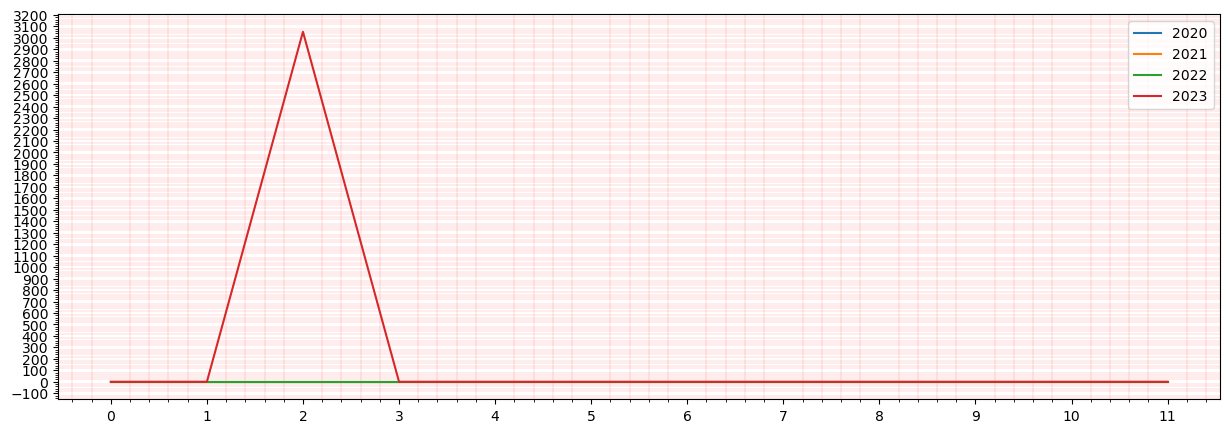

<Figure size 1500x500 with 0 Axes>

In [57]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(15, 5))

plt.figure(figsize=(15, 5))

ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))


# ax.yaxis.set_minor_locator(ticker.MultipleLocator(1000))

ax.minorticks_on()
#  Теперь можем отдельно задавать внешний вид
#  вспомогательной сетки:
ax.grid(which='minor',
        color = 'red',
        linewidth = 0.1)

ax.plot(year_2020, label='2020')
ax.plot(year_2021, label='2021')
ax.plot(year_2022, label='2022')
ax.plot(year_2023, label='2023')

ax.legend()

In [58]:
# частоты 

# ПУ 


In [379]:
trades = read_csv("C:/Users/ahrus/Работа/Long_bot/trades_2023_mar.csv", sep=';', encoding='utf-8')

In [380]:
#все 
# trades = read_csv("C:/Users/ofdco/Desktop/Работа/Spike_bot/TSLab analytics/merged_trades_07_01_2023.csv", sep=';', encoding='cp1251')

In [381]:
# trades = read_csv("C:/Users/ofdco/Desktop/trades_1.csv", sep='\t', encoding='cp1251')

In [382]:
# trades = read_csv('C:/Users/ofdco/Desktop/Работа/Backtest/SL_25_TP_25/25_25.csv', sep='\t',  encoding='cp1251')

In [383]:
trades.head()

,Unnamed: 0,Скрипт,П/У портфеля,Фикс. П/У портфеля,PbtTradeList.DrawdownPortfolio},PbtTradeList.FixedDrawdownPortfolio},Позиция,Символ,Лоты,Изменение/Максимум Лотов,...,Зафиксированная П/У,Открытая П/У,Продолж. (баров),Доход/Бар,Общий П/У,% изменения,MAE,MAE %,MFE,MFE %
0,-,Long_strategy,1 672.77582300,1 672.77582300,-829.92200000,-762.69249600,Длинная,AMBBUSD,1,1,...,-0.000104,0.0,182,-5.700000e-07,+0.00035400,-0.46,-0.000387,-1.71%,+0.000454,2.00%
1,-,Long_strategy,1 672.78365300,1 672.78365300,-829.92200000,-762.69249600,Длинная,RENUSDT,1,1,...,0.007830,0.0,151,5.185000e-05,+0.00678000,7.00,-0.002990,-2.67%,+0.00783,7.00%
2,-,Long_strategy,1 672.50565300,1 672.50565300,-829.92200000,-762.69249600,Длинная,FXSUSDT,1,1,...,-0.278000,0.0,182,-1.527470e-03,+0.72000000,-2.37,-0.303000,-2.58%,+0.083,0.71%
3,-,Long_strategy,1 672.54965300,1 672.54965300,-829.92200000,-762.69249600,Длинная,STXUSDT,1,1,...,0.044000,0.0,182,2.417600e-04,+0.14890000,4.60,-0.016300,-1.70%,+0.0636,6.65%
4,-,Long_strategy,1 672.56635300,1 672.56635300,-829.92200000,-762.69249600,Длинная,AGIXUSDT,1,1,...,0.016700,0.0,182,9.176000e-05,+0.04880000,3.29,-0.003900,-0.77%,+0.0167,3.29%


In [384]:
initial_sum = 100

In [385]:
trades.head()

,Unnamed: 0,Скрипт,П/У портфеля,Фикс. П/У портфеля,PbtTradeList.DrawdownPortfolio},PbtTradeList.FixedDrawdownPortfolio},Позиция,Символ,Лоты,Изменение/Максимум Лотов,...,Зафиксированная П/У,Открытая П/У,Продолж. (баров),Доход/Бар,Общий П/У,% изменения,MAE,MAE %,MFE,MFE %
0,-,Long_strategy,1 672.77582300,1 672.77582300,-829.92200000,-762.69249600,Длинная,AMBBUSD,1,1,...,-0.000104,0.0,182,-5.700000e-07,+0.00035400,-0.46,-0.000387,-1.71%,+0.000454,2.00%
1,-,Long_strategy,1 672.78365300,1 672.78365300,-829.92200000,-762.69249600,Длинная,RENUSDT,1,1,...,0.007830,0.0,151,5.185000e-05,+0.00678000,7.00,-0.002990,-2.67%,+0.00783,7.00%
2,-,Long_strategy,1 672.50565300,1 672.50565300,-829.92200000,-762.69249600,Длинная,FXSUSDT,1,1,...,-0.278000,0.0,182,-1.527470e-03,+0.72000000,-2.37,-0.303000,-2.58%,+0.083,0.71%
3,-,Long_strategy,1 672.54965300,1 672.54965300,-829.92200000,-762.69249600,Длинная,STXUSDT,1,1,...,0.044000,0.0,182,2.417600e-04,+0.14890000,4.60,-0.016300,-1.70%,+0.0636,6.65%
4,-,Long_strategy,1 672.56635300,1 672.56635300,-829.92200000,-762.69249600,Длинная,AGIXUSDT,1,1,...,0.016700,0.0,182,9.176000e-05,+0.04880000,3.29,-0.003900,-0.77%,+0.0167,3.29%


In [386]:
trades = trades[['Символ','Дата входа','Время входа','% изменения']]

In [387]:
trades['% изменения'][0]

-0.46

In [388]:
wl = []
for i in range(len(trades)):
    if trades['% изменения'][i] > 0:
        wl.append(1)
    if trades['% изменения'][i] <= 0: 
        wl.append(-1)

In [389]:
profit = [5*i*initial_sum/100 for i in trades['% изменения']] # профит каждой сделки при 100 долларах начального капитала

In [390]:
for i in range(len(profit)):
    if profit[i] > 25:
        profit[i] = 25
        
    if profit[i] < -25:
        profit[i] = -25

In [391]:
profit[:5]

[-2.3000000000000003, 25, -11.850000000000001, 23.0, 16.45]

In [392]:
trades['WL'] = wl 

In [393]:
trades['profit'] = profit 

In [394]:
trades.head()

,Символ,Дата входа,Время входа,% изменения,WL,profit
0,AMBBUSD,01.03.2023,0:19:00,-0.46,-1,-2.30
1,RENUSDT,01.03.2023,1:14:00,7.00,1,25.00
2,FXSUSDT,01.03.2023,1:19:00,-2.37,-1,-11.85
3,STXUSDT,01.03.2023,1:43:00,4.60,1,23.00
4,AGIXUSDT,01.03.2023,1:48:00,3.29,1,16.45


In [395]:
# Объединение столбцов "Дата входа" и "Время входа"
trades["Дата и время входа"] = trades["Дата входа"] + " " + trades["Время входа"]

# Конвертирование объединенного столбца в формат datetime с учетом временной зоны
trades["Дата и время входа"] = pd.to_datetime(trades["Дата и время входа"]).dt.strftime("%Y-%m-%d %H:%M:%S%z")

In [396]:
# trades_for_print = 

In [397]:
# trades.set_index("Дата и время входа")

In [398]:
trades.head()

,Символ,Дата входа,Время входа,% изменения,WL,profit,Дата и время входа
0,AMBBUSD,01.03.2023,0:19:00,-0.46,-1,-2.30,2023-01-03 00:19:00
1,RENUSDT,01.03.2023,1:14:00,7.00,1,25.00,2023-01-03 01:14:00
2,FXSUSDT,01.03.2023,1:19:00,-2.37,-1,-11.85,2023-01-03 01:19:00
3,STXUSDT,01.03.2023,1:43:00,4.60,1,23.00,2023-01-03 01:43:00
4,AGIXUSDT,01.03.2023,1:48:00,3.29,1,16.45,2023-01-03 01:48:00


# Сумма по всем сделкам

In [399]:
sum(trades.profit.tolist()) 

3731.9500000000057

In [400]:
trades.head()

,Символ,Дата входа,Время входа,% изменения,WL,profit,Дата и время входа
0,AMBBUSD,01.03.2023,0:19:00,-0.46,-1,-2.30,2023-01-03 00:19:00
1,RENUSDT,01.03.2023,1:14:00,7.00,1,25.00,2023-01-03 01:14:00
2,FXSUSDT,01.03.2023,1:19:00,-2.37,-1,-11.85,2023-01-03 01:19:00
3,STXUSDT,01.03.2023,1:43:00,4.60,1,23.00,2023-01-03 01:43:00
4,AGIXUSDT,01.03.2023,1:48:00,3.29,1,16.45,2023-01-03 01:48:00


In [401]:
day_trades = trades[['Символ','Дата входа','Время входа','Дата и время входа', 'profit']]

In [402]:
day_trades['Date'] = pd.to_datetime(df['Дата входа'], format='%d.%m.%Y')

C:\Users\ahrus\AppData\Local\Temp\ipykernel_14948\1615238266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_trades['Date'] = pd.to_datetime(df['Дата входа'], format='%d.%m.%Y')


In [403]:
day_trades.head()
# сгруппировать по часу!!!!!!!!!!!!!!!!!!!

,Символ,Дата входа,Время входа,Дата и время входа,profit,Date
0,AMBBUSD,01.03.2023,0:19:00,2023-01-03 00:19:00,-2.30,2023-03-01
1,RENUSDT,01.03.2023,1:14:00,2023-01-03 01:14:00,25.00,2023-03-01
2,FXSUSDT,01.03.2023,1:19:00,2023-01-03 01:19:00,-11.85,2023-03-01
3,STXUSDT,01.03.2023,1:43:00,2023-01-03 01:43:00,23.00,2023-03-01
4,AGIXUSDT,01.03.2023,1:48:00,2023-01-03 01:48:00,16.45,2023-03-01


In [404]:
# группируем данные по дате и суммируем прибыль
daily_profit = day_trades.groupby('Дата входа')['profit'].sum().reset_index()

# выводим результат
# print(daily_profit)

In [405]:
daily_profit

,Дата входа,profit
0,01.03.2023,213.70
1,02.03.2023,-246.10
2,03.03.2023,12.75
3,04.03.2023,182.20
4,05.03.2023,-42.80
5,06.03.2023,-7.40
6,07.03.2023,-164.40
7,08.03.2023,-329.50
8,09.03.2023,-322.95
9,10.03.2023,281.25


In [410]:
sum(daily_profit.profit.tolist()) 

3731.949999999999

In [408]:
# daily_profit = daily_profit.sort_values(by='Дата входа', key = lambda x: (x.year, x), ascending=True)

In [409]:
daily_profit.head()

,Дата входа,profit
0,01.03.2023,213.70
1,02.03.2023,-246.10
2,03.03.2023,12.75
3,04.03.2023,182.20
4,05.03.2023,-42.80


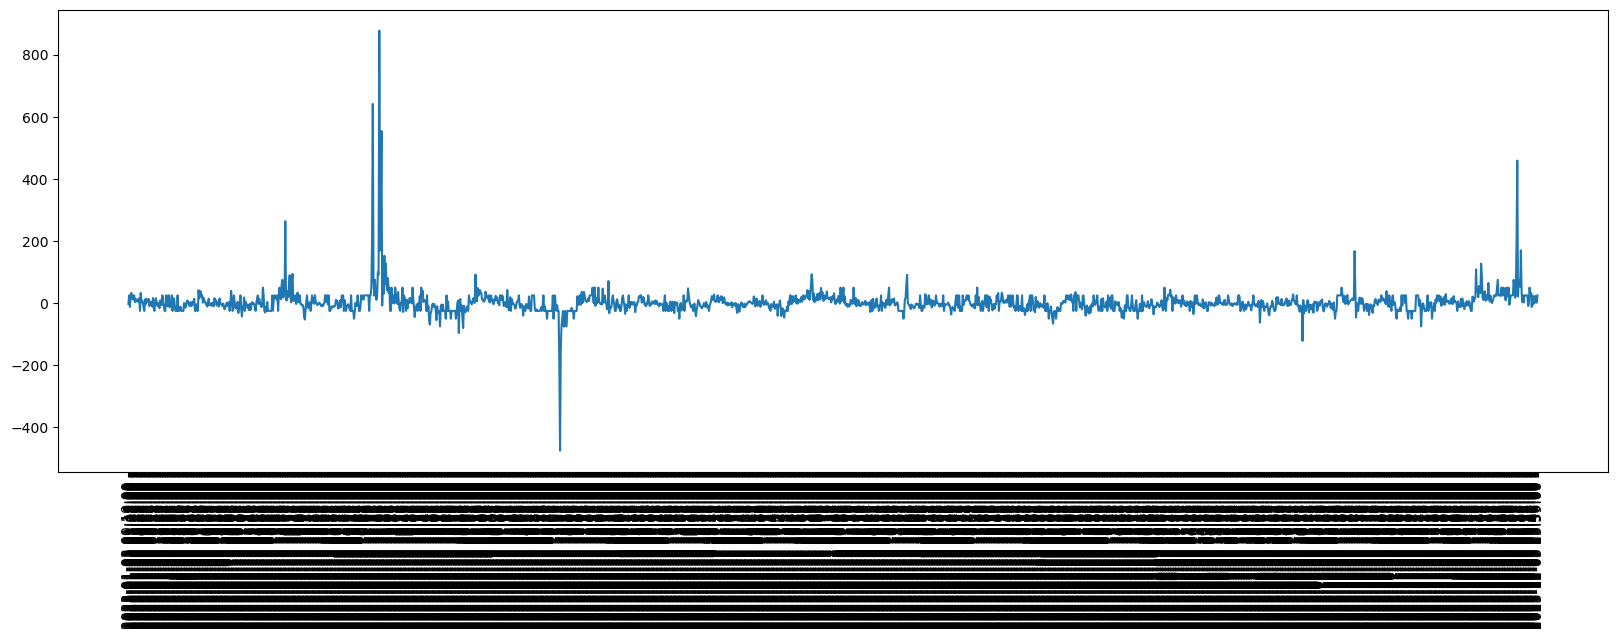

In [300]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(daily_profit['Дата и время входа'],daily_profit['profit'])


ax.tick_params(axis='x', rotation=90)
plt.show()

In [301]:
df_seasons = daily_profit[daily_profit['profit'] > 0]
df_noseasons = daily_profit[daily_profit['profit'] <= 0]

In [342]:
df_seasons.head()

,Дата и время входа,profit
1,2023-01-03 01:14:00,25.00
3,2023-01-03 01:43:00,23.00
4,2023-01-03 01:48:00,33.25
5,2023-01-03 02:02:00,15.70
6,2023-01-03 02:14:00,11.70


In [305]:
df_noseasons.head()

,Дата и время входа,profit
0,2023-01-03 00:19:00,-2.30
2,2023-01-03 01:19:00,-11.85
16,2023-01-03 03:58:00,-25.00
21,2023-01-03 04:56:00,-14.15
22,2023-01-03 05:05:00,-25.00


In [91]:
# plt.plot(daily_profit['Дата входа'],daily_profit['profit'],)

In [92]:
# сложить количество винов по месяцам, количество лузов по месяцам, а также сумму винов и лузов по месяцам (в единицах профита)

In [308]:
trades.head()

,Символ,Дата входа,Время входа,% изменения,WL,profit
Дата и время входа,,,,,,
2023-01-03 00:19:00,AMBBUSD,01.03.2023,0:19:00,-0.46,-1,-2.30
2023-01-03 01:14:00,RENUSDT,01.03.2023,1:14:00,7.00,1,25.00
2023-01-03 01:19:00,FXSUSDT,01.03.2023,1:19:00,-2.37,-1,-11.85
2023-01-03 01:43:00,STXUSDT,01.03.2023,1:43:00,4.60,1,23.00
2023-01-03 01:48:00,AGIXUSDT,01.03.2023,1:48:00,3.29,1,16.45


In [311]:
# timestamp = pd.to_datetime(trades['Дата и время входа'])

In [312]:
trades['Date'] = trades.index

C:\Users\ahrus\AppData\Local\Temp\ipykernel_14948\3085271694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades['Date'] = trades.index


In [313]:
trades.head()

,Символ,Дата входа,Время входа,% изменения,WL,profit,Date
Дата и время входа,,,,,,,
2023-01-03 00:19:00,AMBBUSD,01.03.2023,0:19:00,-0.46,-1,-2.30,2023-01-03 00:19:00
2023-01-03 01:14:00,RENUSDT,01.03.2023,1:14:00,7.00,1,25.00,2023-01-03 01:14:00
2023-01-03 01:19:00,FXSUSDT,01.03.2023,1:19:00,-2.37,-1,-11.85,2023-01-03 01:19:00
2023-01-03 01:43:00,STXUSDT,01.03.2023,1:43:00,4.60,1,23.00,2023-01-03 01:43:00
2023-01-03 01:48:00,AGIXUSDT,01.03.2023,1:48:00,3.29,1,16.45,2023-01-03 01:48:00


In [315]:
trades.profit.head()

Дата и время входа
2023-01-03 00:19:00    -2.30
2023-01-03 01:14:00    25.00
2023-01-03 01:19:00   -11.85
2023-01-03 01:43:00    23.00
2023-01-03 01:48:00    16.45
Name: profit, dtype: float64

In [316]:
len(trades['Дата входа'])-1

3052

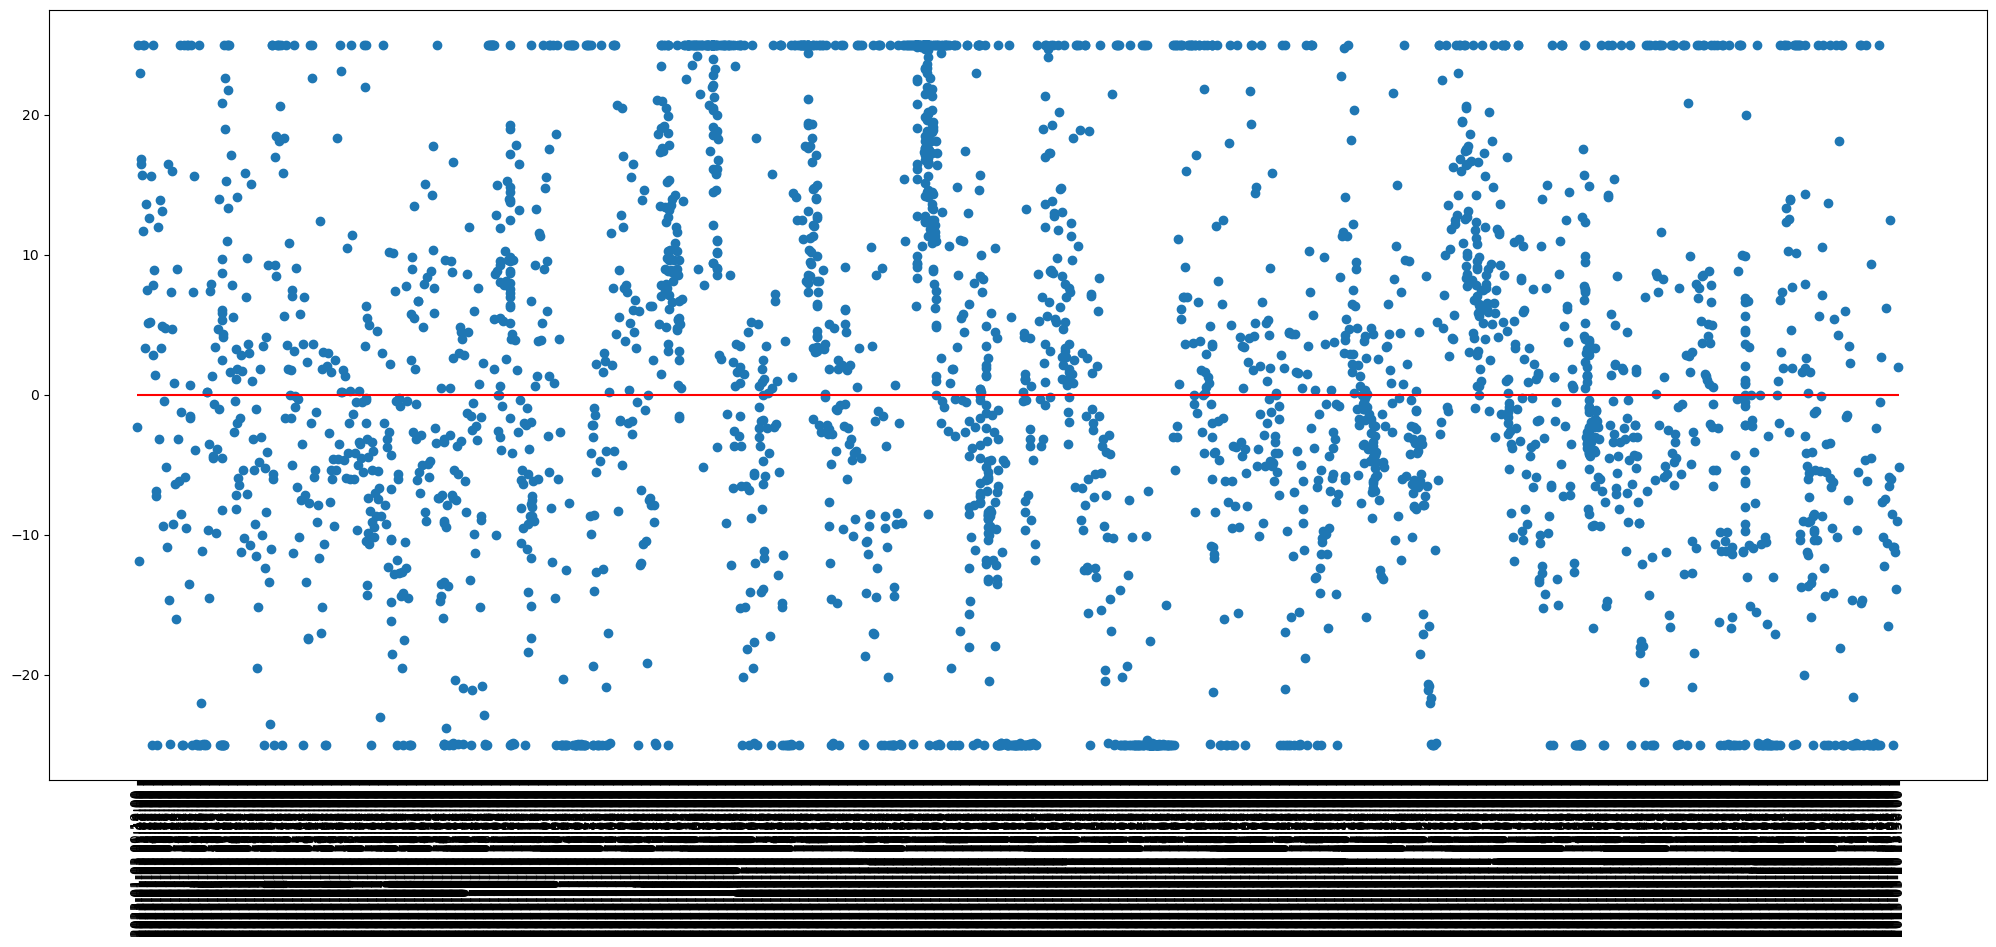

In [318]:
fig, ax = plt.subplots(figsize=(25, 10))
# plt.figure(figsize=(15, 5))
ax.scatter(trades.index, trades.profit)
ax.hlines(0, trades.index[0], trades.index[len(trades.index)-1], color='red')
ax.tick_params(axis='x', rotation=90)
plt.show()

In [319]:
# fig, ax = plt.subplots(figsize=(15, 5))

# plt.figure(figsize=(15, 5))

# ax.scatter(trades['Дата входа'], trades.WL)
# ax.hlines(0, trades['Дата входа'][0], trades['Дата входа'][len(trades['Дата входа'])-1], color='red')

# ax.tick_params(axis='x', rotation=70)
# plt.show()

In [320]:
pd.set_option('display.max_rows', None)

In [321]:
def draw(arr):
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.scatter(arr['Дата входа'], arr.profit)
    ax.hlines(0,arr['Дата входа'].tolist()[0], arr['Дата входа'].tolist()[-1], color = 'red')
    ax.tick_params(axis='x', rotation=90)
    plt.show()

In [322]:
# прибыль по месяцам для бота со стандартными параметрами 
set_1 = []

In [103]:
# import seaborn as sns
# array = trades.loc[trades['Date'] == '02-2020']
# sns.scatterplot(array['Дата входа'], array.profit, x="total_bill", y="tip", hue="size", size="size")

# 01-2020

In [104]:
trades.loc[trades['Date'] == '01-2020']

,Символ,Дата входа,% изменения,WL,profit,Date


In [105]:
sum(trades.loc[trades['Date'] == '01-2020'].profit.tolist())

0

In [106]:
set_1.append(sum(trades.loc[trades['Date'] == '01-2020'].profit.tolist()))

# 02-2020

In [107]:
trades.loc[trades['Date'] == '02-2020']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

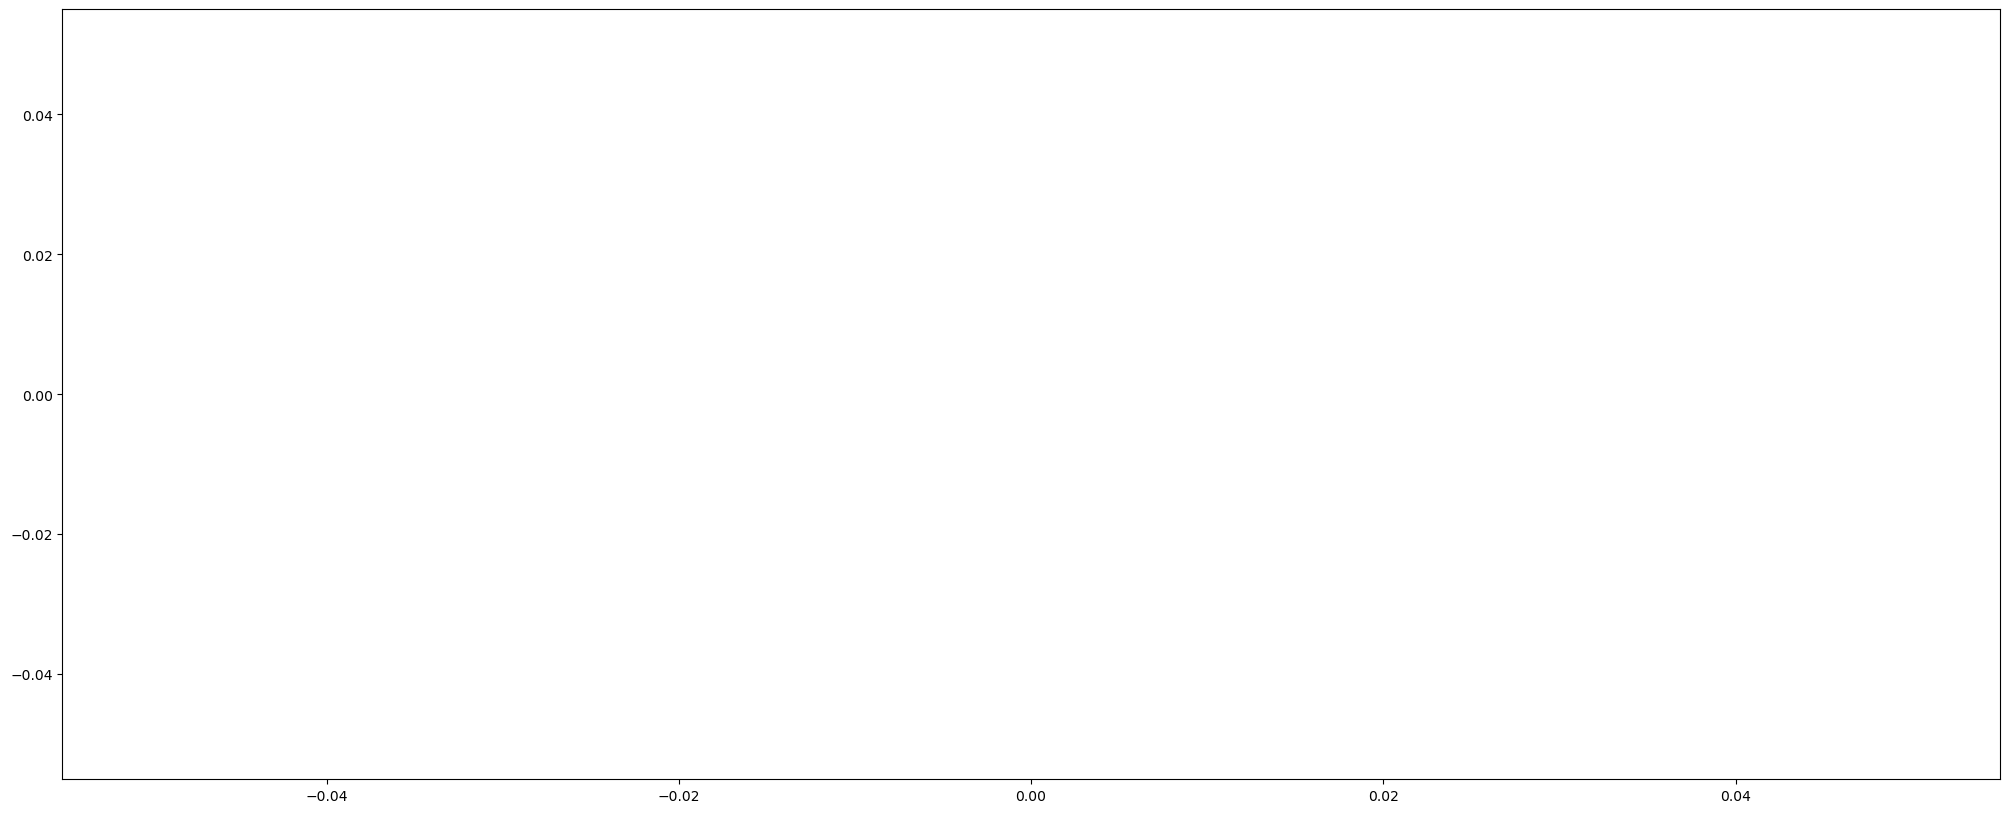

In [108]:
draw(trades.loc[trades['Date'] == '02-2020'])

In [109]:
sum(trades.loc[trades['Date'] == '02-2020'].profit.tolist())

0

In [110]:
set_1.append(sum(trades.loc[trades['Date'] == '02-2020'].profit.tolist()))

# 03-2020

In [72]:
trades.loc[trades['Date'] == '03-2020']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

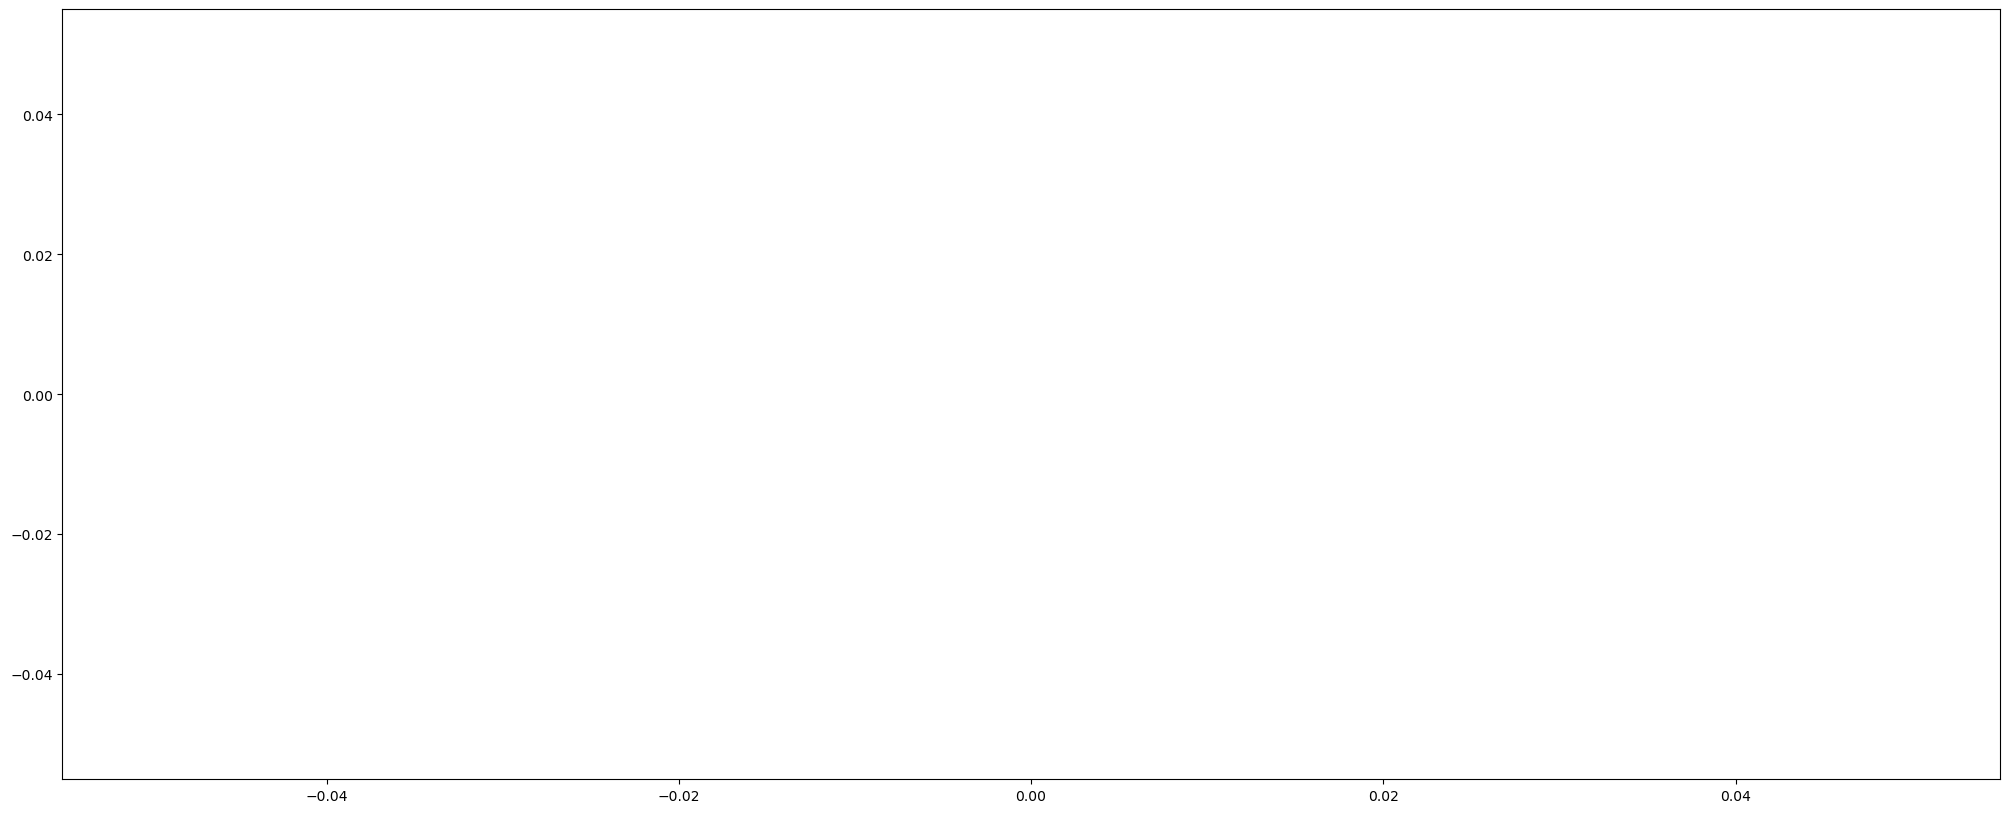

In [73]:
draw(trades.loc[trades['Date'] == '03-2020'])

In [74]:
sum(trades.loc[trades['Date'] == '03-2020'].profit.tolist())

0

In [75]:
set_1.append(sum(trades.loc[trades['Date'] == '03-2020'].profit.tolist()))

# 04-2020

In [76]:
trades.loc[trades['Date'] == '04-2020']

,Символ,Дата входа,% изменения,WL,profit,Date


In [77]:
set_1.append(0)

# 05-2020

In [78]:
trades.loc[trades['Date'] == '05-2020']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

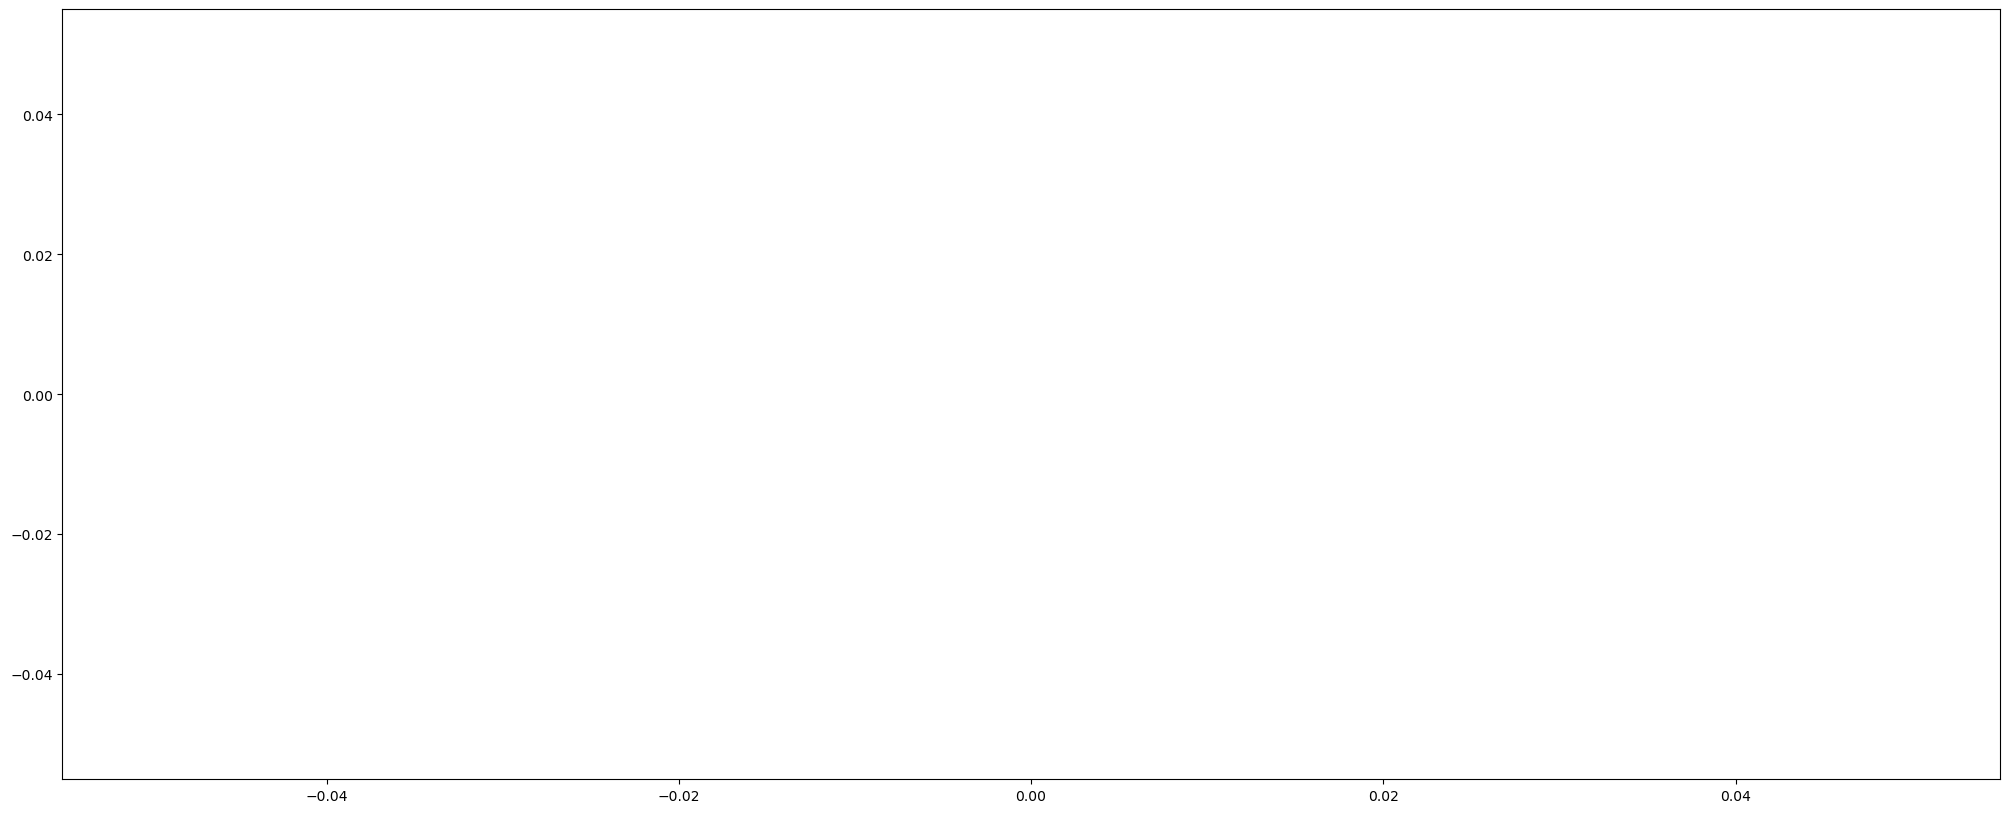

In [79]:
draw(trades.loc[trades['Date'] == '05-2020'])

In [ ]:
sum(trades.loc[trades['Date'] == '05-2020'].profit.tolist())

In [80]:
set_1.append(sum(trades.loc[trades['Date'] == '05-2020'].profit.tolist()))

# 06-2020

In [81]:
trades.loc[trades['Date'] == '06-2020']

,Символ,Дата входа,% изменения,WL,profit,Date


In [82]:
set_1.append(0)

# 07-2020

In [83]:
trades.loc[trades['Date'] == '07-2020']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

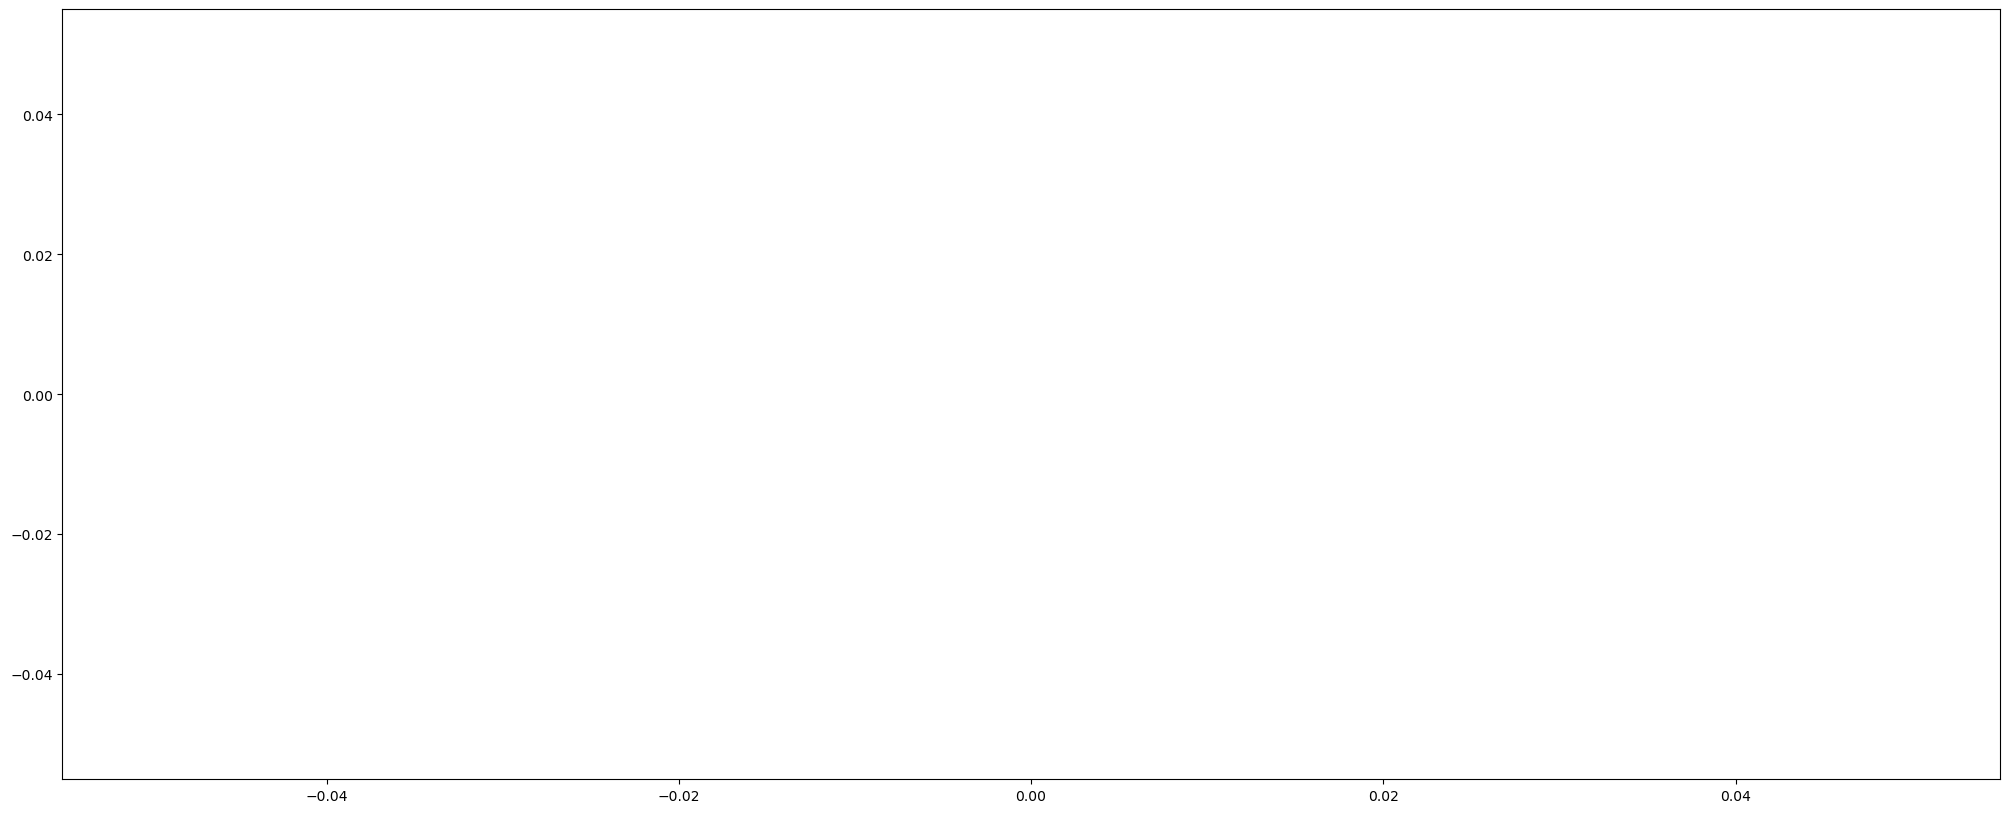

In [84]:
draw(trades.loc[trades['Date'] == '07-2020'])

In [ ]:
sum(trades.loc[trades['Date'] == '07-2020'].profit.tolist())

In [85]:
set_1.append(sum(trades.loc[trades['Date'] == '07-2020'].profit.tolist()))

# 08-2020

In [86]:
trades.loc[trades['Date'] == '08-2020']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

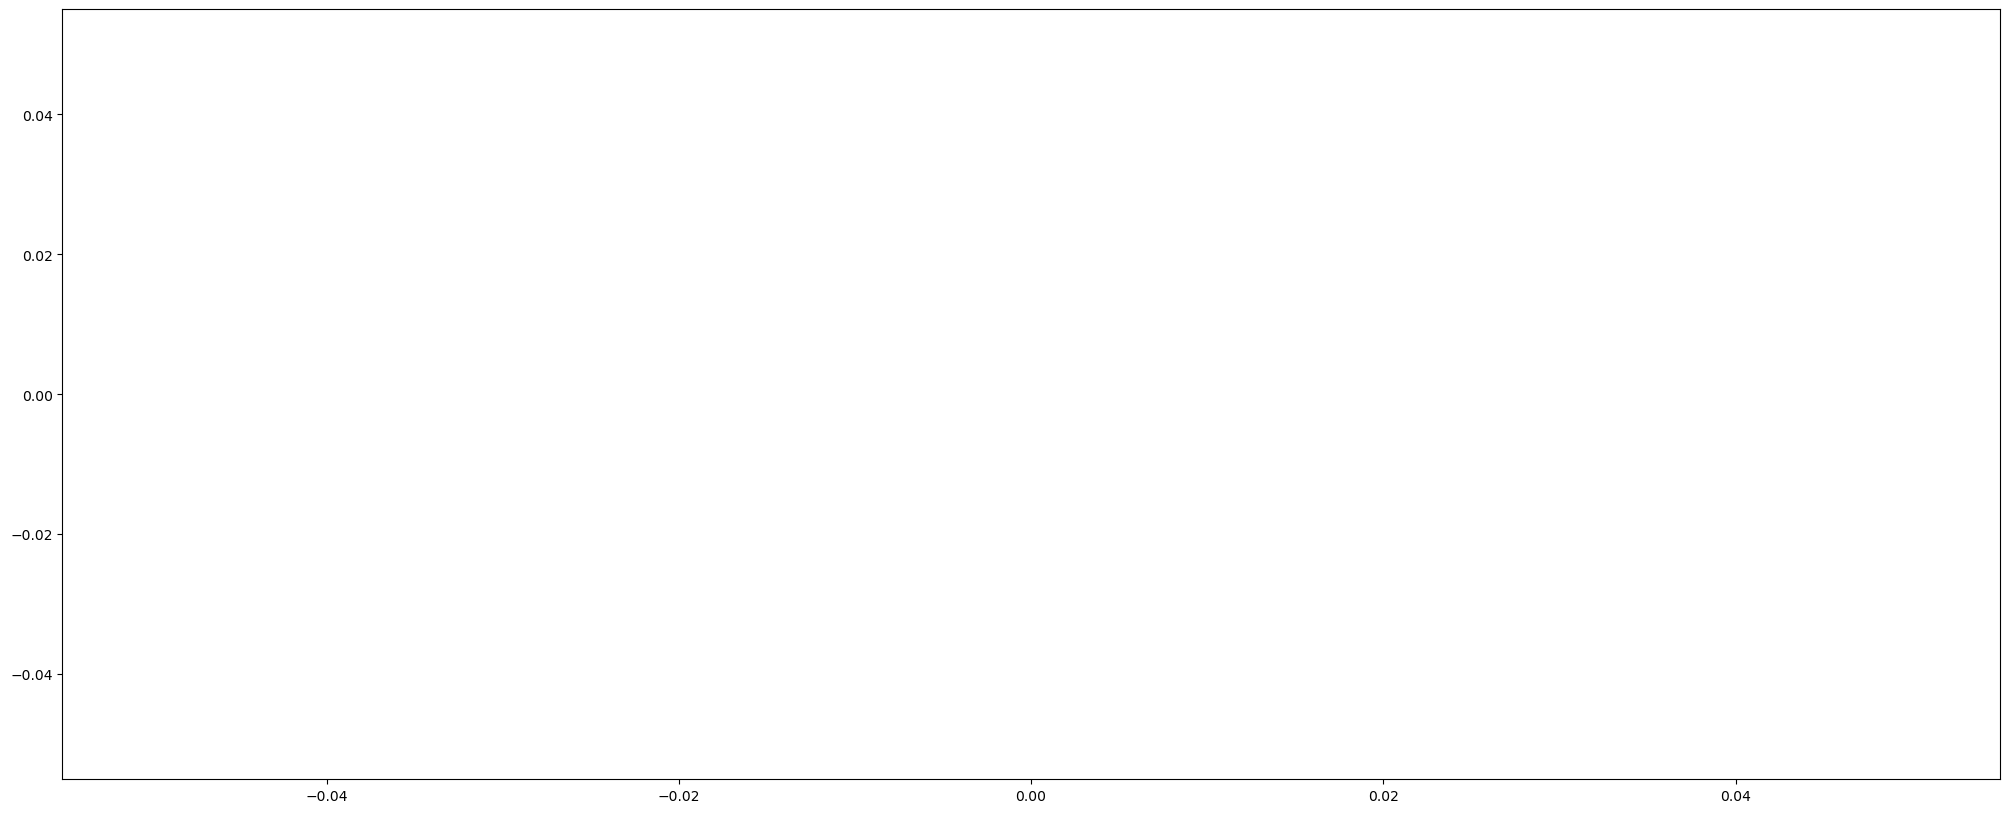

In [87]:
draw(trades.loc[trades['Date'] == '08-2020'])

In [ ]:
sum(trades.loc[trades['Date'] == '08-2020'].profit.tolist())

In [ ]:
set_1.append(sum(trades.loc[trades['Date'] == '08-2020'].profit.tolist()))

# 09-2020

In [88]:
trades.loc[trades['Date'] == '09-2020']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

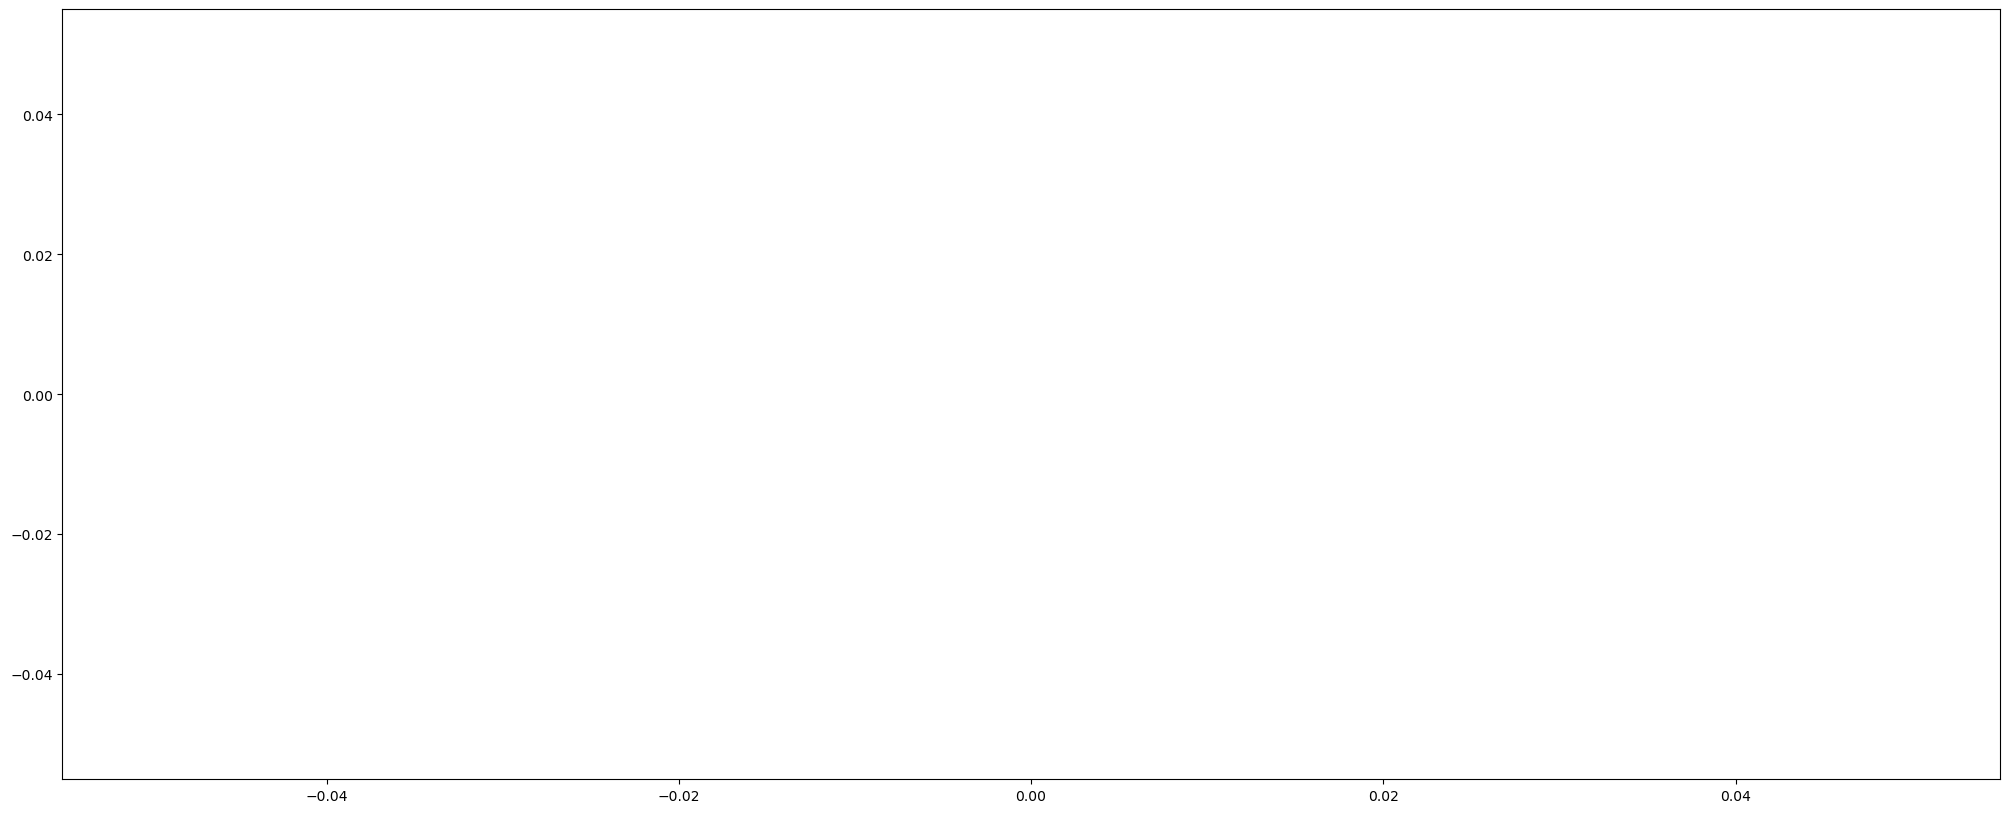

In [89]:
draw(trades.loc[trades['Date'] == '09-2020'])

In [ ]:
sum(trades.loc[trades['Date'] == '09-2020'].profit.tolist())

In [ ]:
set_1.append(sum(trades.loc[trades['Date'] == '09-2020'].profit.tolist()))

# 10-2020

In [90]:
trades.loc[trades['Date'] == '10-2020']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

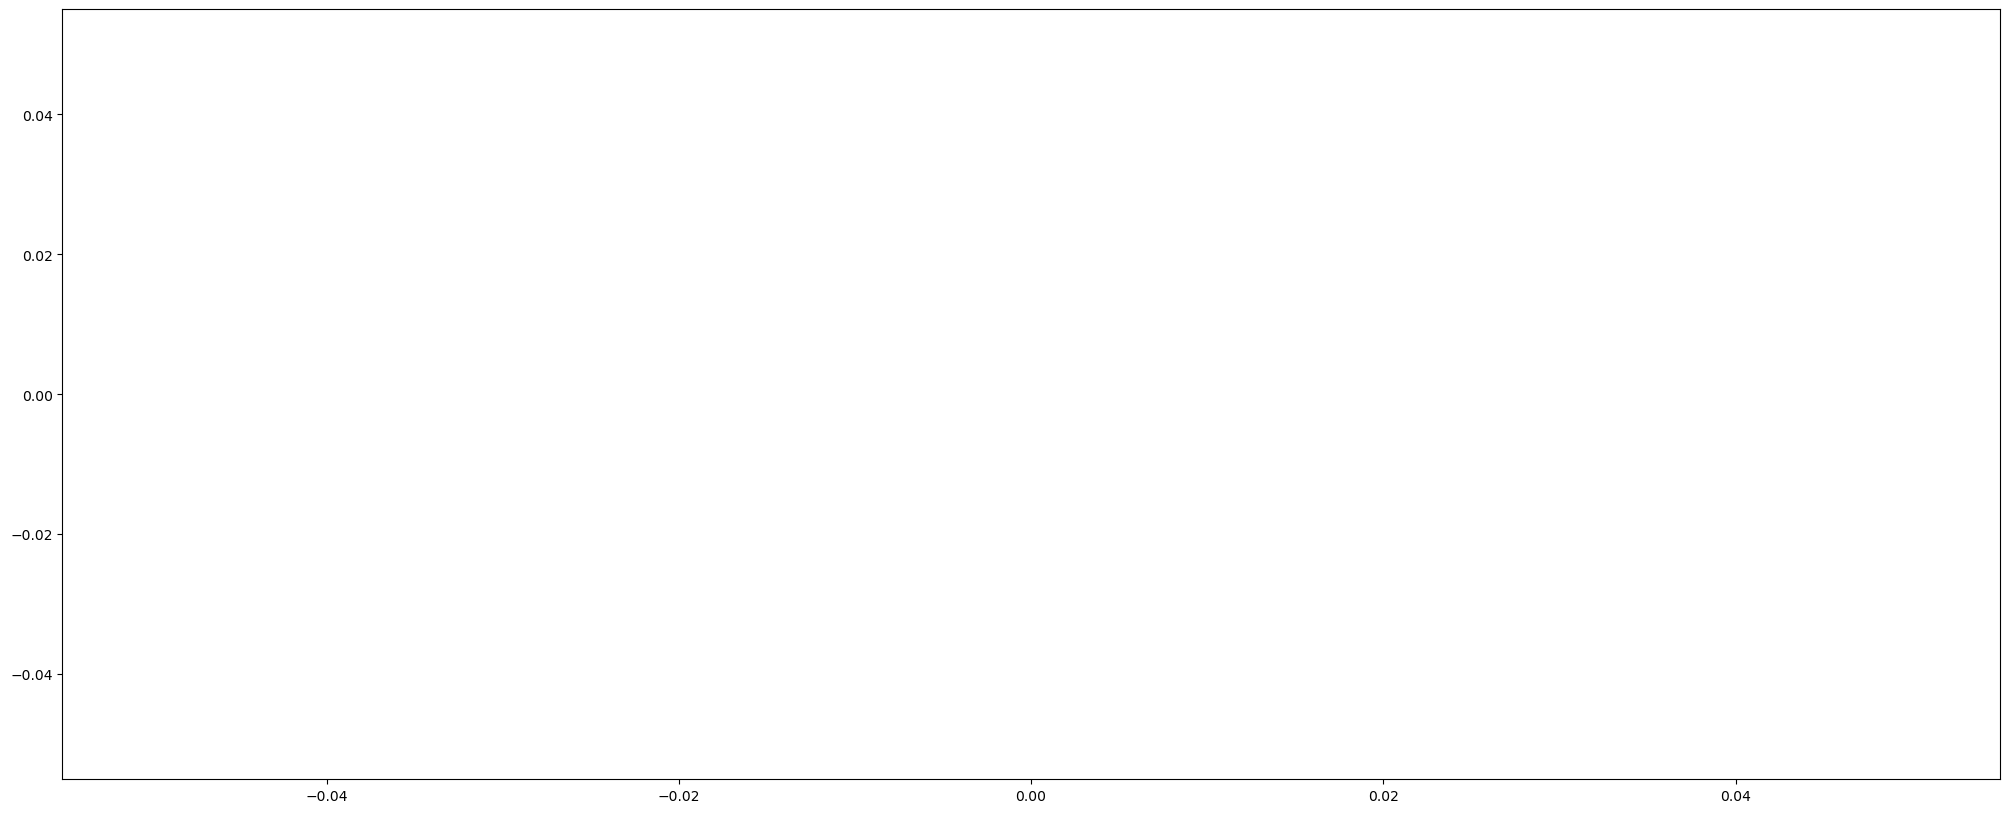

In [91]:
draw(trades.loc[trades['Date'] == '10-2020'])

In [ ]:
sum(trades.loc[trades['Date'] == '10-2020'].profit.tolist())

In [92]:
set_1.append(sum(trades.loc[trades['Date'] == '10-2020'].profit.tolist()))

# 11-2020

In [93]:
trades.loc[trades['Date'] == '11-2020']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

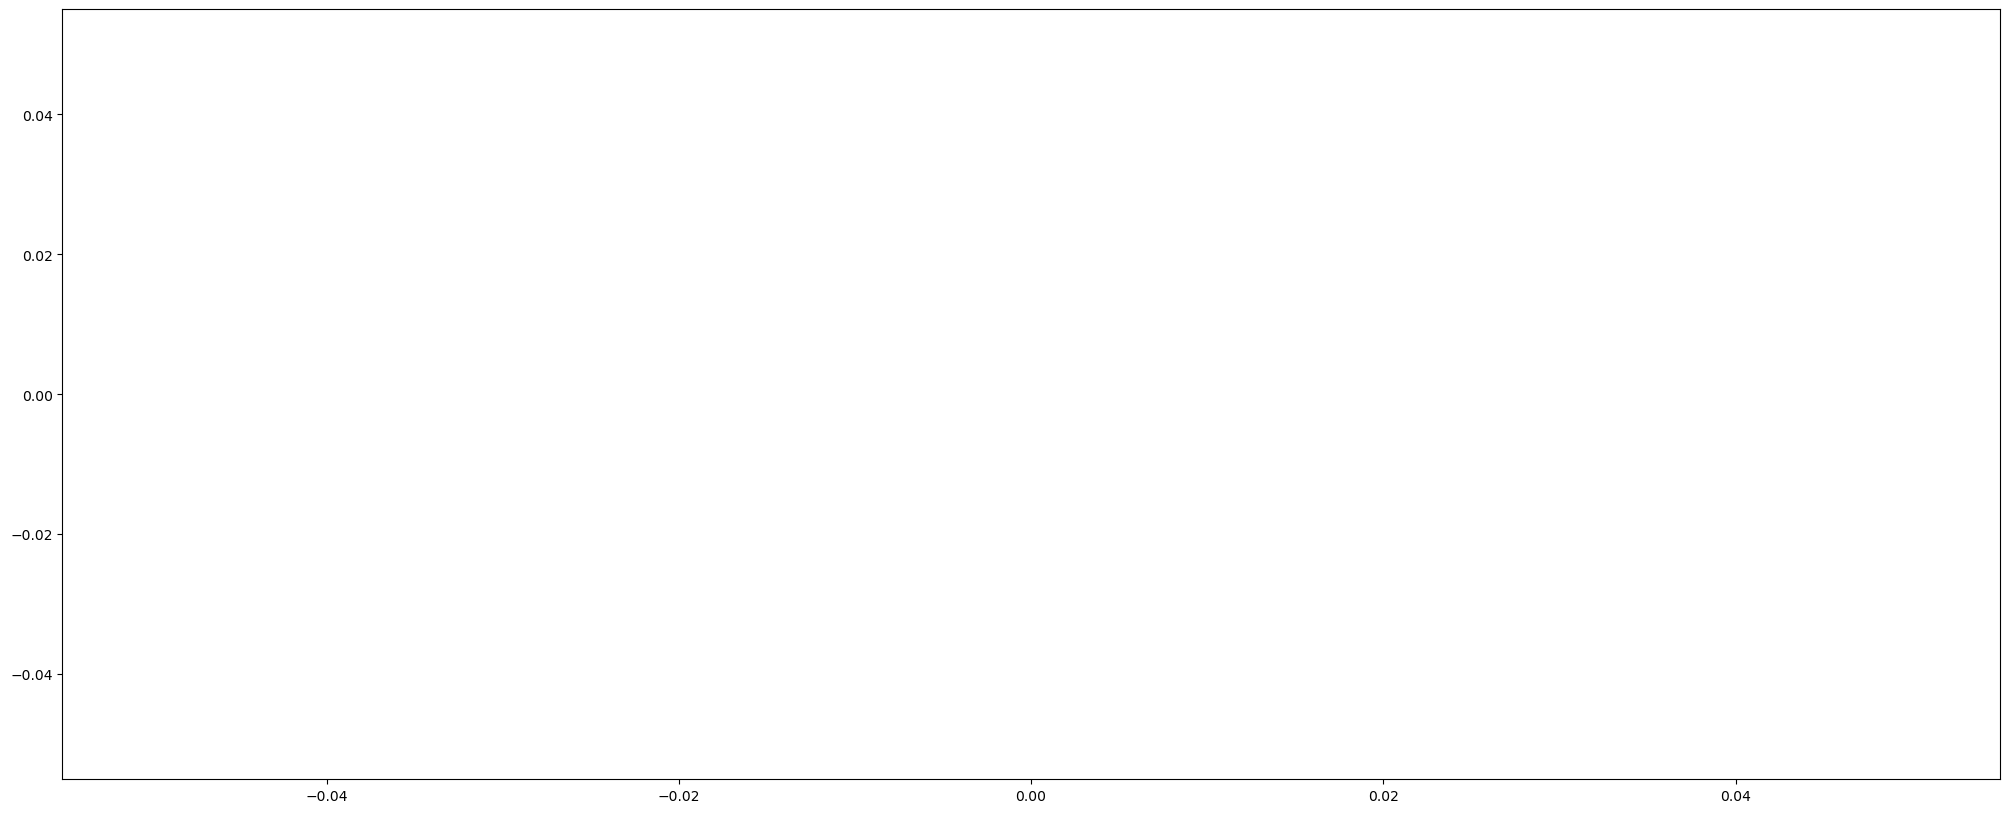

In [94]:
draw(trades.loc[trades['Date'] == '11-2020'])

In [ ]:
sum(trades.loc[trades['Date'] == '11-2020'].profit.tolist())

In [ ]:
set_1.append(sum(trades.loc[trades['Date'] == '11-2020'].profit.tolist()))

# 12-2020

In [95]:
trades.loc[trades['Date'] == '12-2020']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

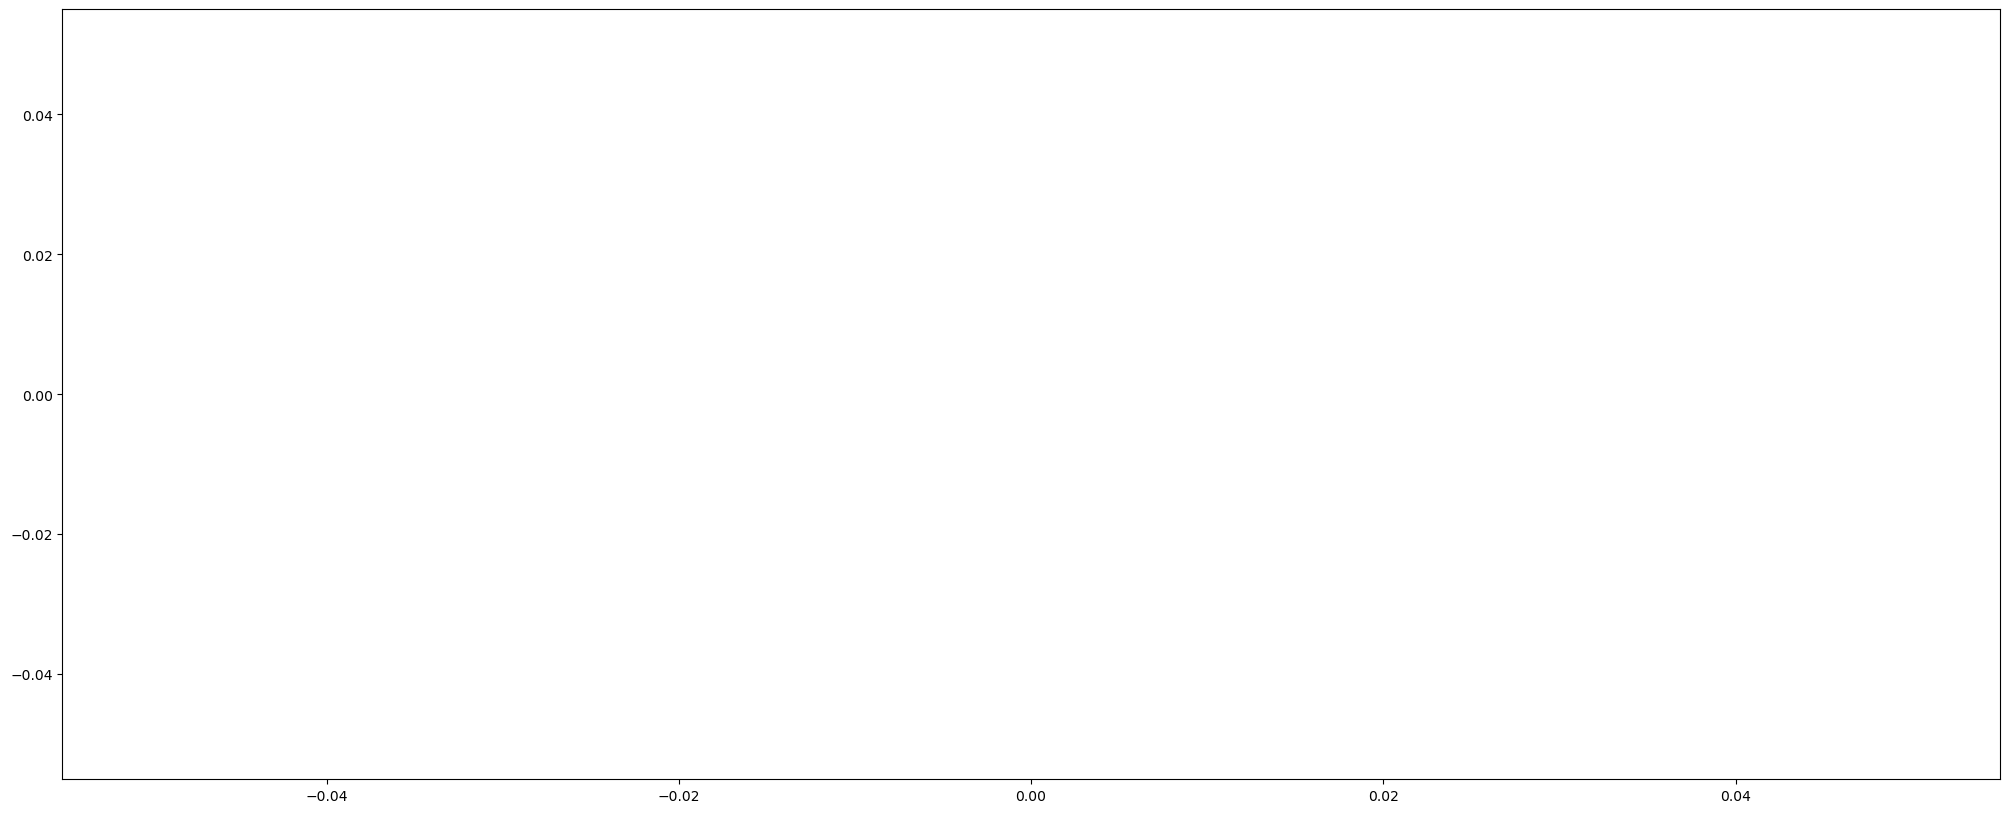

In [96]:
draw(trades.loc[trades['Date'] == '12-2020'])

In [ ]:
sum(trades.loc[trades['Date'] == '12-2020'].profit.tolist())

In [97]:
set_1.append(sum(trades.loc[trades['Date'] == '12-2020'].profit.tolist()))

# 01-2021

In [98]:
trades.loc[trades['Date'] == '01-2021']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

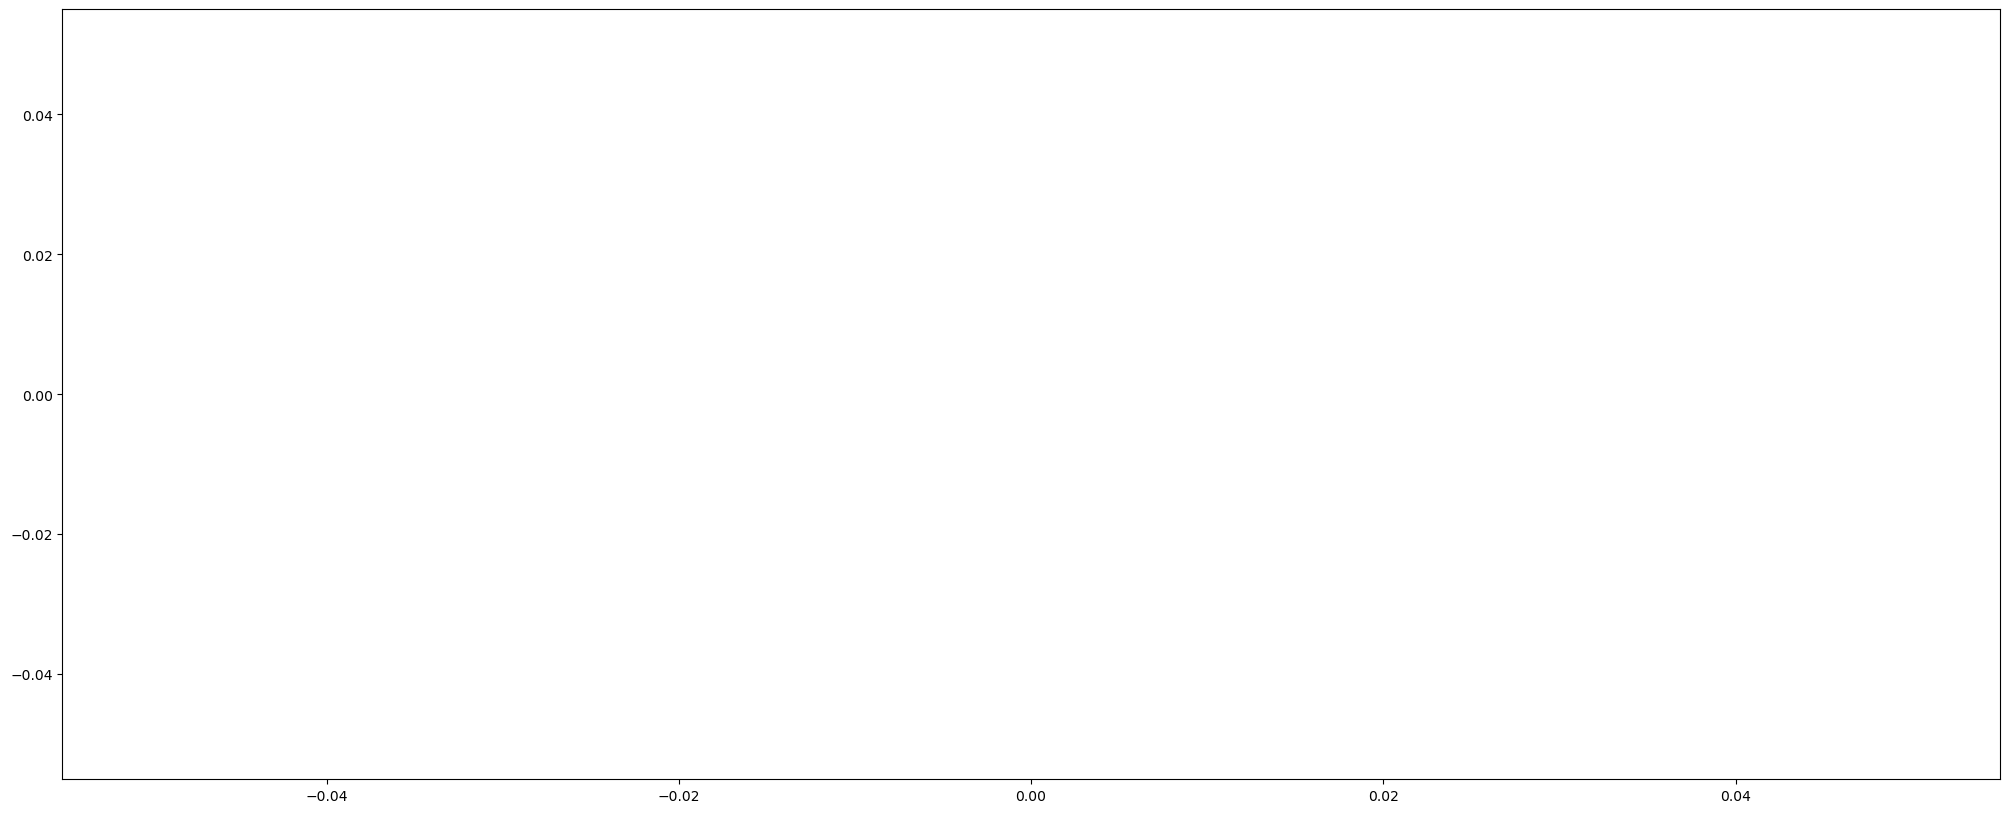

In [99]:
draw(trades.loc[trades['Date'] == '01-2021'])

In [ ]:
sum(trades.loc[trades['Date'] == '01-2021'].profit.tolist())

In [ ]:
set_1.append(sum(trades.loc[trades['Date'] == '01-2021'].profit.tolist()))

# 02-2021

In [100]:
trades.loc[trades['Date'] == '02-2021']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

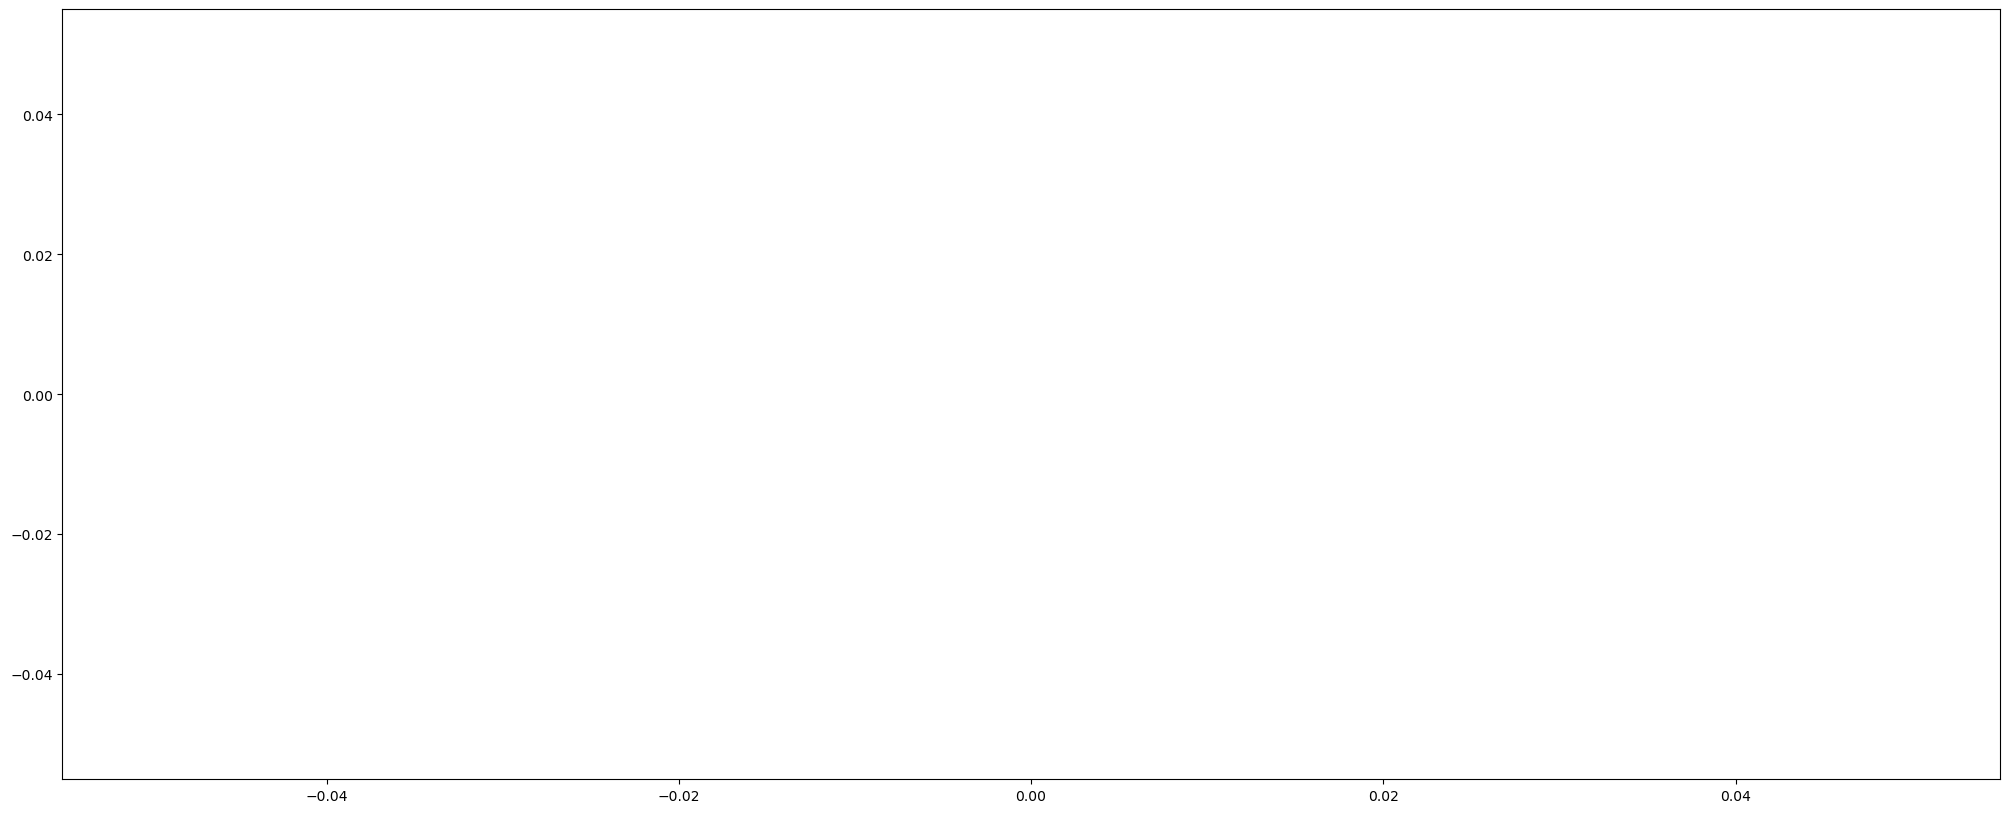

In [101]:
draw(trades.loc[trades['Date'] == '02-2021'])

In [ ]:
sum(trades.loc[trades['Date'] == '02-2021'].profit.tolist())

In [ ]:
set_1.append(sum(trades.loc[trades['Date'] == '02-2021'].profit.tolist()))

# 03-2021

In [102]:
trades.loc[trades['Date'] == '03-2021']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

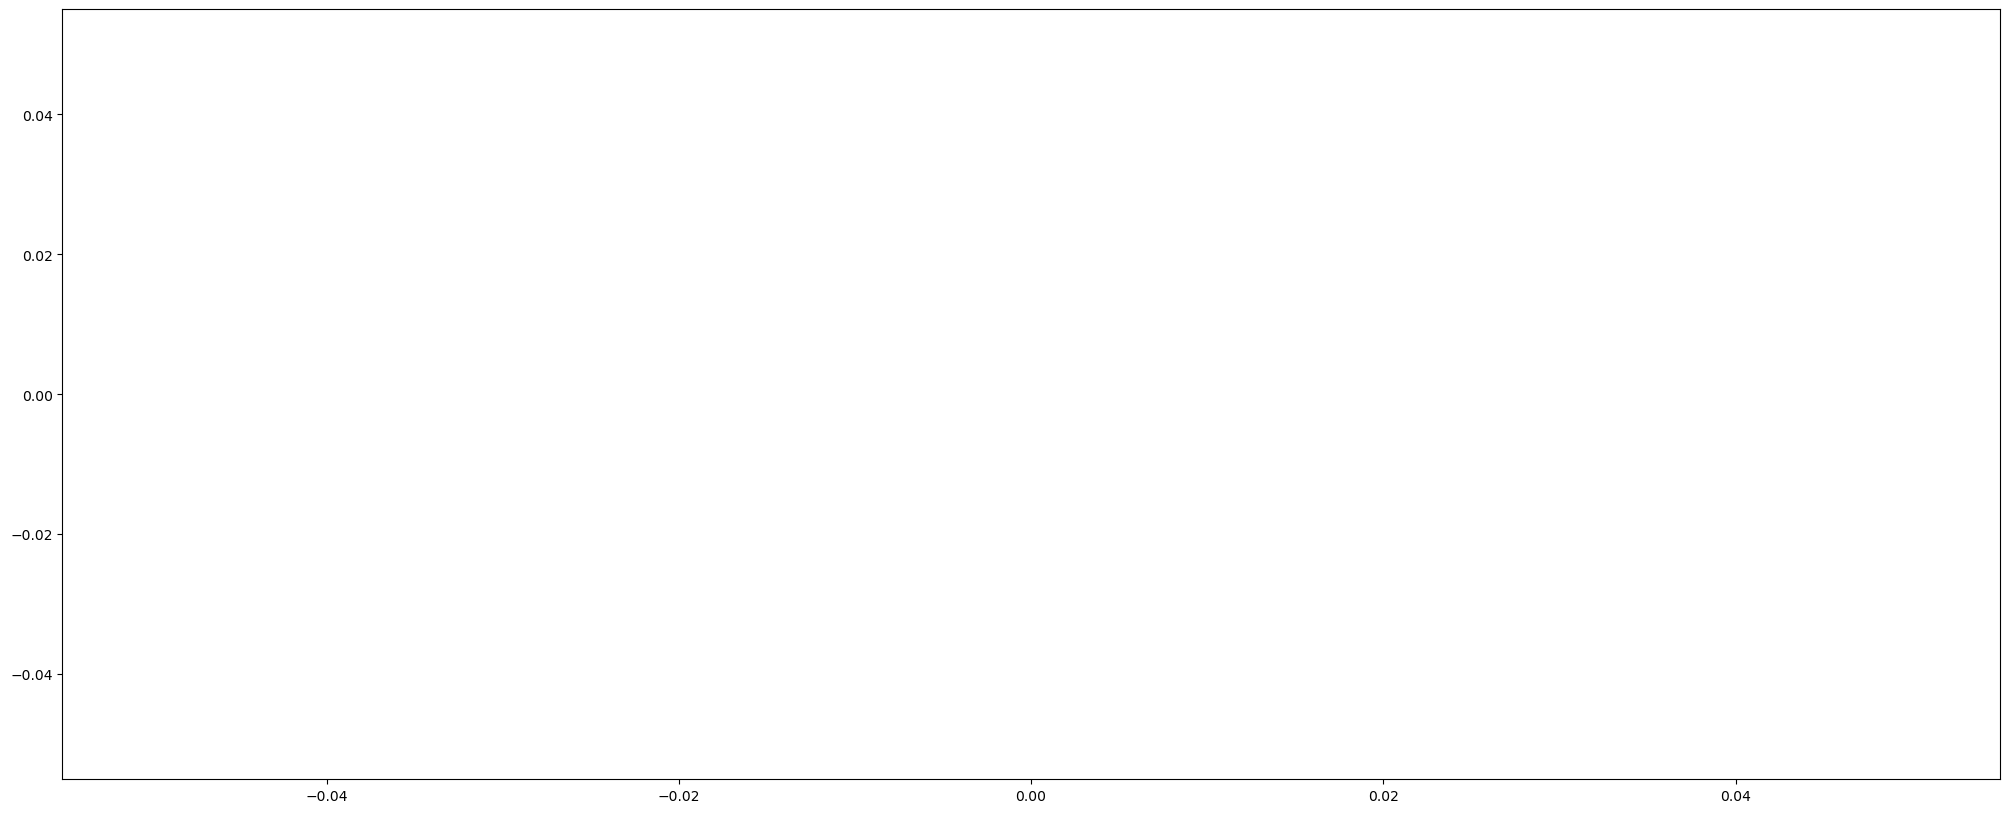

In [103]:
draw(trades.loc[trades['Date'] == '03-2021'])

In [ ]:
sum(trades.loc[trades['Date'] == '03-2021'].profit.tolist())

In [104]:
set_1.append(sum(trades.loc[trades['Date'] == '03-2021'].profit.tolist()))

# 04-2021

In [105]:
trades.loc[trades['Date'] == '04-2021']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

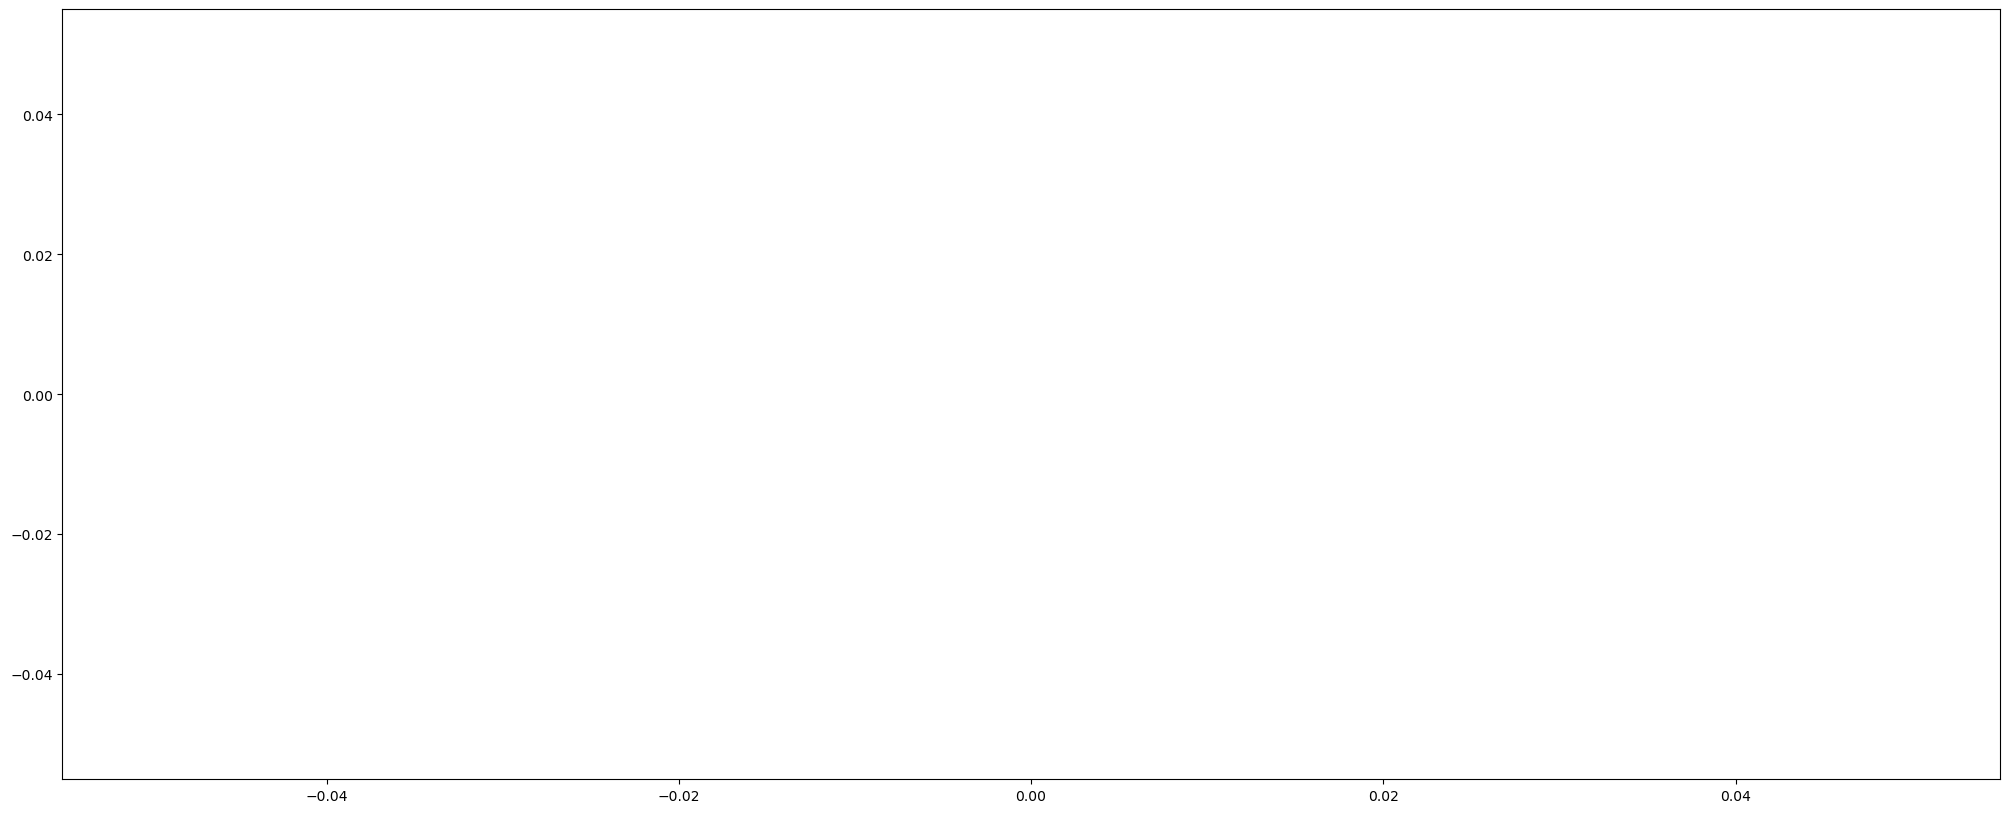

In [106]:
draw(trades.loc[trades['Date'] == '04-2021'])

In [ ]:
sum(trades.loc[trades['Date'] == '04-2021'].profit.tolist())

In [107]:
set_1.append(sum(trades.loc[trades['Date'] == '04-2021'].profit.tolist()))

# 05-2021

In [108]:
trades.loc[trades['Date'] == '05-2021']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

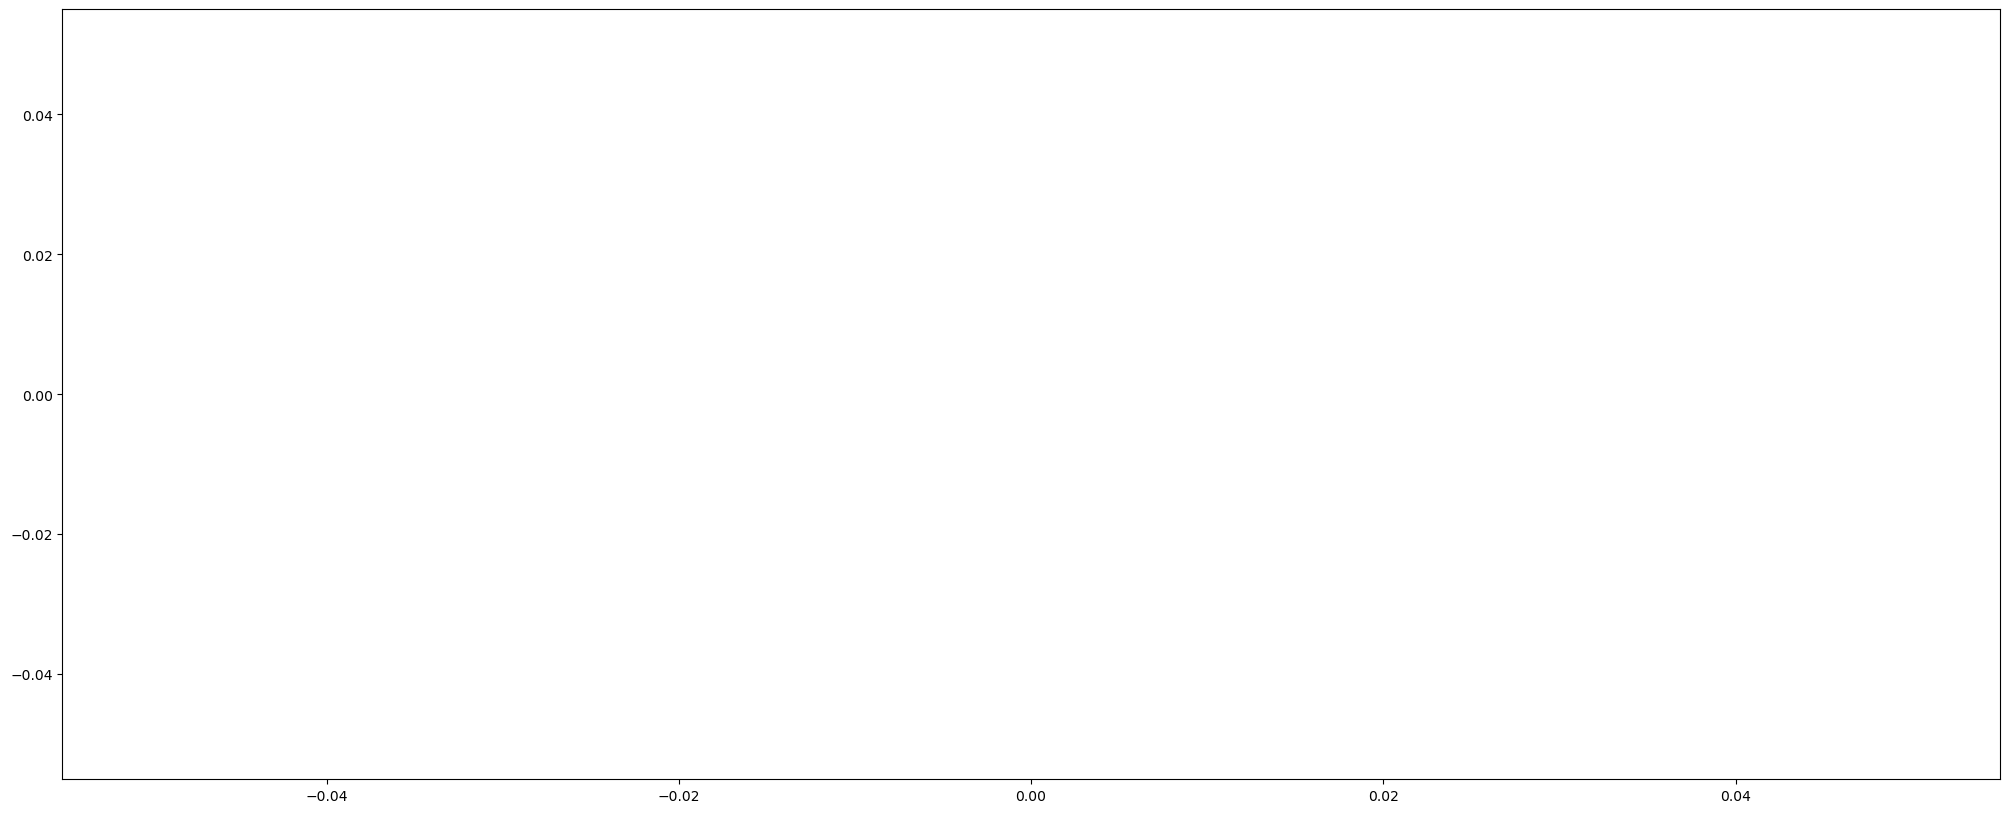

In [109]:
draw(trades.loc[trades['Date'] == '05-2021'])

In [ ]:
sum(trades.loc[trades['Date'] == '05-2021'].profit.tolist())

In [110]:
set_1.append(sum(trades.loc[trades['Date'] == '05-2021'].profit.tolist()))

# 06-2021

In [111]:
trades.loc[trades['Date'] == '06-2021']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

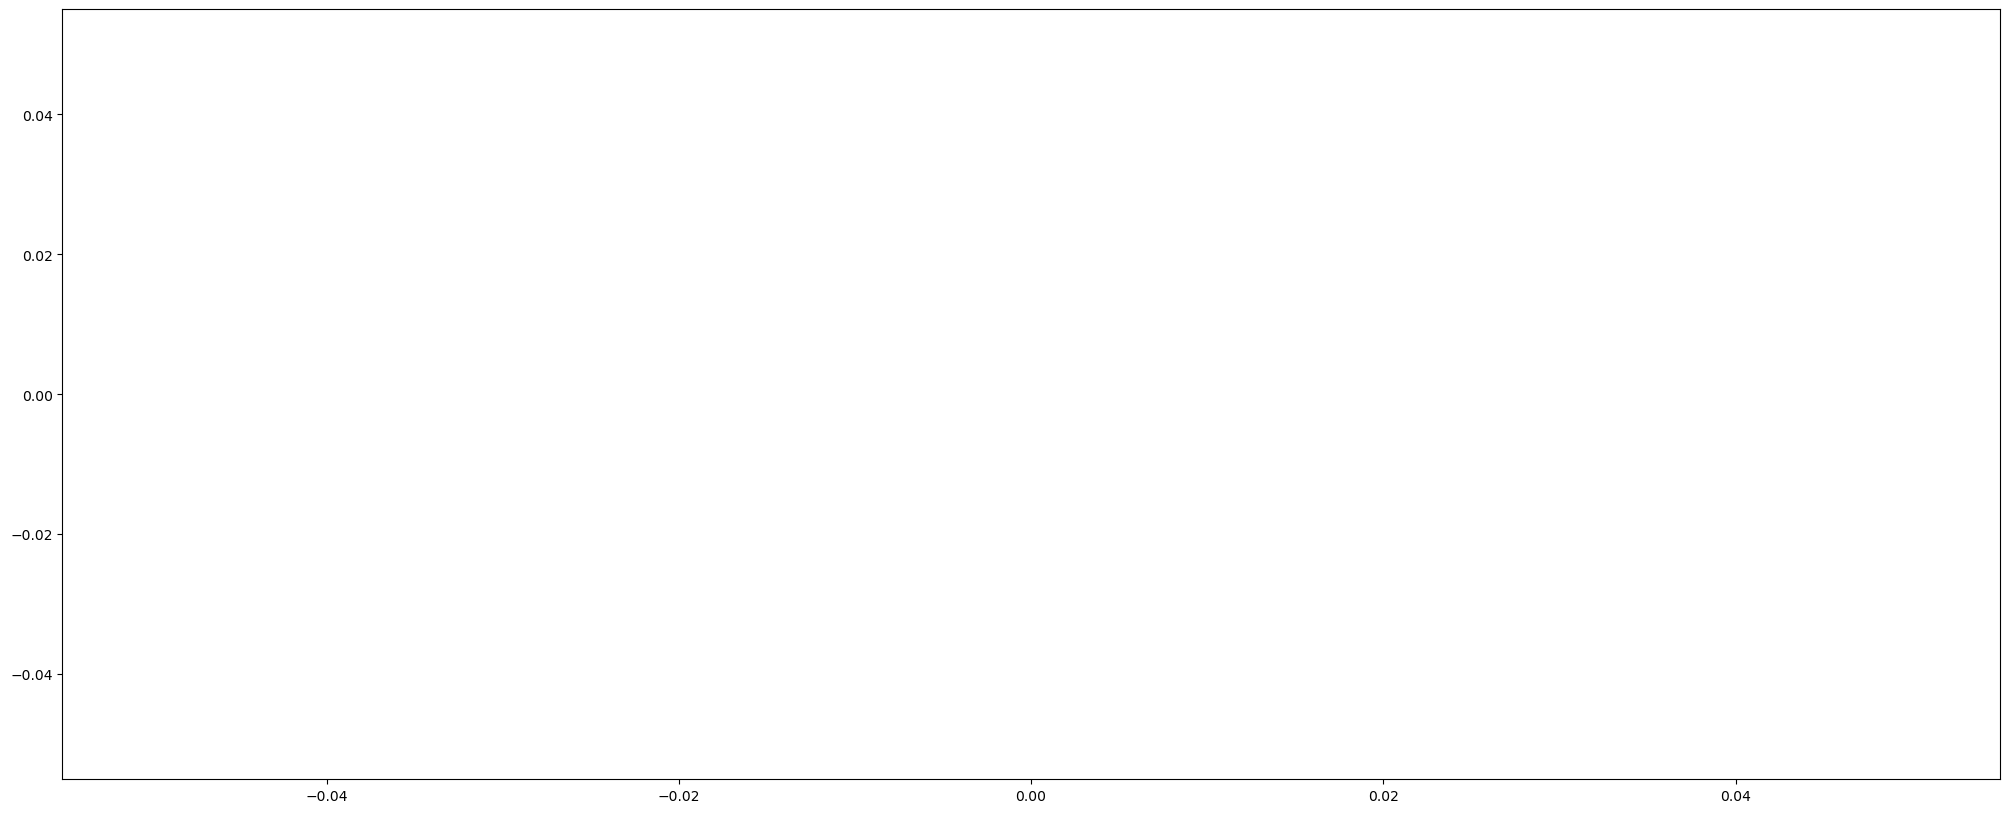

In [112]:
draw(trades.loc[trades['Date'] == '06-2021'])

In [113]:
sum(trades.loc[trades['Date'] == '06-2021'].profit.tolist())

0

In [114]:
set_1.append(sum(trades.loc[trades['Date'] == '06-2021'].profit.tolist()))

# 07-2021

In [115]:
trades.loc[trades['Date'] == '07-2021']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

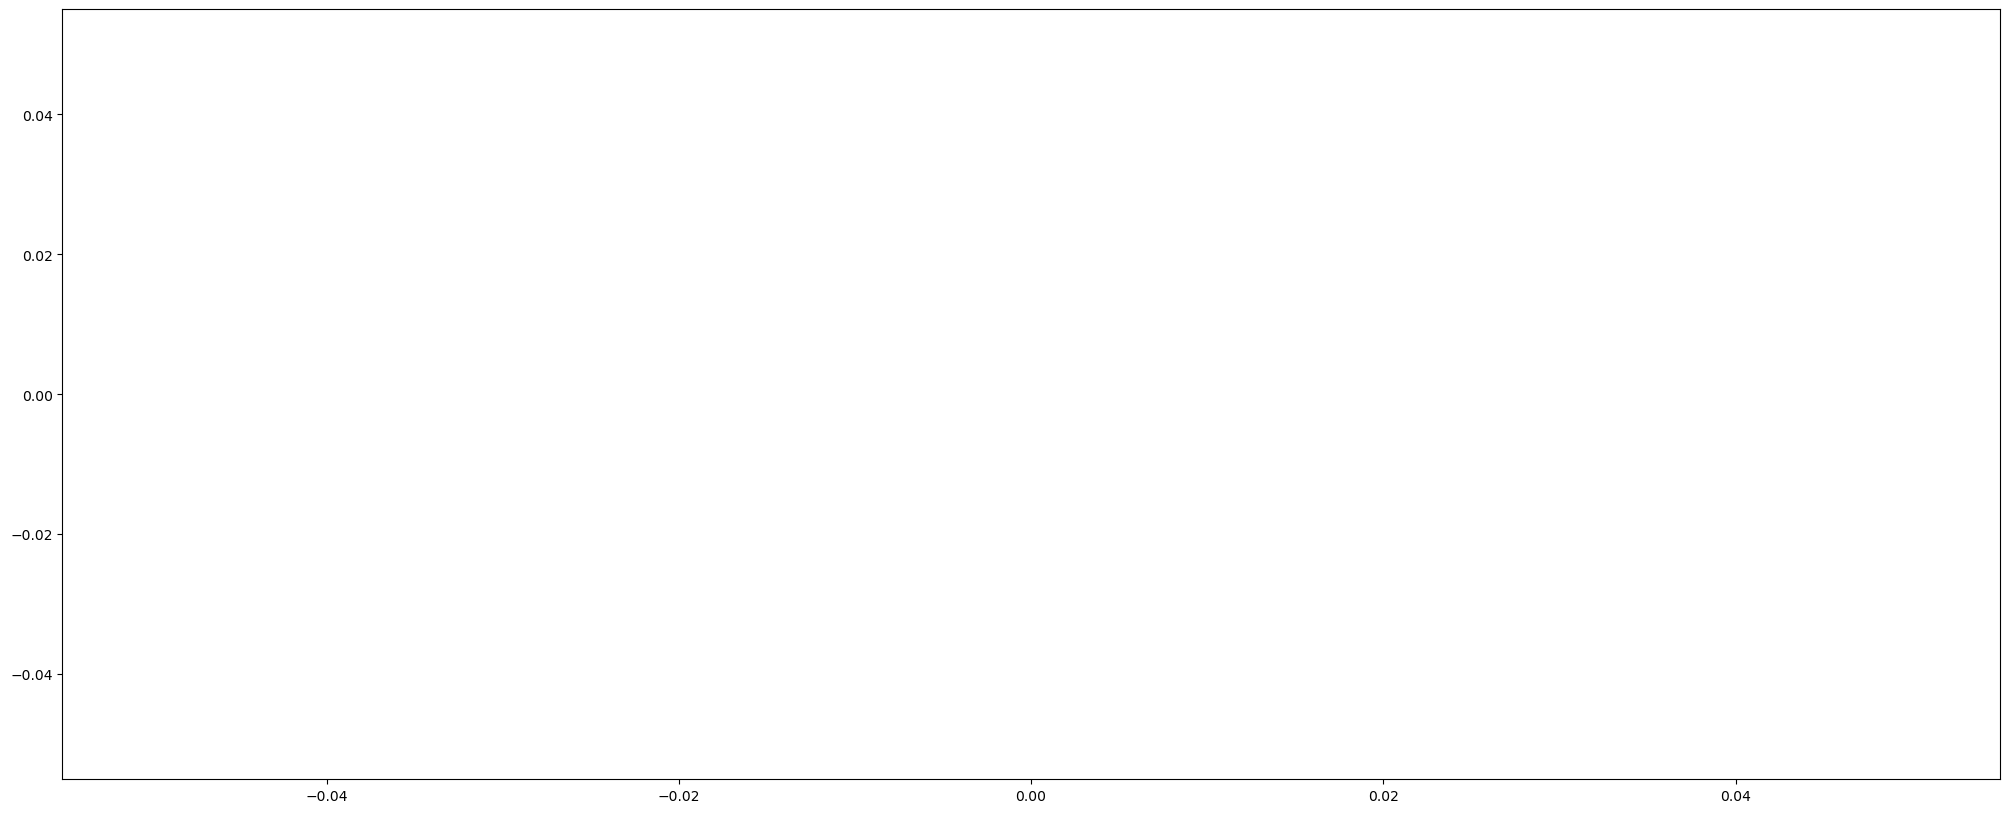

In [116]:
draw(trades.loc[trades['Date'] == '07-2021'])

In [117]:
sum(trades.loc[trades['Date'] == '07-2021'].profit.tolist())

0

In [118]:
set_1.append(sum(trades.loc[trades['Date'] == '07-2021'].profit.tolist()))

# 08-2021

In [119]:
trades.loc[trades['Date'] == '08-2021']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

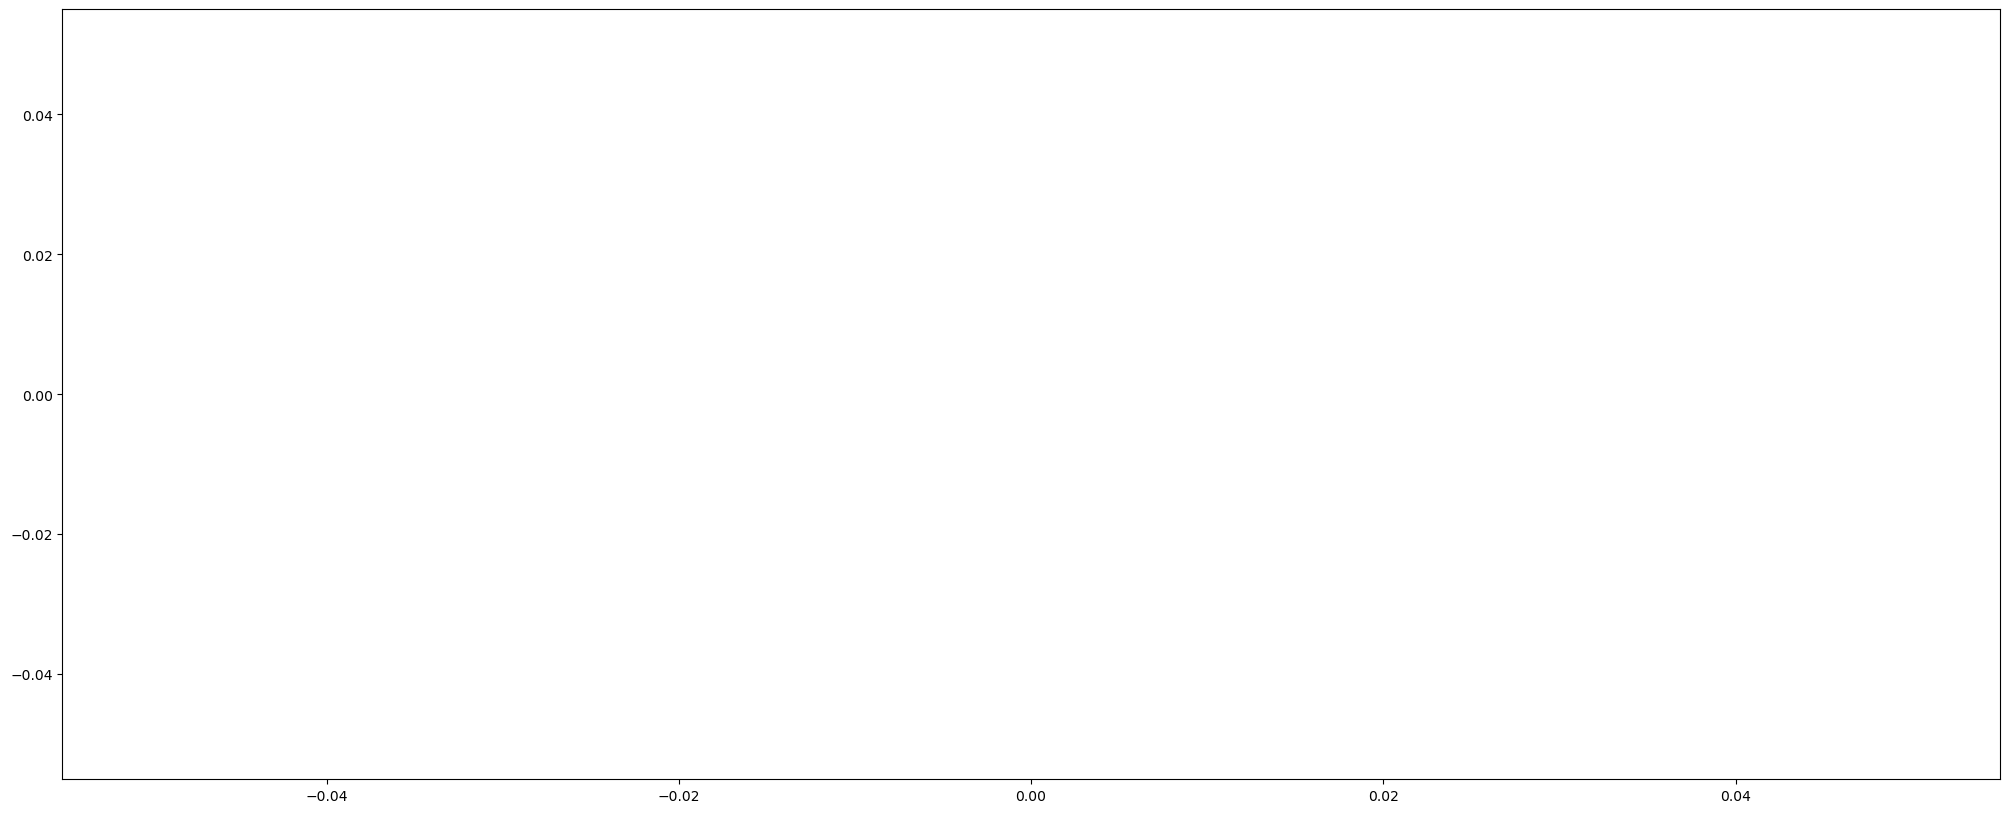

In [120]:
draw(trades.loc[trades['Date'] == '08-2021'])

In [121]:
sum(trades.loc[trades['Date'] == '08-2021'].profit.tolist())

0

In [122]:
set_1.append(sum(trades.loc[trades['Date'] == '08-2021'].profit.tolist()))

# 09-2021

In [123]:
trades.loc[trades['Date'] == '09-2021']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

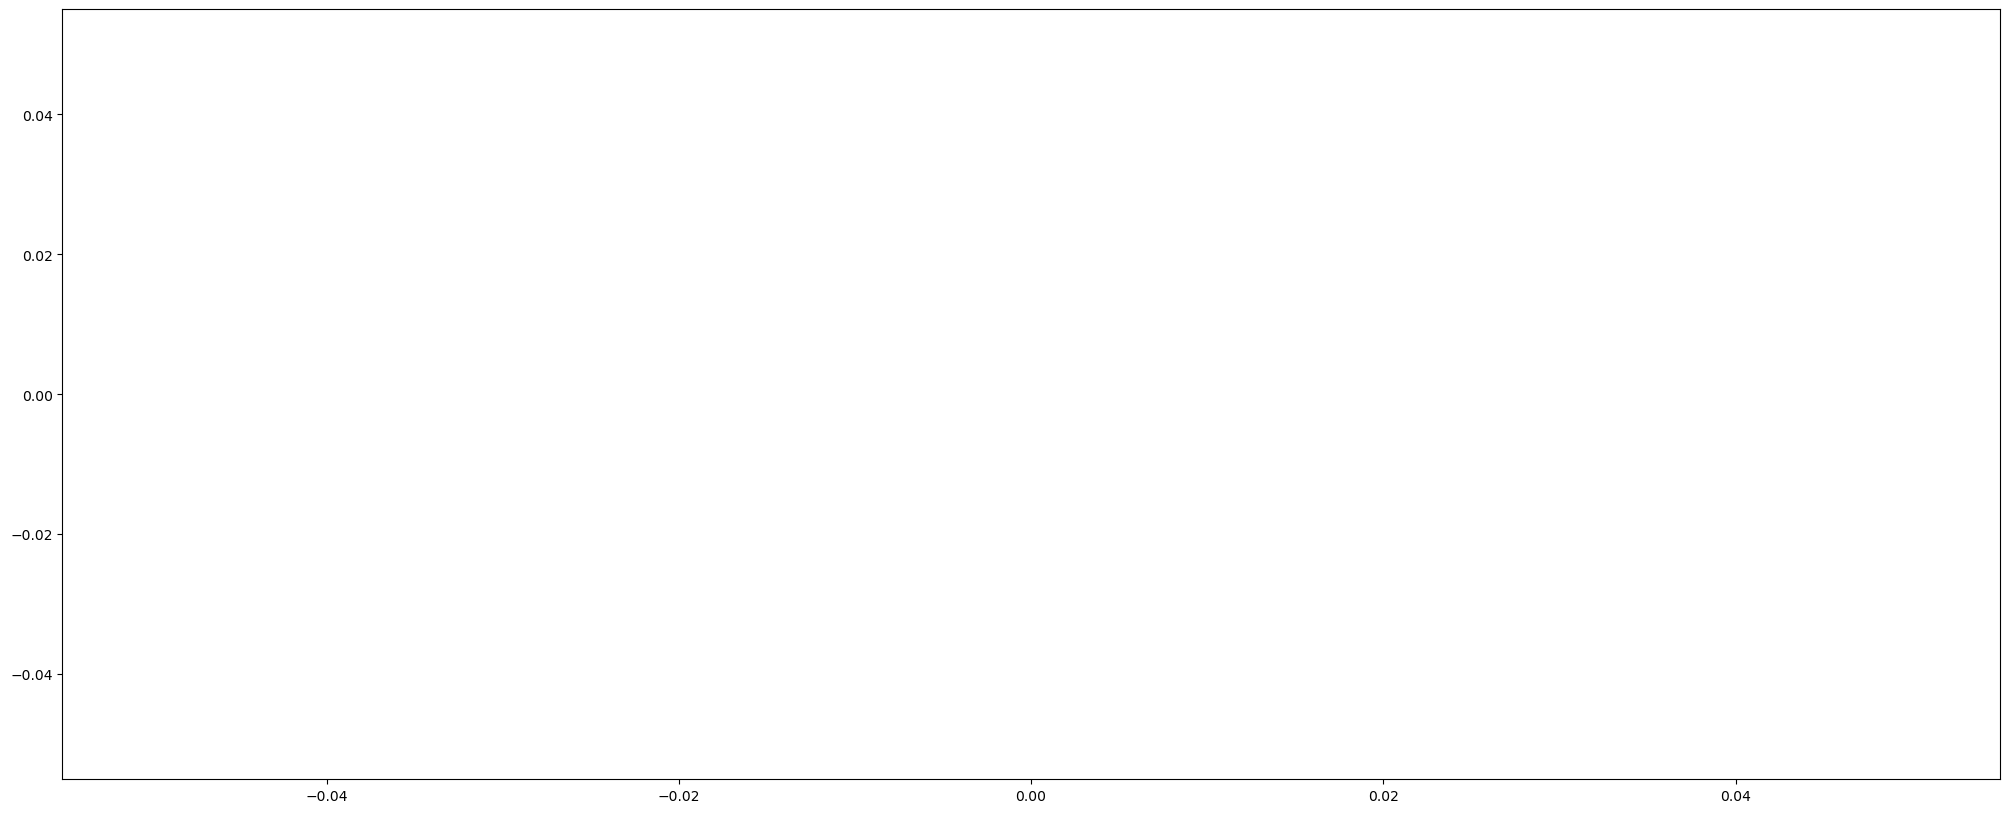

In [124]:
draw(trades.loc[trades['Date'] == '09-2021'])

In [125]:
sum(trades.loc[trades['Date'] == '09-2021'].profit.tolist())

0

In [126]:
set_1.append(sum(trades.loc[trades['Date'] == '09-2021'].profit.tolist()))

# 10-2021

In [127]:
trades.loc[trades['Date'] == '10-2021']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

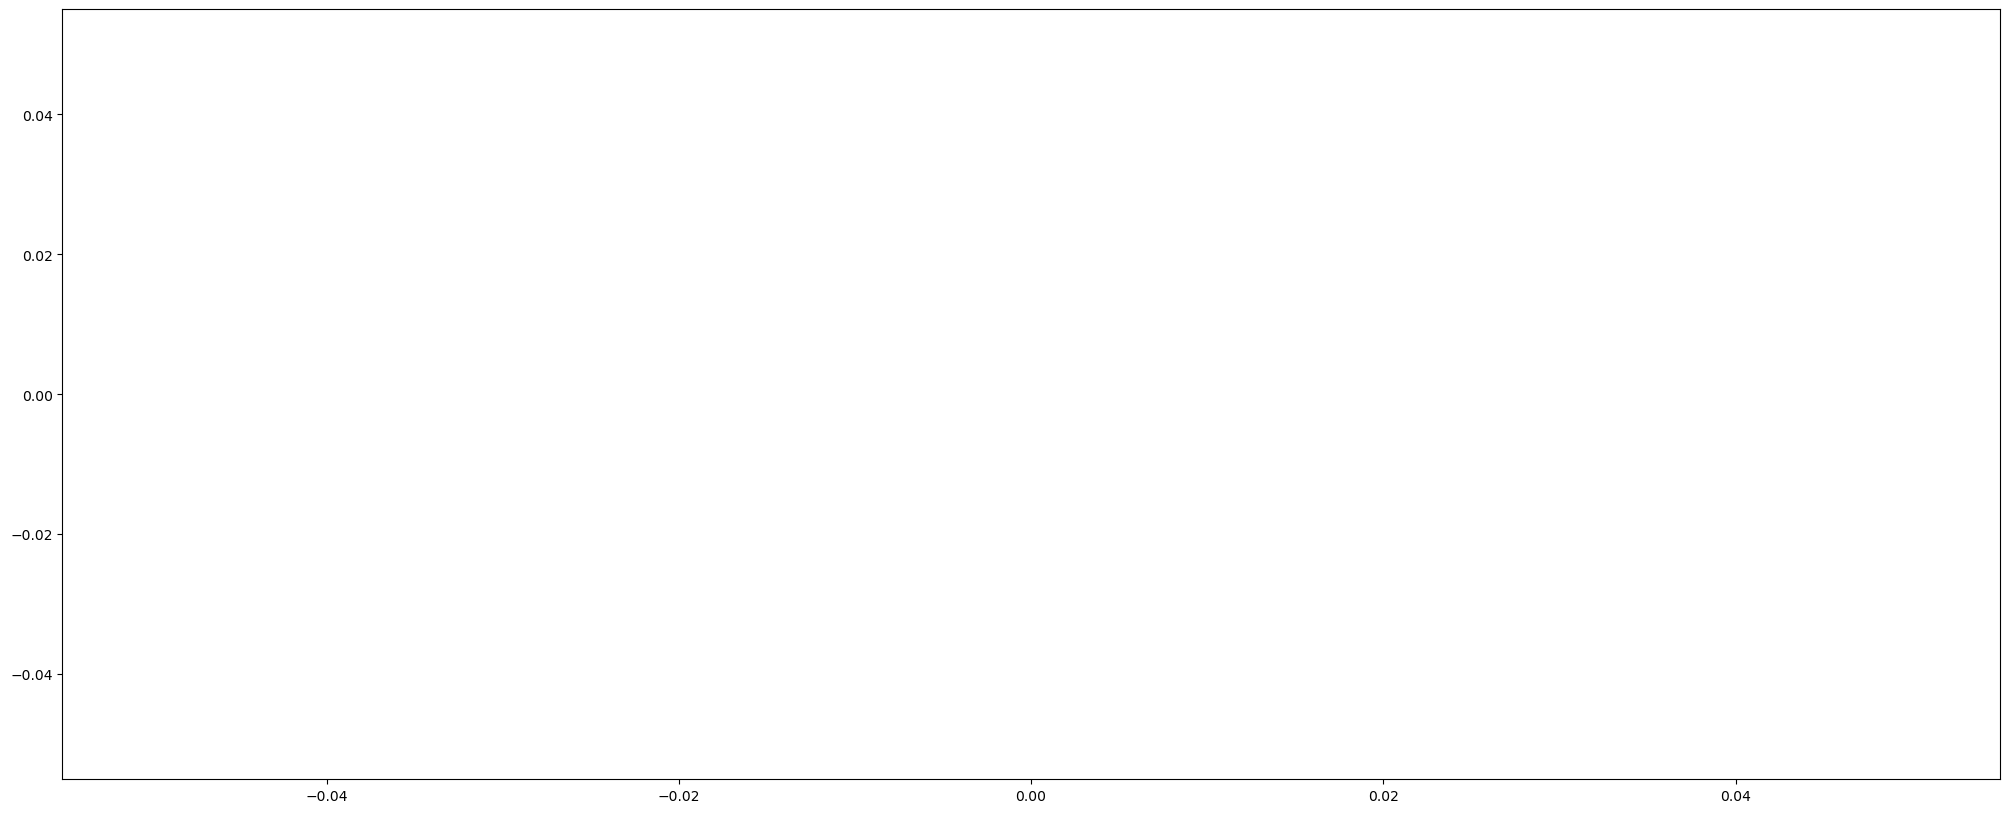

In [128]:
draw(trades.loc[trades['Date'] == '10-2021'])

In [129]:
sum(trades.loc[trades['Date'] == '10-2021'].profit.tolist())

0

In [130]:
set_1.append(sum(trades.loc[trades['Date'] == '10-2021'].profit.tolist()))

# 11-2021

In [131]:
trades.loc[trades['Date'] == '11-2021']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

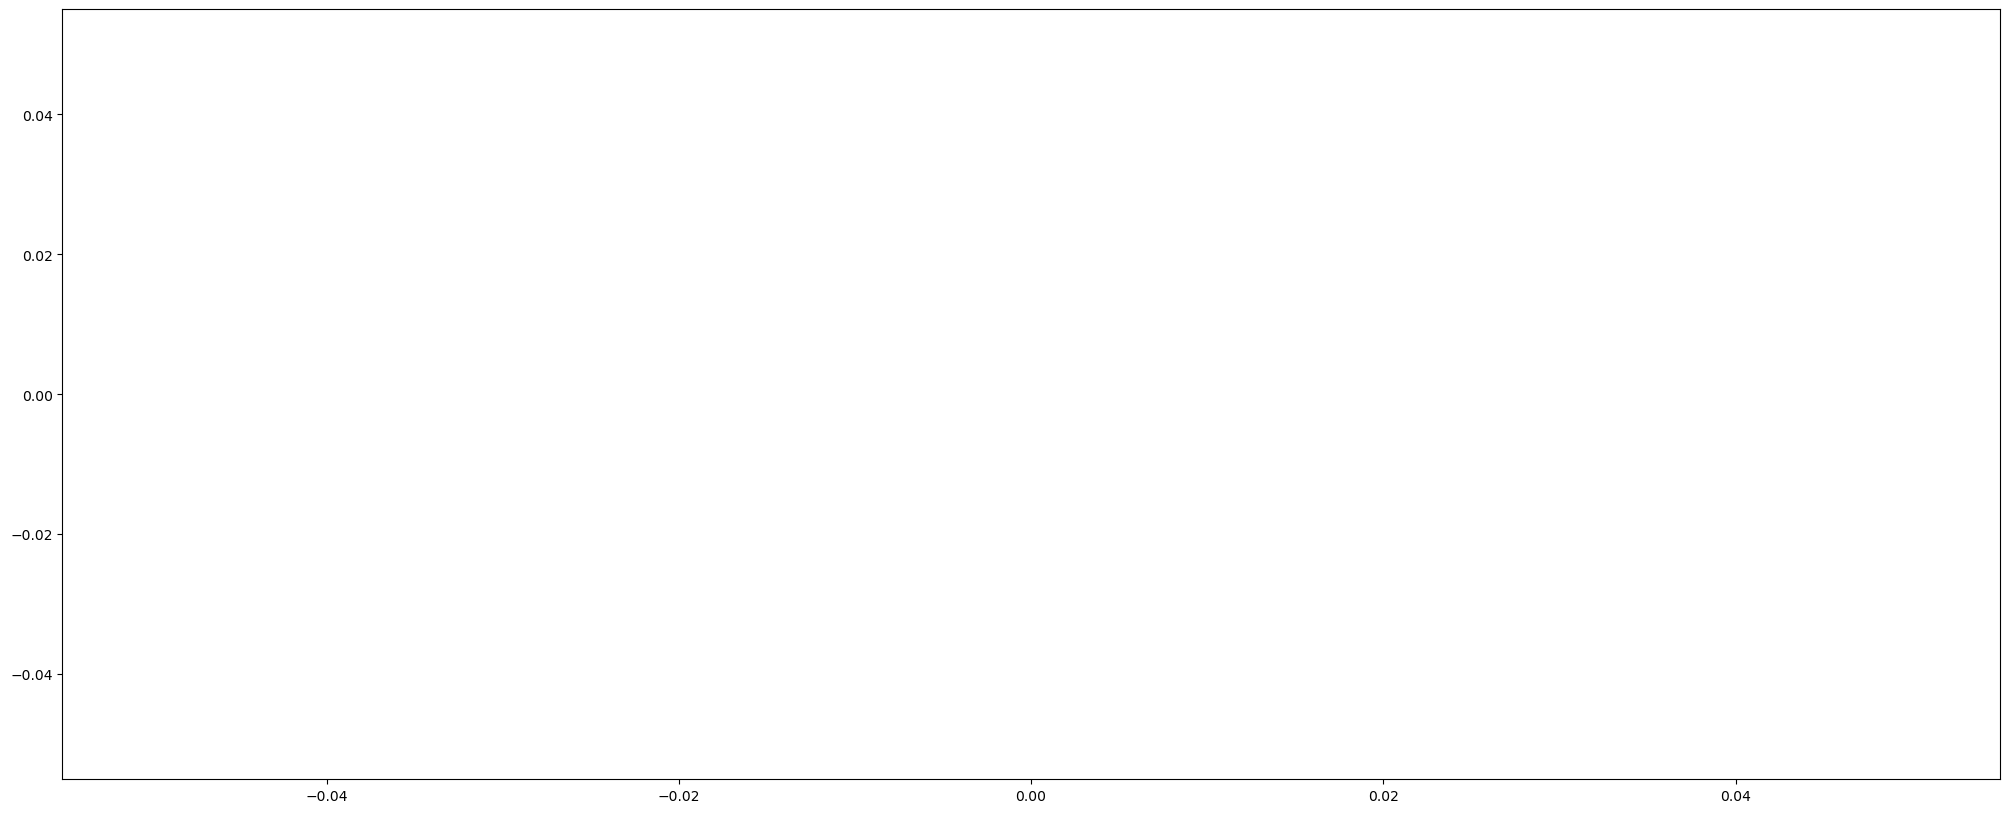

In [132]:
draw(trades.loc[trades['Date'] == '11-2021'])

In [133]:
sum(trades.loc[trades['Date'] == '11-2021'].profit.tolist())

0

In [134]:
set_1.append(sum(trades.loc[trades['Date'] == '11-2021'].profit.tolist()))

# 12-2021

In [135]:
trades.loc[trades['Date'] == '12-2021']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

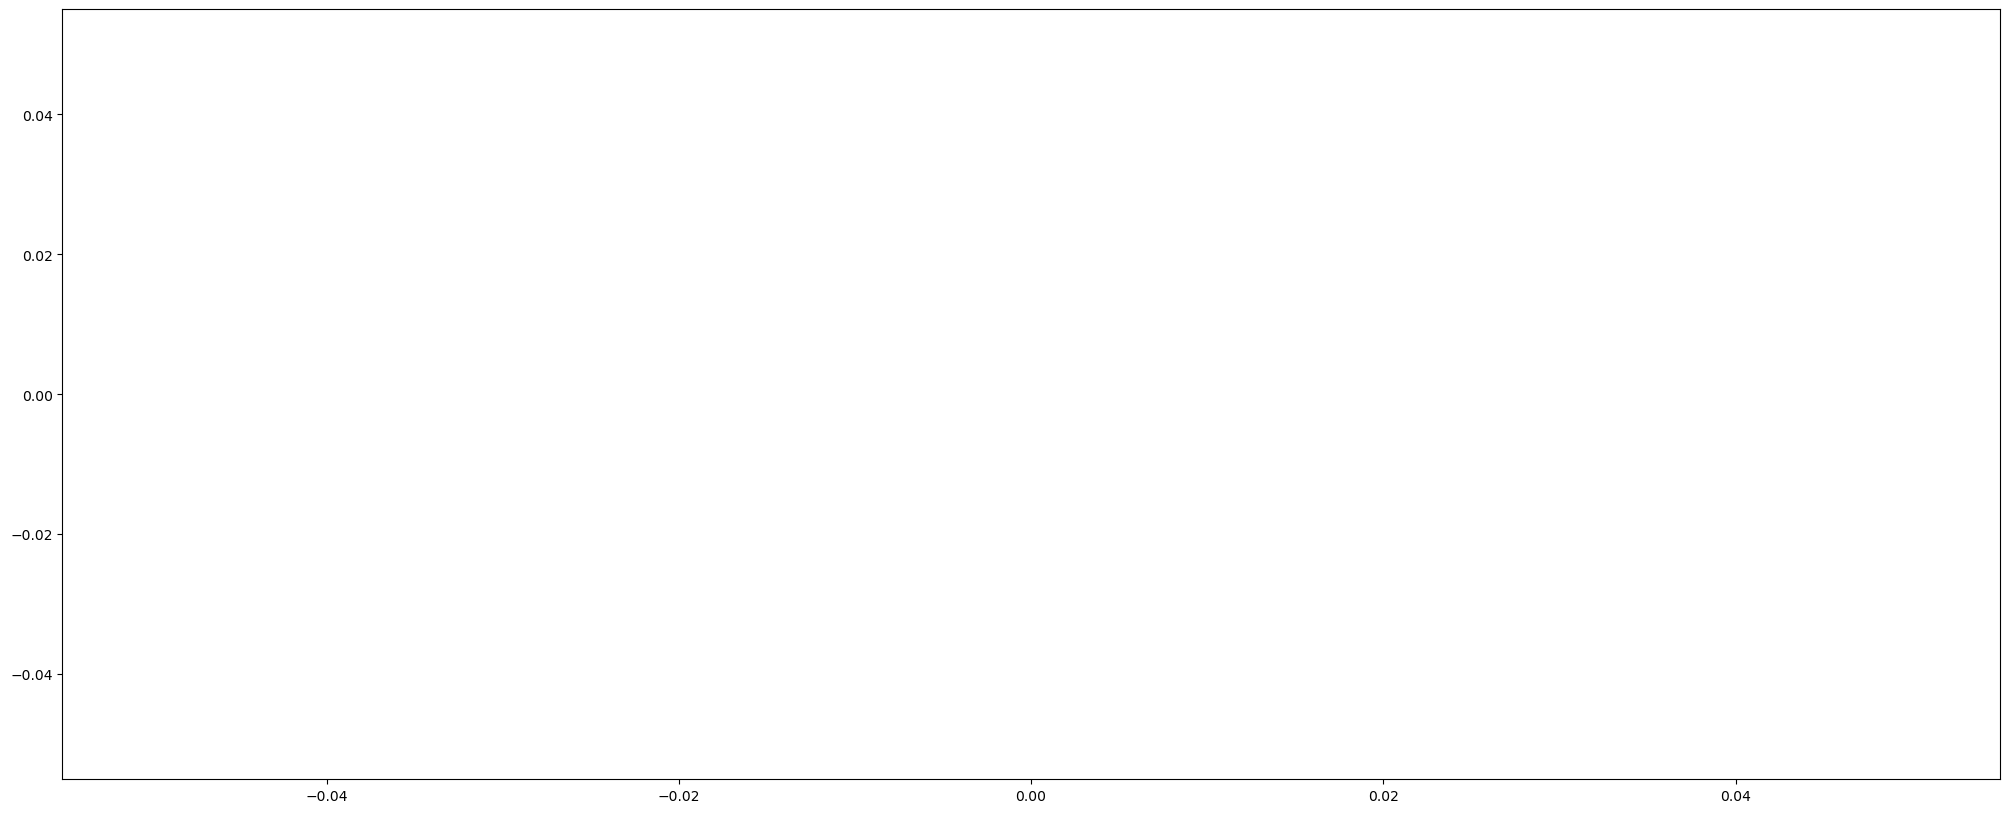

In [136]:
draw(trades.loc[trades['Date'] == '12-2021'])

In [137]:
sum(trades.loc[trades['Date'] == '12-2021'].profit.tolist())

0

In [138]:
set_1.append(sum(trades.loc[trades['Date'] == '12-2021'].profit.tolist()))

# 01-2022

In [139]:
trades.loc[trades['Date'] == '01-2022']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

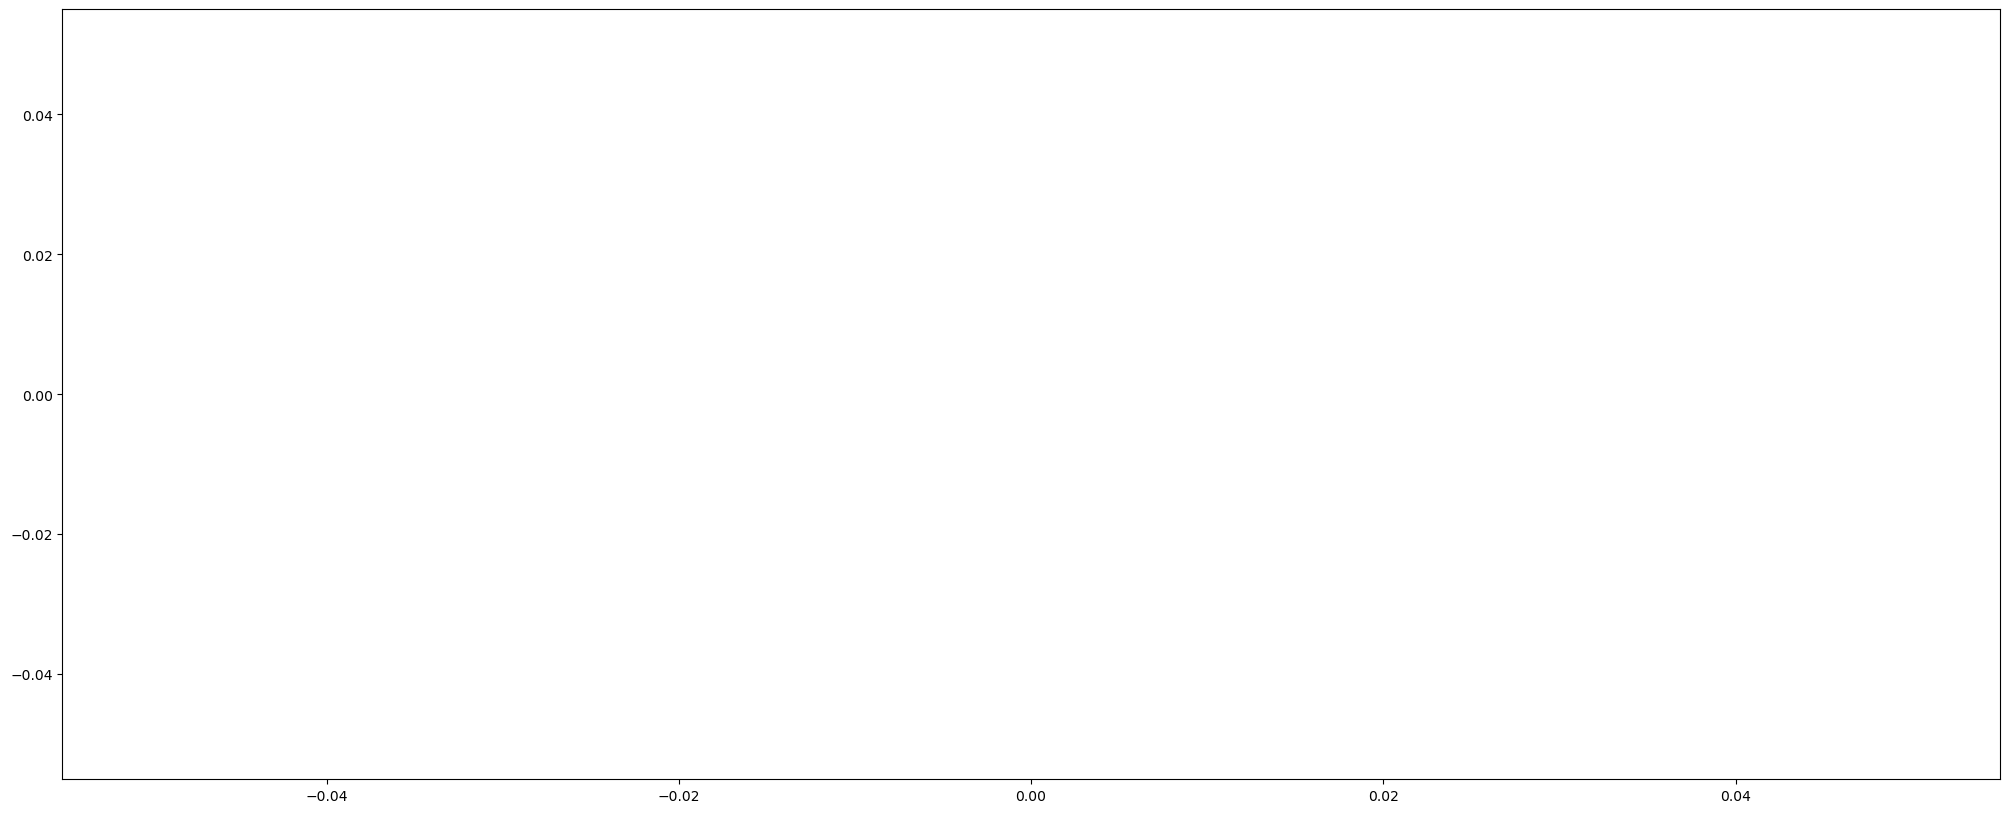

In [140]:
draw(trades.loc[trades['Date'] == '01-2022'])

In [141]:
sum(trades.loc[trades['Date'] == '01-2022'].profit.tolist())

0

In [142]:
set_1.append(sum(trades.loc[trades['Date'] == '01-2022'].profit.tolist()))

# 02-2022

In [143]:
trades.loc[trades['Date'] == '02-2022']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

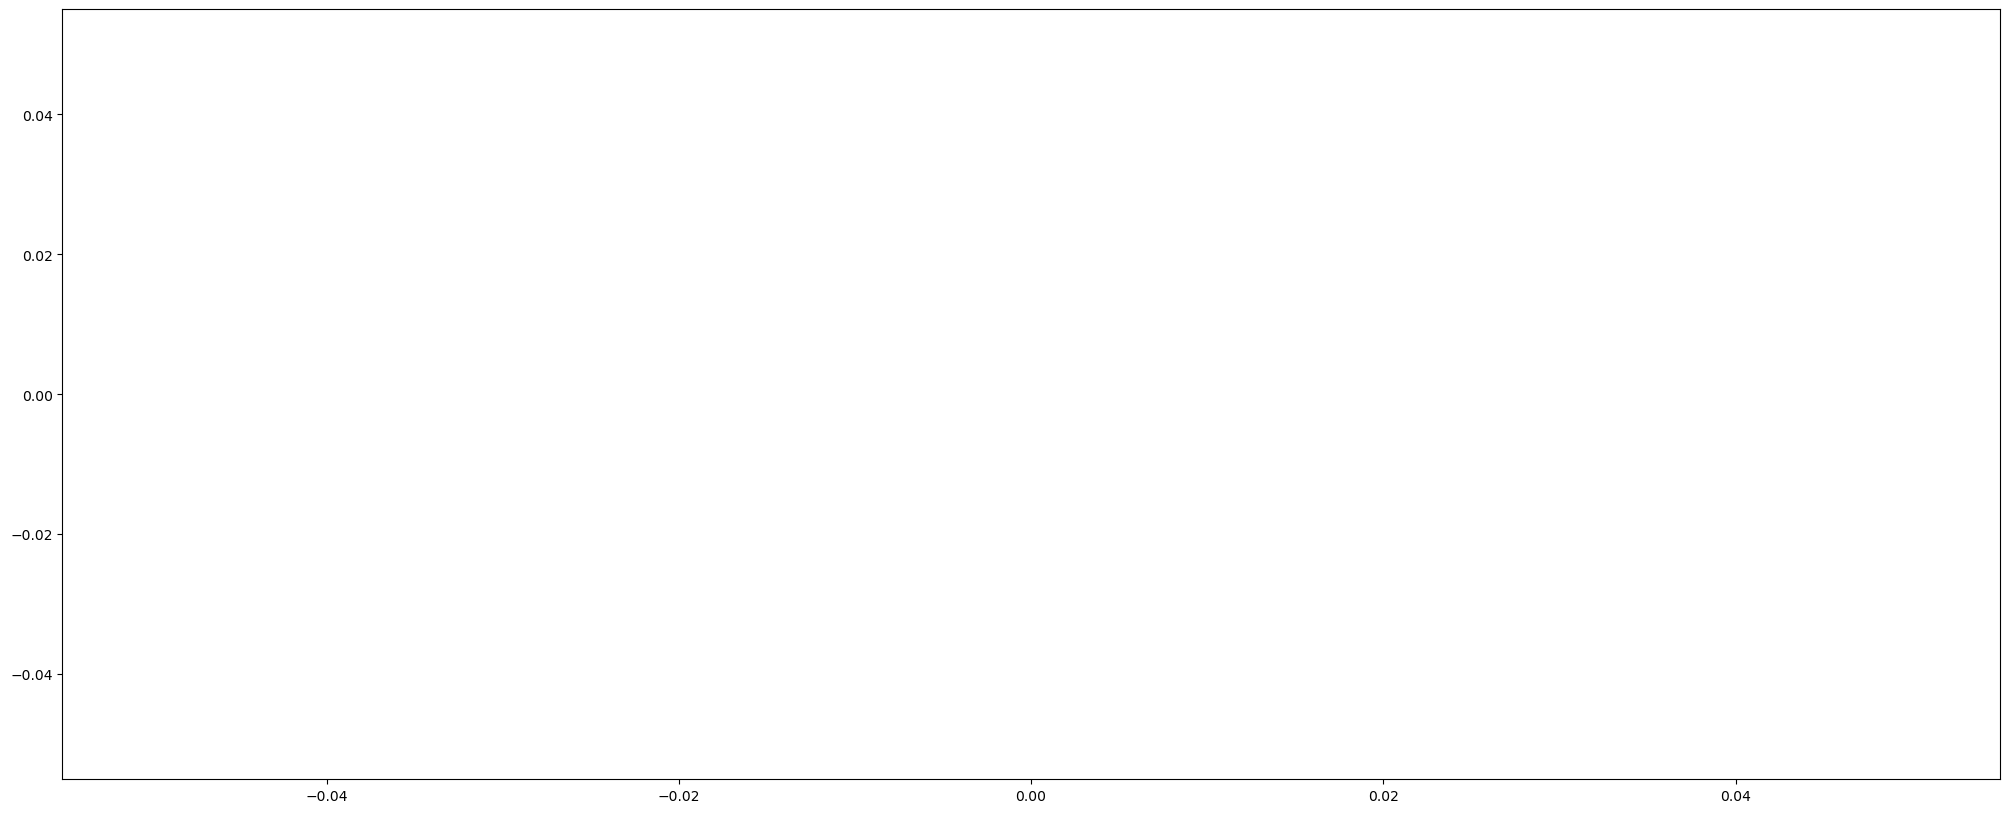

In [144]:
draw(trades.loc[trades['Date'] == '02-2022'])

In [145]:
sum(trades.loc[trades['Date'] == '02-2022'].profit.tolist())

0

In [146]:
set_1.append(sum(trades.loc[trades['Date'] == '02-2022'].profit.tolist()))

# 03-2022

In [147]:
trades.loc[trades['Date'] == '03-2022']


,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

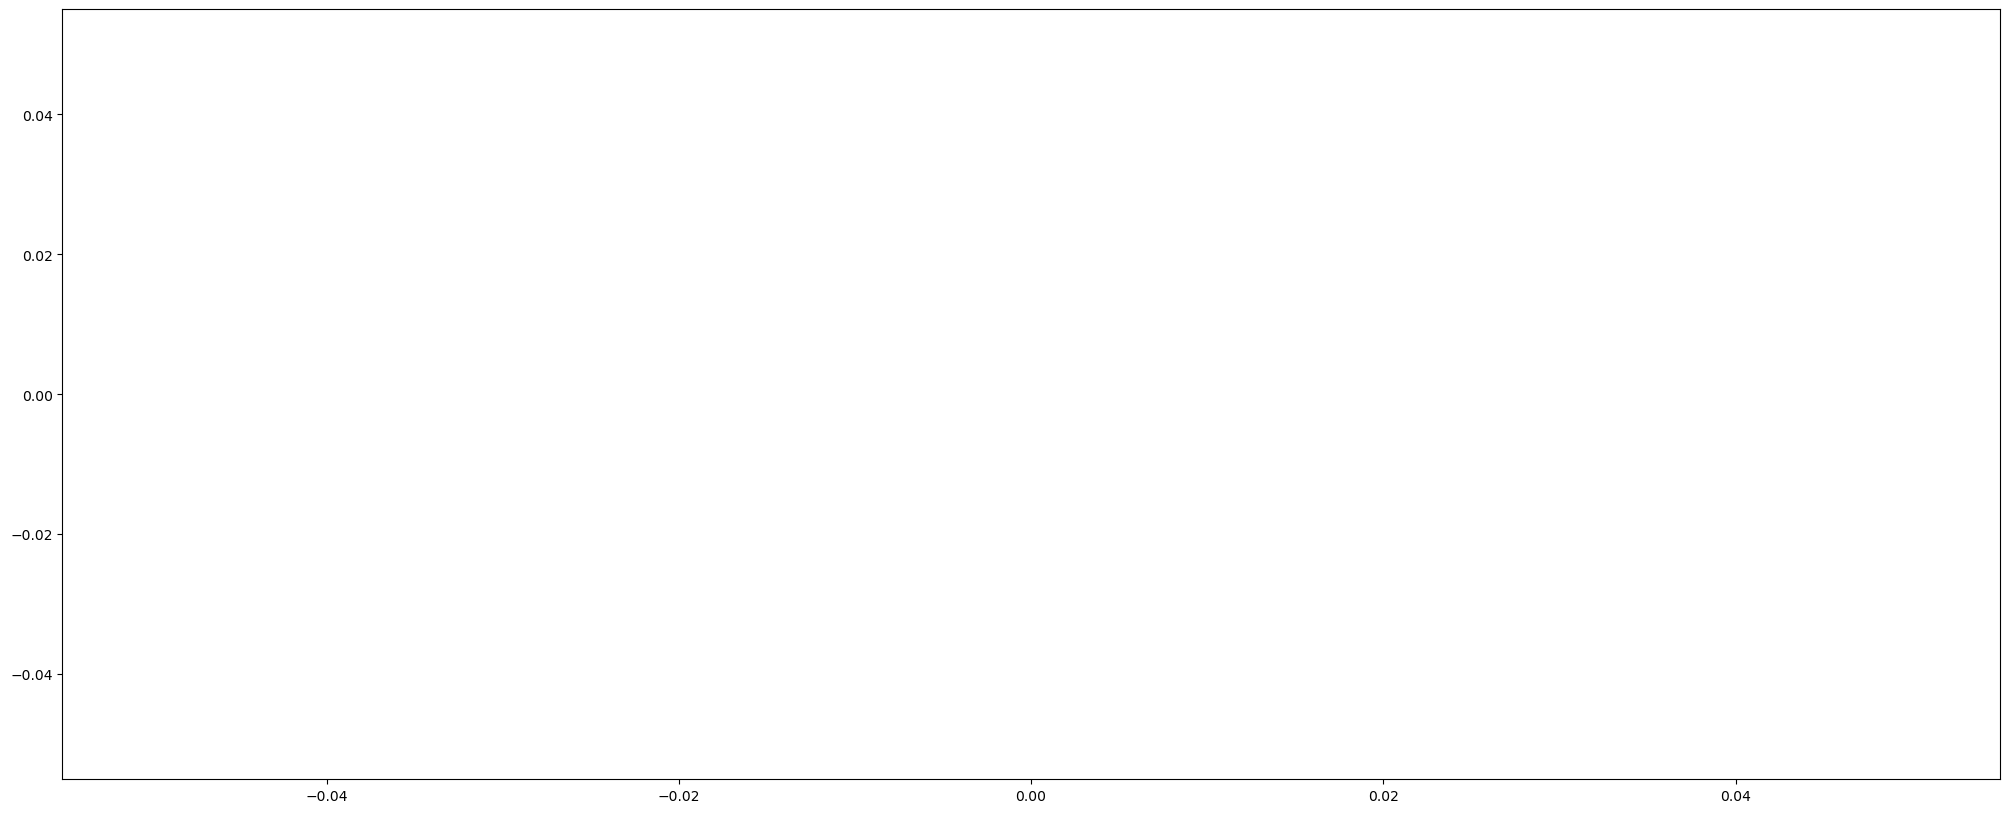

In [148]:
draw(trades.loc[trades['Date'] == '03-2022'])


In [149]:
sum(trades.loc[trades['Date'] == '03-2022'].profit.tolist())

0

In [150]:
set_1.append(sum(trades.loc[trades['Date'] == '03-2022'].profit.tolist()))

# 04-2022

In [151]:
trades.loc[trades['Date'] == '04-2022']


,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

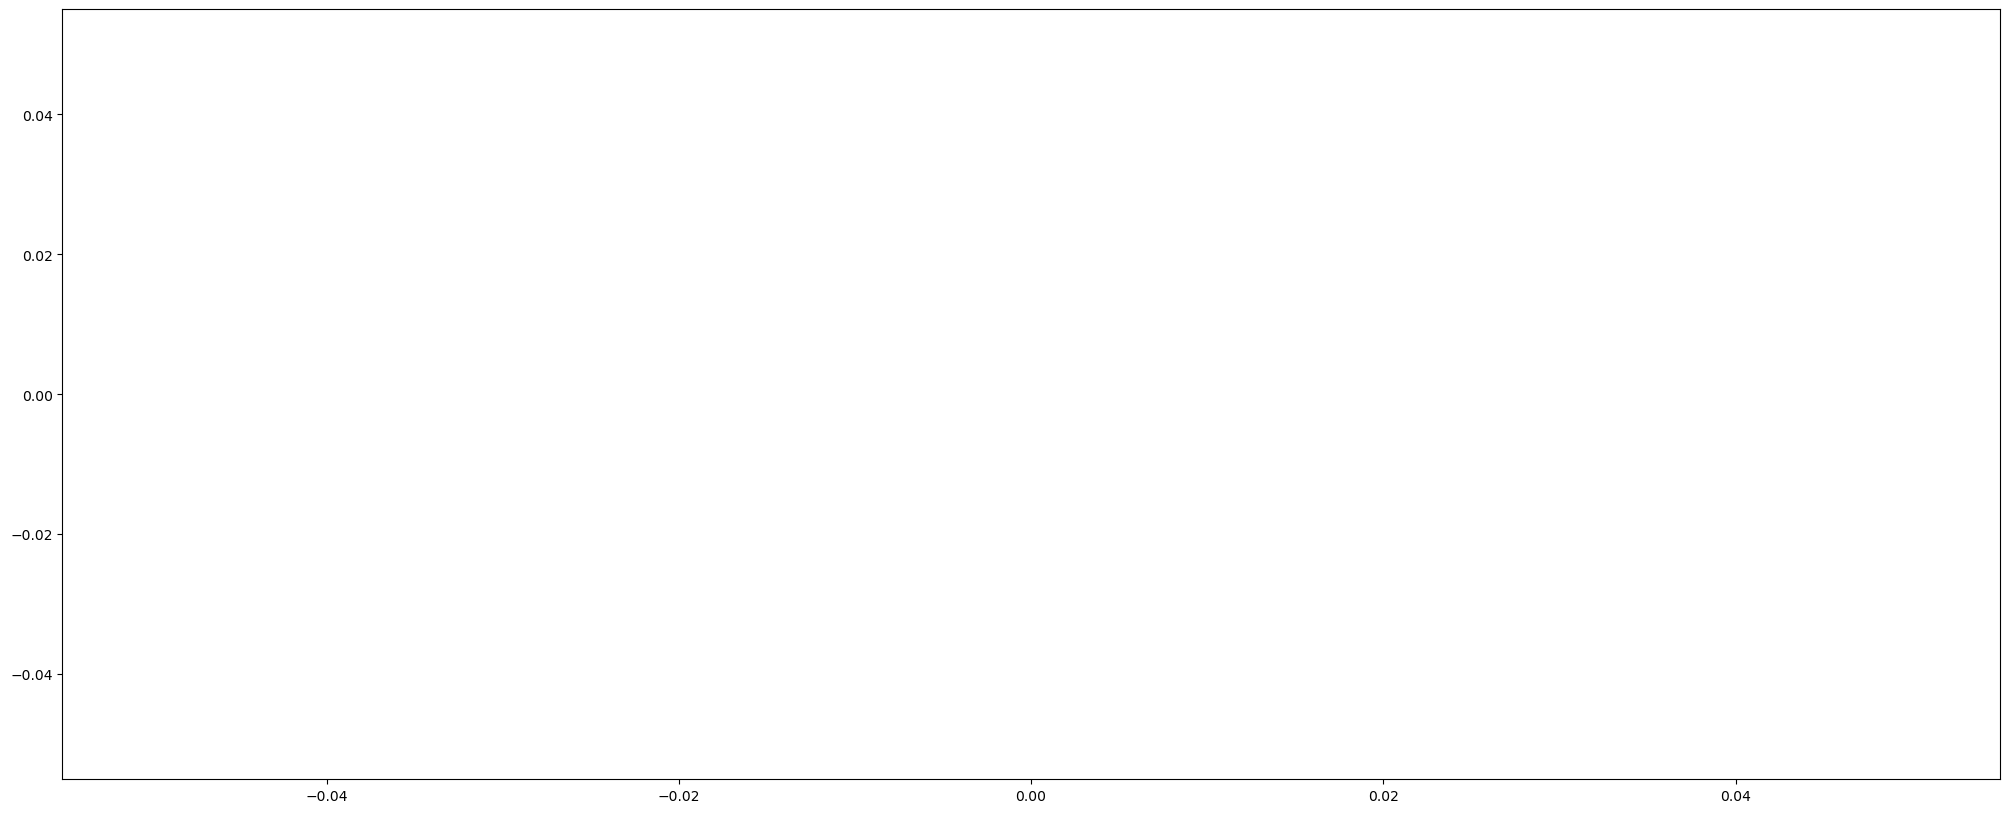

In [152]:
draw(trades.loc[trades['Date'] == '04-2022'])


In [153]:
sum(trades.loc[trades['Date'] == '04-2022'].profit.tolist())

0

In [154]:
set_1.append(sum(trades.loc[trades['Date'] == '04-2022'].profit.tolist()))

# 05-2022

In [155]:
trades.loc[trades['Date'] == '05-2022']


,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

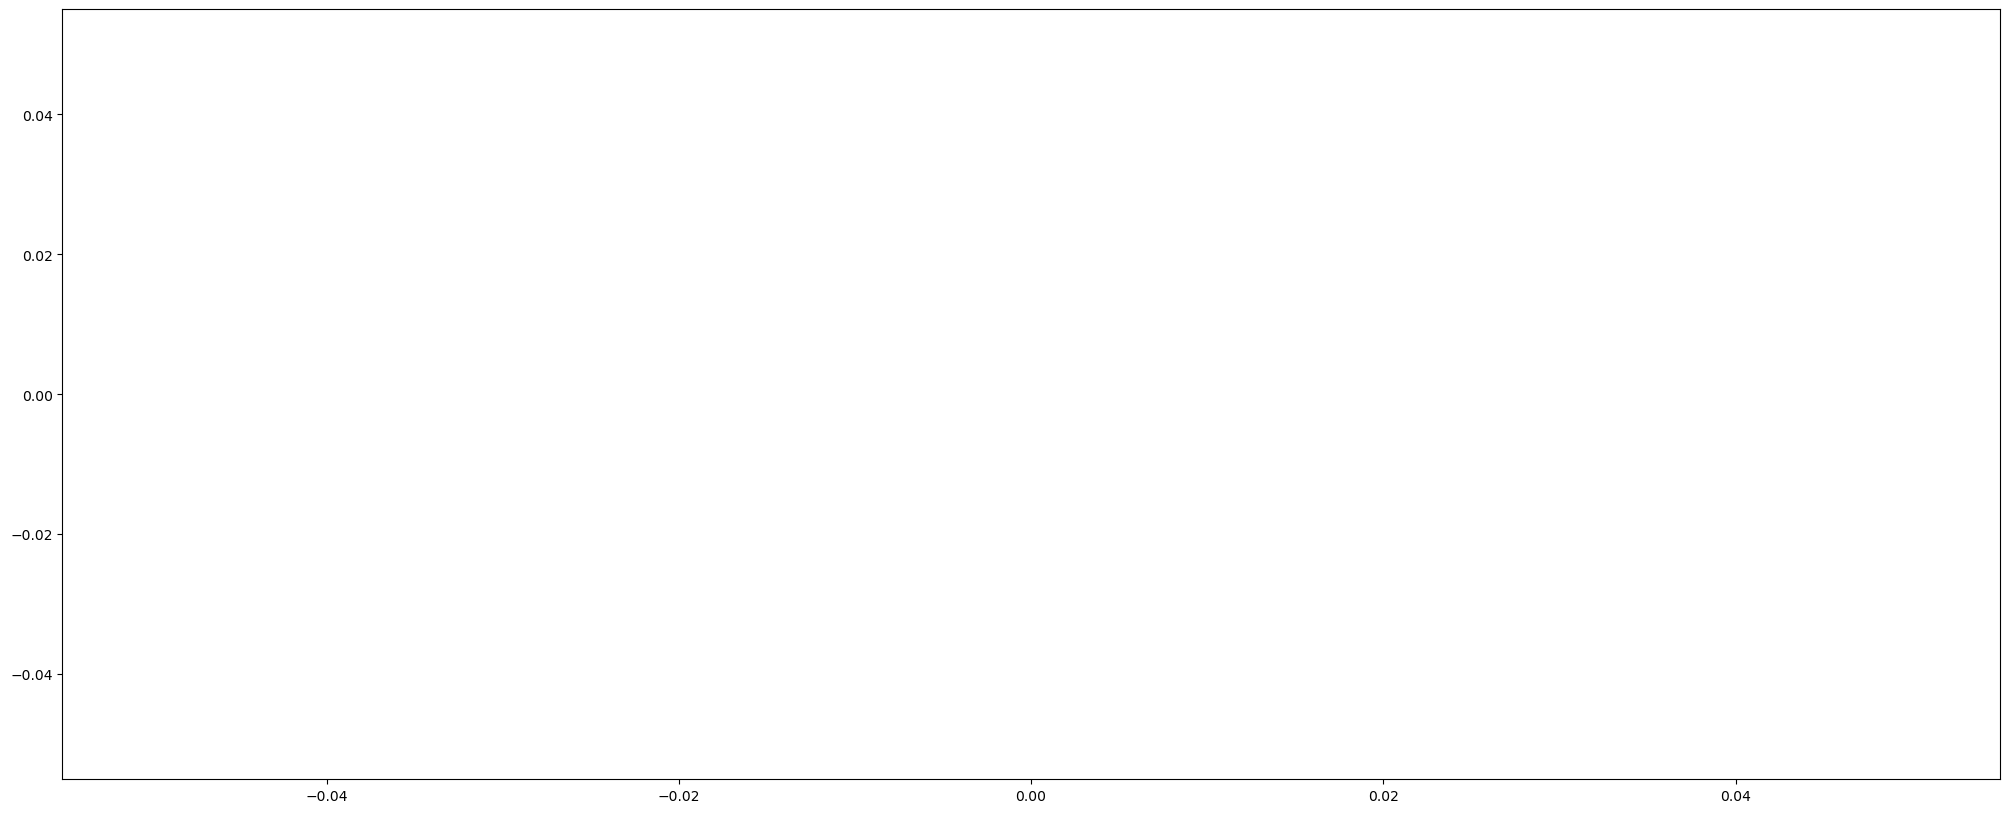

In [156]:
draw(trades.loc[trades['Date'] == '05-2022'])


In [ ]:
sum(trades.loc[trades['Date'] == '05-2022'].profit.tolist())

In [157]:
set_1.append(sum(trades.loc[trades['Date'] == '05-2022'].profit.tolist()))

# 06-2022

In [158]:
trades.loc[trades['Date'] == '06-2022']


,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

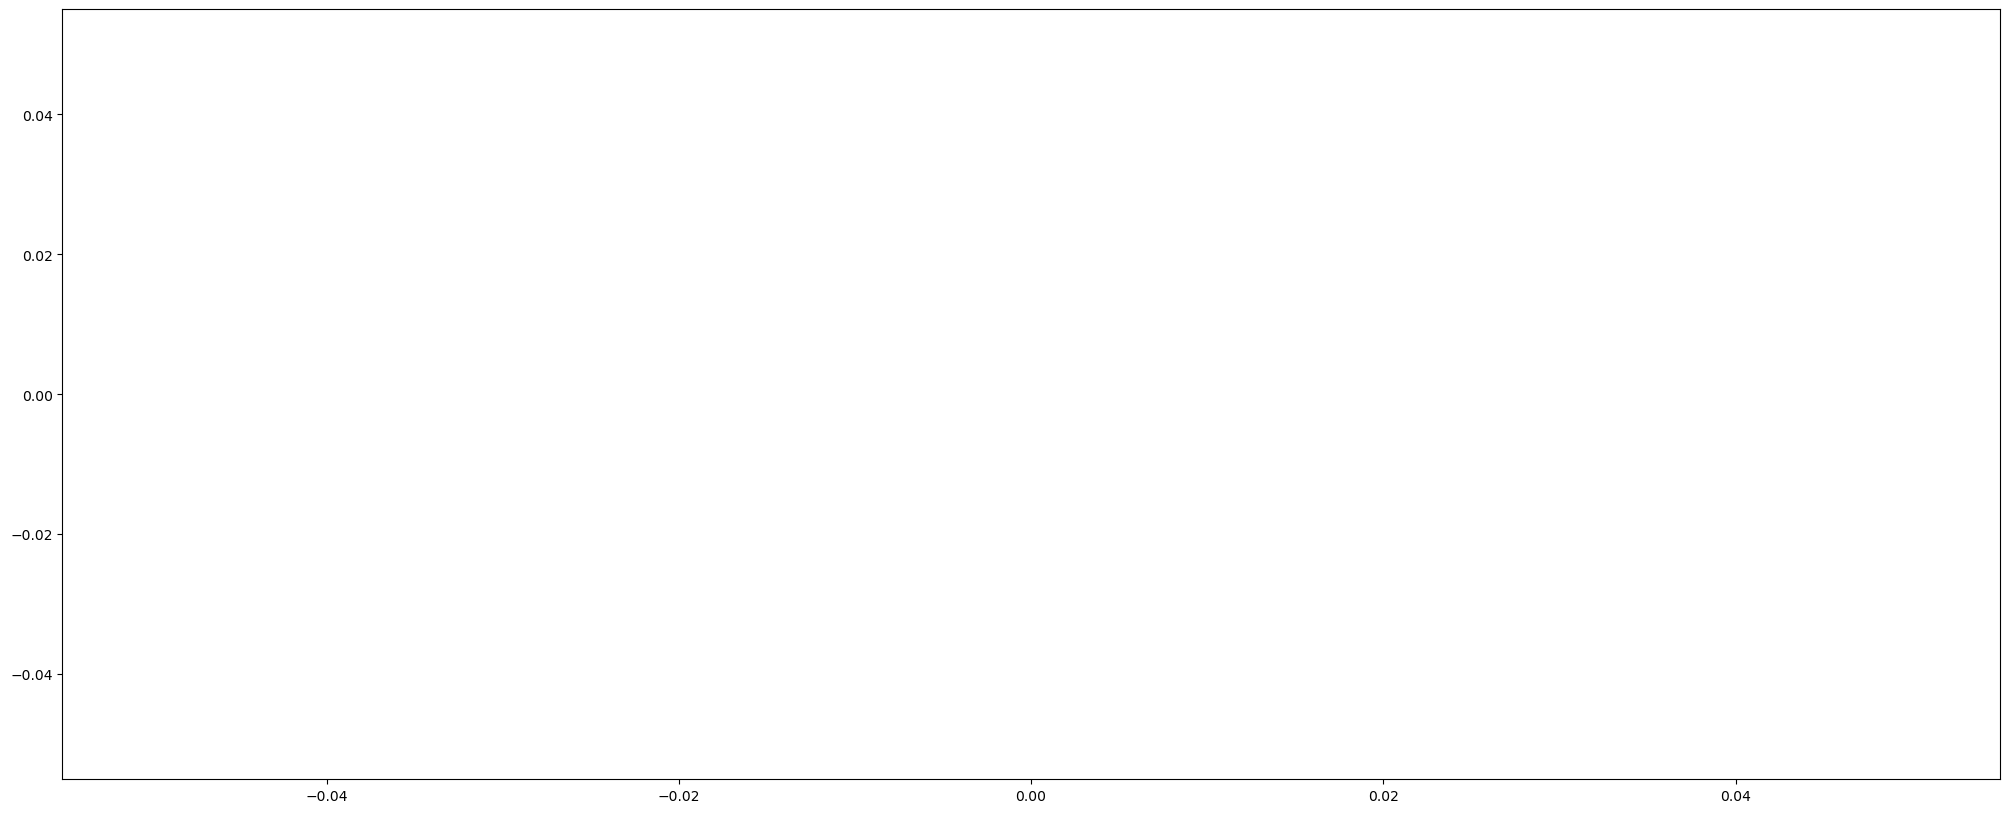

In [159]:
draw(trades.loc[trades['Date'] == '06-2022'])


In [ ]:
sum(trades.loc[trades['Date'] == '06-2022'].profit.tolist())

In [ ]:
set_1.append(sum(trades.loc[trades['Date'] == '06-2022'].profit.tolist()))

# 07-2022

In [160]:
trades.loc[trades['Date'] == '07-2022']


,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

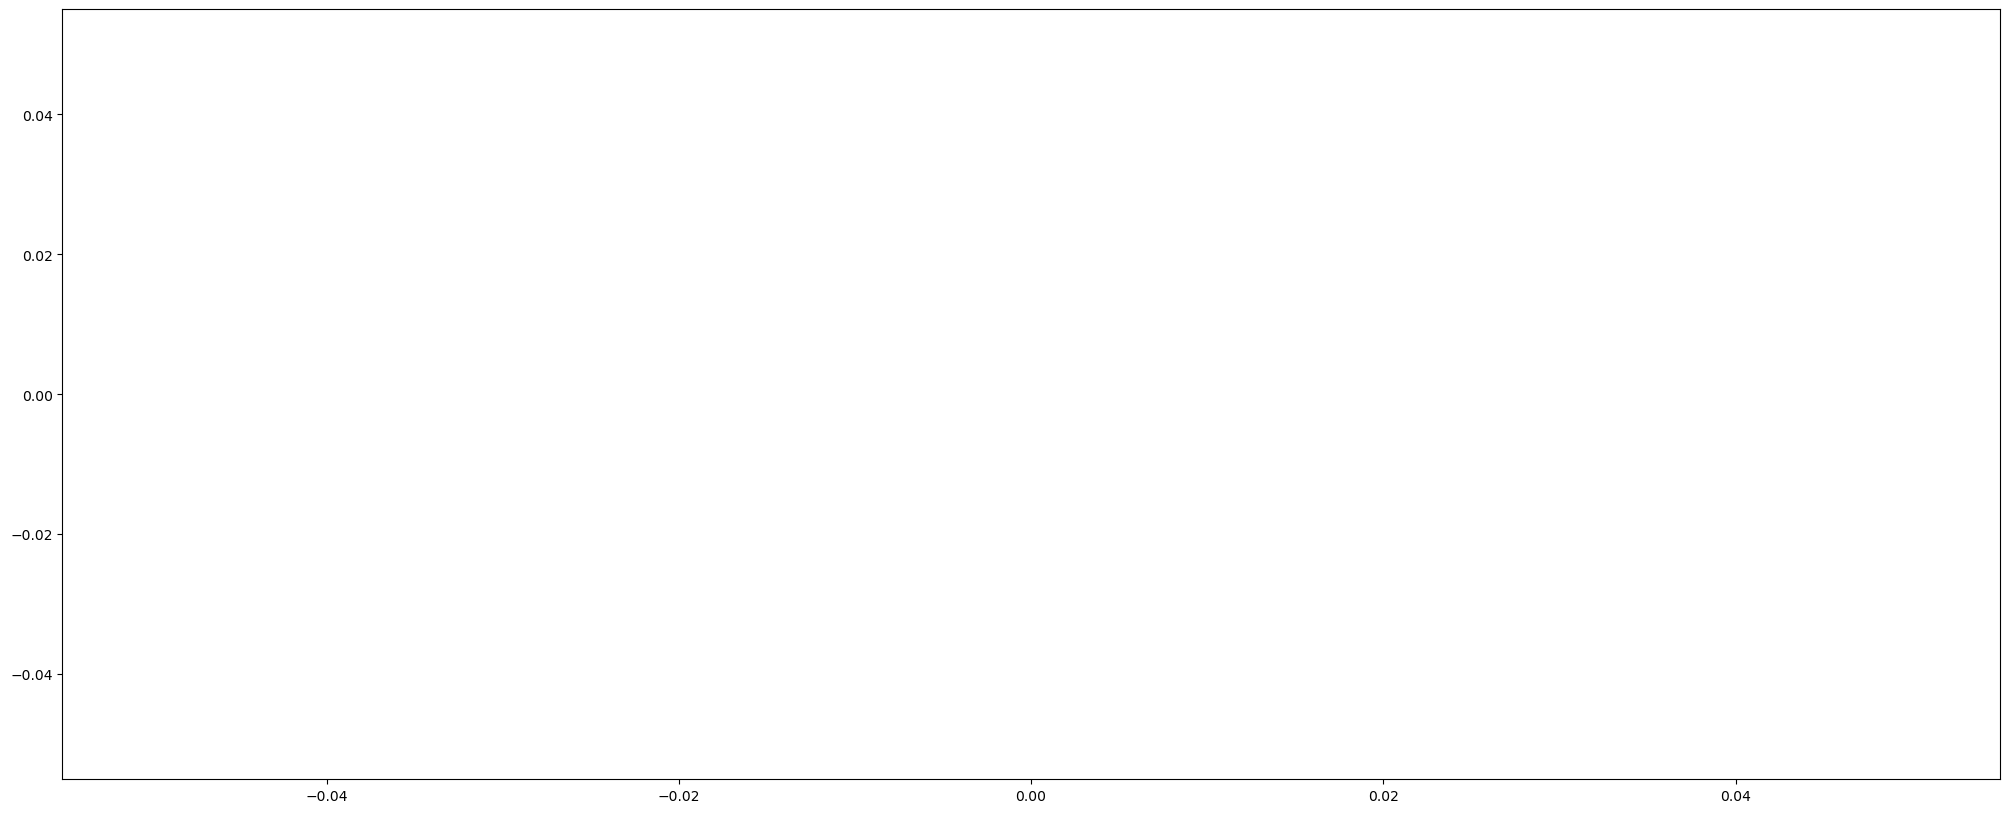

In [161]:
draw(trades.loc[trades['Date'] == '07-2022'])


In [162]:
sum(trades.loc[trades['Date'] == '07-2022'].profit.tolist())

0

In [163]:
set_1.append(sum(trades.loc[trades['Date'] == '07-2022'].profit.tolist()))

# 08-2022

In [164]:
trades.loc[trades['Date'] == '08-2022']


,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

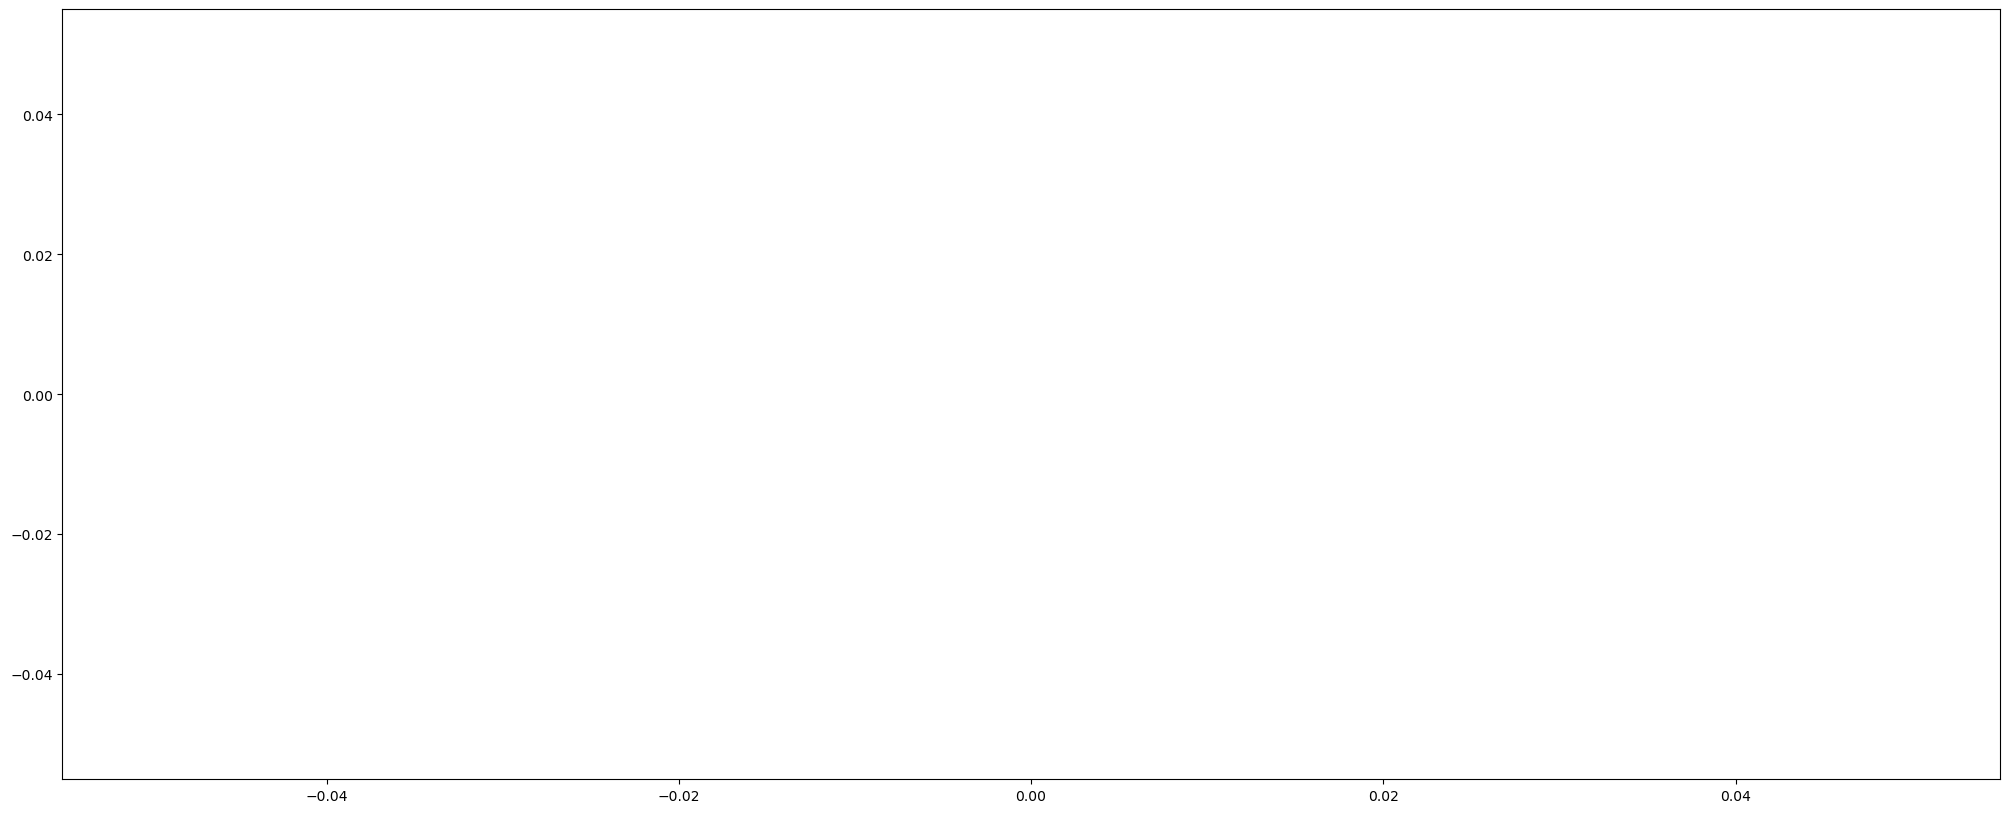

In [165]:
draw(trades.loc[trades['Date'] == '08-2022'])


In [166]:
sum(trades.loc[trades['Date'] == '08-2022'].profit.tolist())

0

In [167]:
set_1.append(sum(trades.loc[trades['Date'] == '08-2022'].profit.tolist()))

# 09-2022

In [168]:
trades.loc[trades['Date'] == '09-2022']


,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

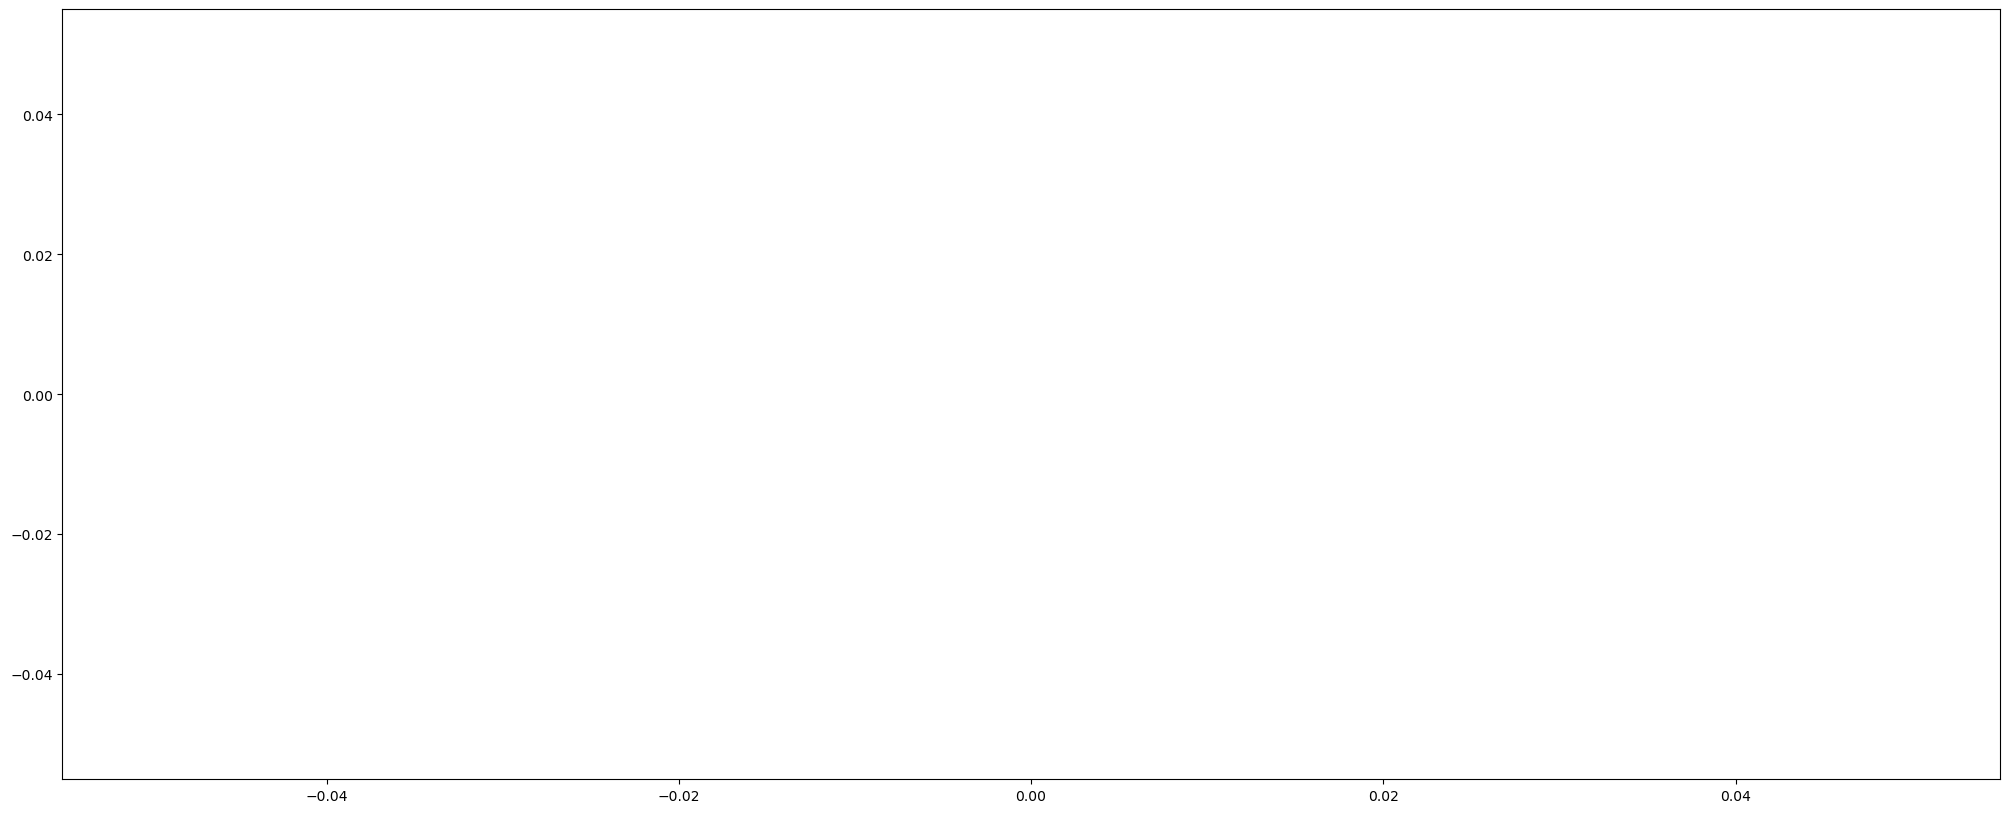

In [169]:
draw(trades.loc[trades['Date'] == '09-2022'])


In [ ]:
sum(trades.loc[trades['Date'] == '09-2022'].profit.tolist())

In [170]:
set_1.append(sum(trades.loc[trades['Date'] == '09-2022'].profit.tolist()))

# 10-2022

In [171]:
trades.loc[trades['Date'] == '10-2022']


,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

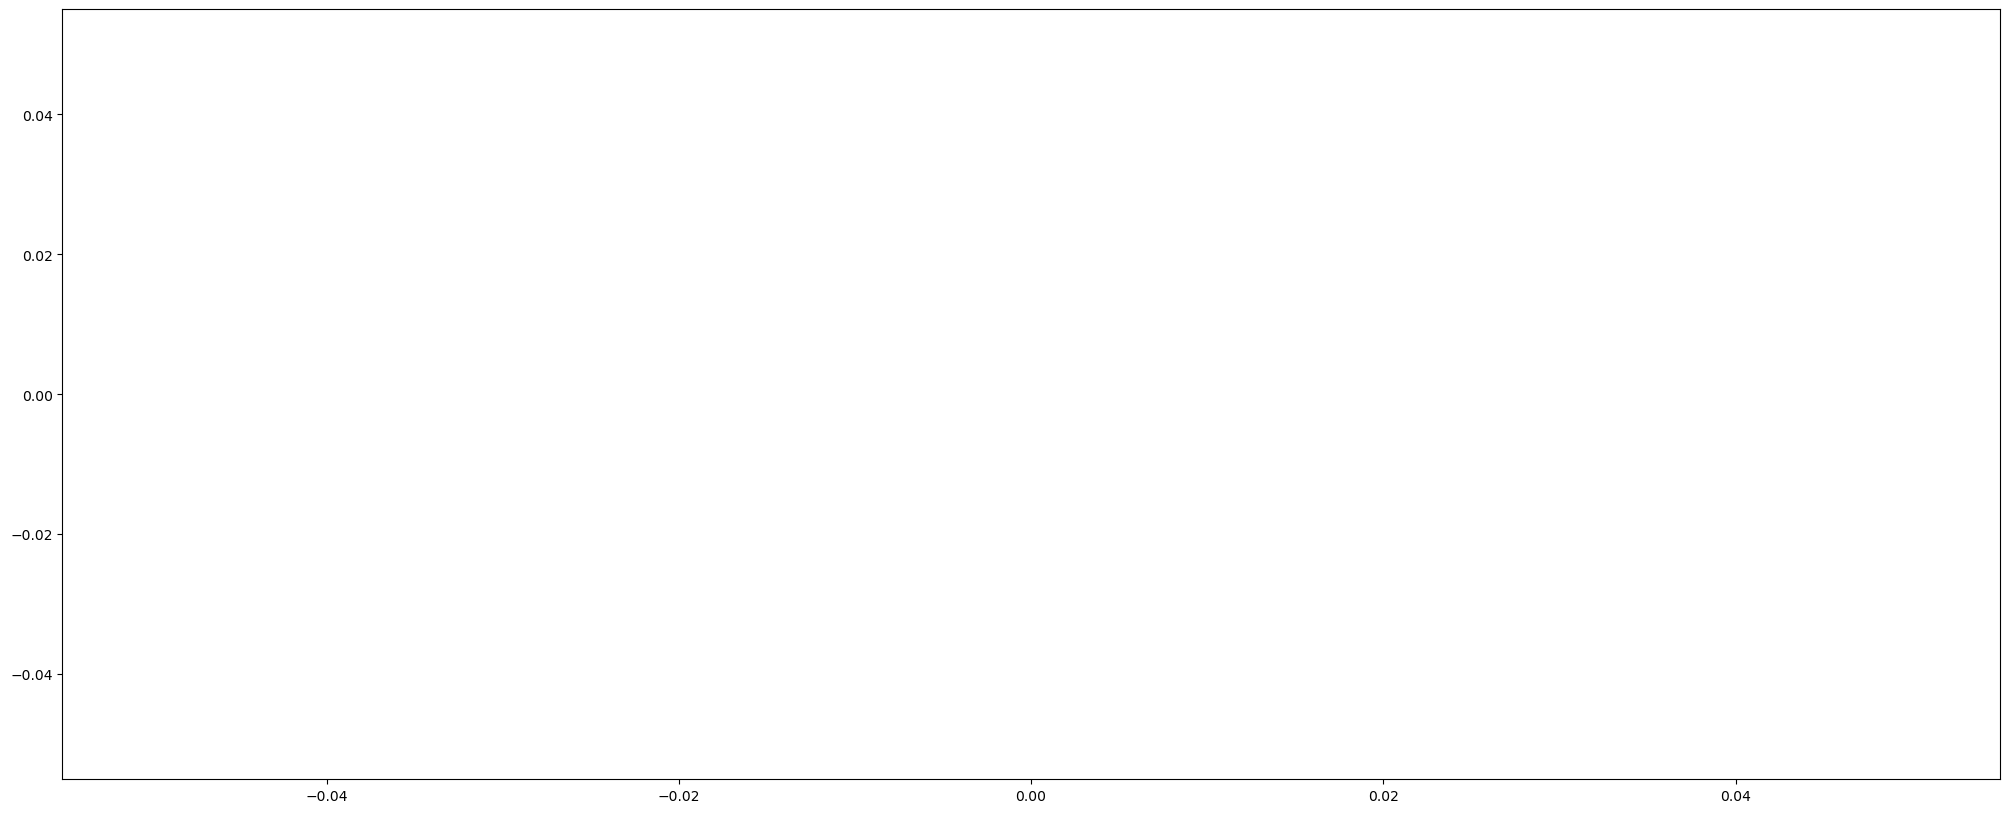

In [172]:
draw(trades.loc[trades['Date'] == '10-2022'])

In [173]:
sum(trades.loc[trades['Date'] == '10-2022'].profit.tolist())

0

In [174]:
set_1.append(sum(trades.loc[trades['Date'] == '10-2022'].profit.tolist()))

# 11-2022

In [175]:
trades.loc[trades['Date'] == '11-2022']


,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

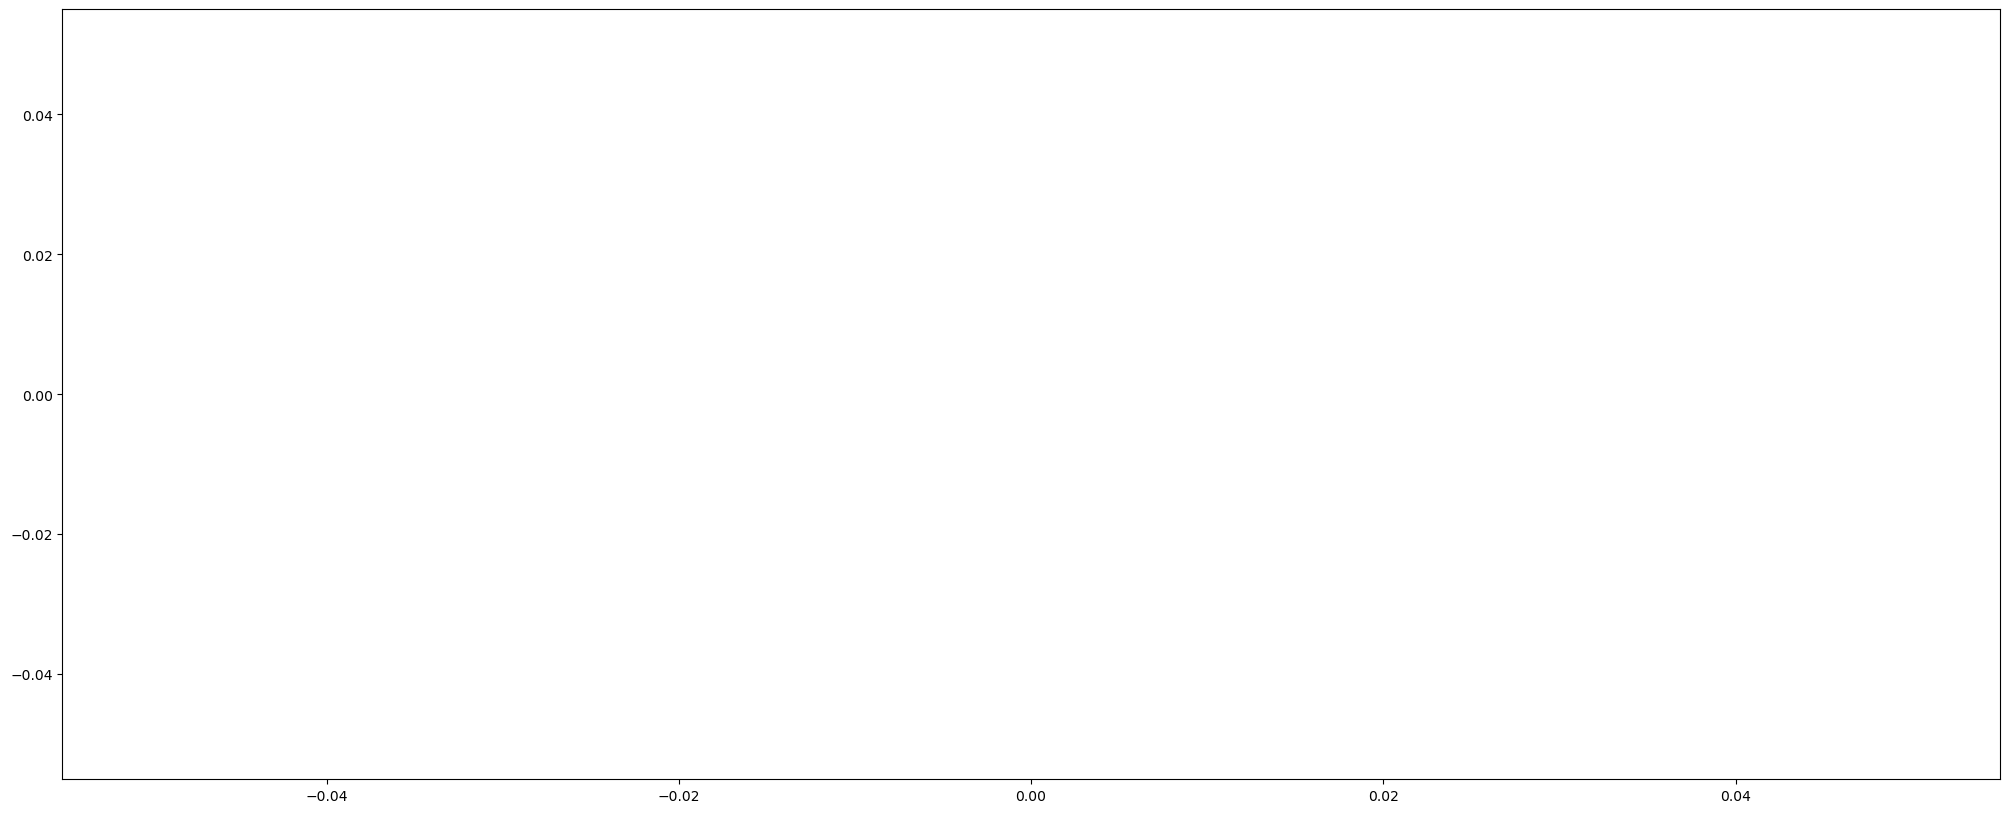

In [176]:
draw(trades.loc[trades['Date'] == '11-2022'])


In [177]:
sum(trades.loc[trades['Date'] == '11-2022'].profit.tolist())

0

In [178]:
set_1.append(sum(trades.loc[trades['Date'] == '11-2022'].profit.tolist()))

# 12-2022

In [179]:
trades.loc[trades['Date'] == '12-2022']

,Символ,Дата входа,% изменения,WL,profit,Date


IndexError: list index out of range

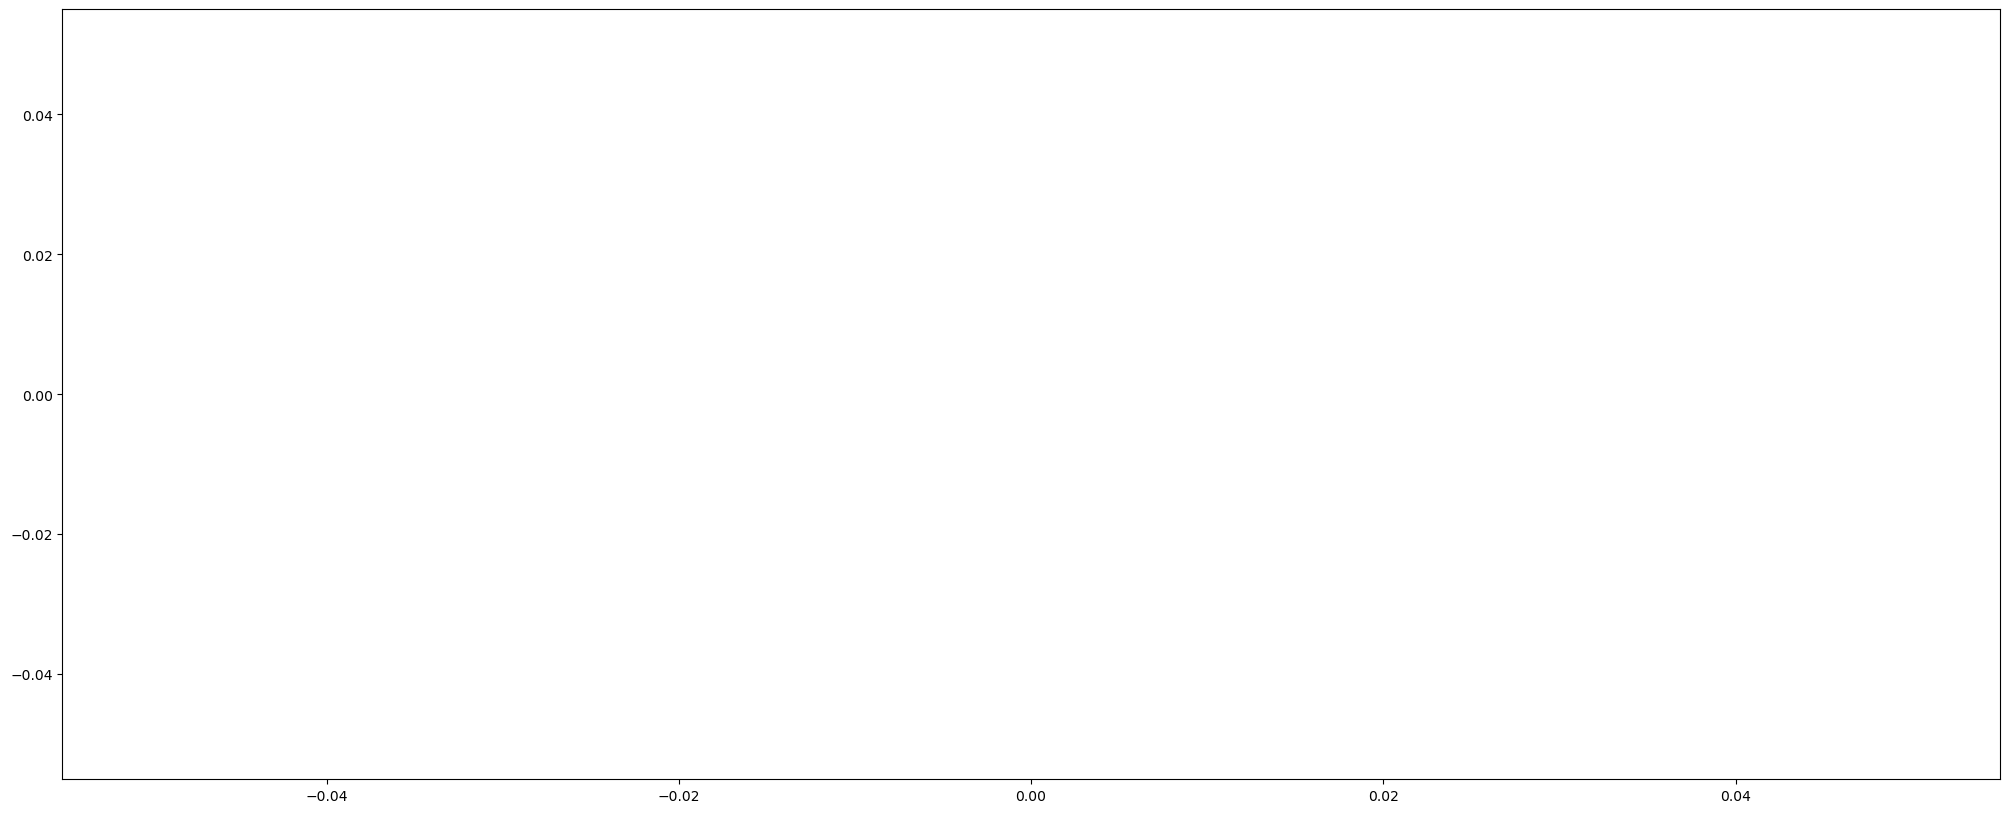

In [180]:
draw(trades.loc[trades['Date'] == '12-2022'])


In [181]:
sum(trades.loc[trades['Date'] == '12-2022'].profit.tolist())

0

In [182]:
set_1.append(sum(trades.loc[trades['Date'] == '12-2022'].profit.tolist()))

# 01-2023

In [111]:
trades.loc[trades['Date'] == '01-2023']

,Символ,Дата входа,% изменения,WL,profit,Date


In [112]:
sum(trades.loc[trades['Date'] == '01-2023'].profit.tolist())

0

In [113]:
set_1.append(sum(trades.loc[trades['Date'] == '01-2023'].profit.tolist()))

# 02-2023

In [114]:
trades.loc[trades['Date'] == '02-2023']

,Символ,Дата входа,% изменения,WL,profit,Date


In [115]:
sum(trades.loc[trades['Date'] == '02-2023'].profit.tolist())

0

In [116]:
set_1.append(sum(trades.loc[trades['Date'] == '02-2023'].profit.tolist()))

# 03-2023

In [117]:
trades.loc[trades['Date'] == '03-2023']

,Символ,Дата входа,% изменения,WL,profit,Date
0,AMBBUSD,01.03.2023,-0.46,-1,-2.30,03-2023
1,RENUSDT,01.03.2023,7.00,1,25.00,03-2023
2,FXSUSDT,01.03.2023,-2.37,-1,-11.85,03-2023
3,STXUSDT,01.03.2023,4.60,1,23.00,03-2023
4,AGIXUSDT,01.03.2023,3.29,1,16.45,03-2023
5,AGIXBUSD,01.03.2023,3.36,1,16.80,03-2023
6,SSVUSDT,01.03.2023,3.14,1,15.70,03-2023
7,MKRUSDT,01.03.2023,2.34,1,11.70,03-2023
8,STGUSDT,01.03.2023,7.00,1,25.00,03-2023
9,CFXUSDT,01.03.2023,7.01,1,25.00,03-2023


In [118]:
sum(trades.loc[trades['Date'] == '03-2023'].profit.tolist())

3731.9500000000057

In [119]:
set_1.append(sum(trades.loc[trades['Date'] == '03-2023'].profit.tolist()))

In [323]:
data_list = [str(i) + '-2020' for i in range(1, 13)] + [str(i) + '-2021' for i in range(1, 13)] + [str(i) + '-2022' for i in range(1, 13)]+[str(i) + '-2023' for i in range(1, 13)]

In [324]:
set_1 = []
for i in range(4):
    for j in range(1,13):
        if j < 10:
#             print(f'0{j}-202{i}')
            set_1.append(sum(trades.loc[trades['Date'] == f'0{j}-202{i}'].profit.tolist()))
        if j >= 10:
#             print(f'{j}-202{i}')
            set_1.append(sum(trades.loc[trades['Date'] == f'{j}-202{i}'].profit.tolist()))

# set_1.append(sum(trades.loc[trades['Date'] == '01-2020'].profit.tolist()))

In [327]:
data_list

['1-2020',
 '2-2020',
 '3-2020',
 '4-2020',
 '5-2020',
 '6-2020',
 '7-2020',
 '8-2020',
 '9-2020',
 '10-2020',
 '11-2020',
 '12-2020',
 '1-2021',
 '2-2021',
 '3-2021',
 '4-2021',
 '5-2021',
 '6-2021',
 '7-2021',
 '8-2021',
 '9-2021',
 '10-2021',
 '11-2021',
 '12-2021',
 '1-2022',
 '2-2022',
 '3-2022',
 '4-2022',
 '5-2022',
 '6-2022',
 '7-2022',
 '8-2022',
 '9-2022',
 '10-2022',
 '11-2022',
 '12-2022',
 '1-2023',
 '2-2023',
 '3-2023',
 '4-2023',
 '5-2023',
 '6-2023',
 '7-2023',
 '8-2023',
 '9-2023',
 '10-2023',
 '11-2023',
 '12-2023']

In [328]:
set_1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

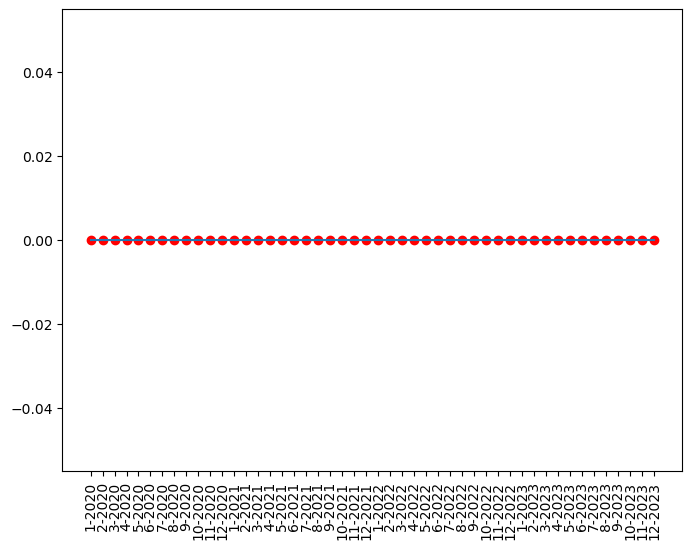

In [329]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data_list, set_1)
ax.scatter(data_list, set_1, color='red')

ax.tick_params(axis='x', rotation=90)
plt.show()



In [125]:
set_1_pos = [set_1[i]>0 for i in range(len(set_1))]

In [126]:
# df_seasons

In [127]:
set_1_pos = []
set_1_neg = []

for i in set_1:
    if i>0:
        set_1_pos.append(i)
    elif i<=0:
        set_1_neg.append(i)

In [128]:
#прибыль в сезоны - только прибыльные дни
df_seasons['profit'].sum()

8863.9

In [129]:
#убыток в несезоны - только неприбыльные дни
df_noseasons['profit'].sum()

-5131.95

In [130]:
#прибыль в сезоны - только прибыльные месяцы
sum(set_1_pos)

3731.9500000000057

In [131]:
#убыток в несезоны - только убыточные месяцы
sum(set_1_neg)

0

In [330]:
import pandas as pd
import yfinance as yf
import statsmodels.tsa.stattools as smt
import datetime

start = datetime.datetime(2023, 3, 1) # YYYY-MM-DD
end = datetime.datetime(2023, 3, 22)

# Get the data for Bitcoin and Ethereum
btc = yf.Ticker("BTC-USD").history(start=start, end=end, interval='1h')


#FLOW, THETA

In [332]:
btc.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-03-01 00:00:00+00:00,23150.929688,23218.613281,23088.855469,23089.736328,0,0.0,0.0
2023-03-01 01:00:00+00:00,23095.041016,23276.646484,23095.041016,23270.861328,351197184,0.0,0.0
2023-03-01 02:00:00+00:00,23266.486328,23324.884766,23263.093750,23324.884766,148758528,0.0,0.0
2023-03-01 03:00:00+00:00,23328.148438,23483.935547,23328.148438,23447.714844,678737920,0.0,0.0
2023-03-01 04:00:00+00:00,23448.917969,23778.972656,23446.882812,23778.972656,659912704,0.0,0.0


In [246]:
# btc

In [334]:
filtr_1 = [df_seasons.Date.tolist()[i].strftime('%Y-%m-%d %H:%M:%S%z') for i in range(len(df_seasons))]
filtr_2 = [df_noseasons.Date.tolist()[i].strftime('%Y-%m-%d %H:%M:%S%z') for i in range(len(df_noseasons))]

AttributeError: 'int' object has no attribute 'strftime'

In [335]:
btc.index.name = 'ind'
btc = btc[['Close']]
btc['Date']  = btc.index.strftime('%Y-%m-%d')

C:\Users\ahrus\AppData\Local\Temp\ipykernel_14948\532022212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['Date']  = btc.index.strftime('%Y-%m-%d')


In [336]:
# btc

In [337]:
btc_temp = btc

In [338]:
btc_temp = btc[btc['Date'].isin(filtr_1)]

In [339]:
btc_temp_2 = btc[btc['Date'].isin(filtr_2)]

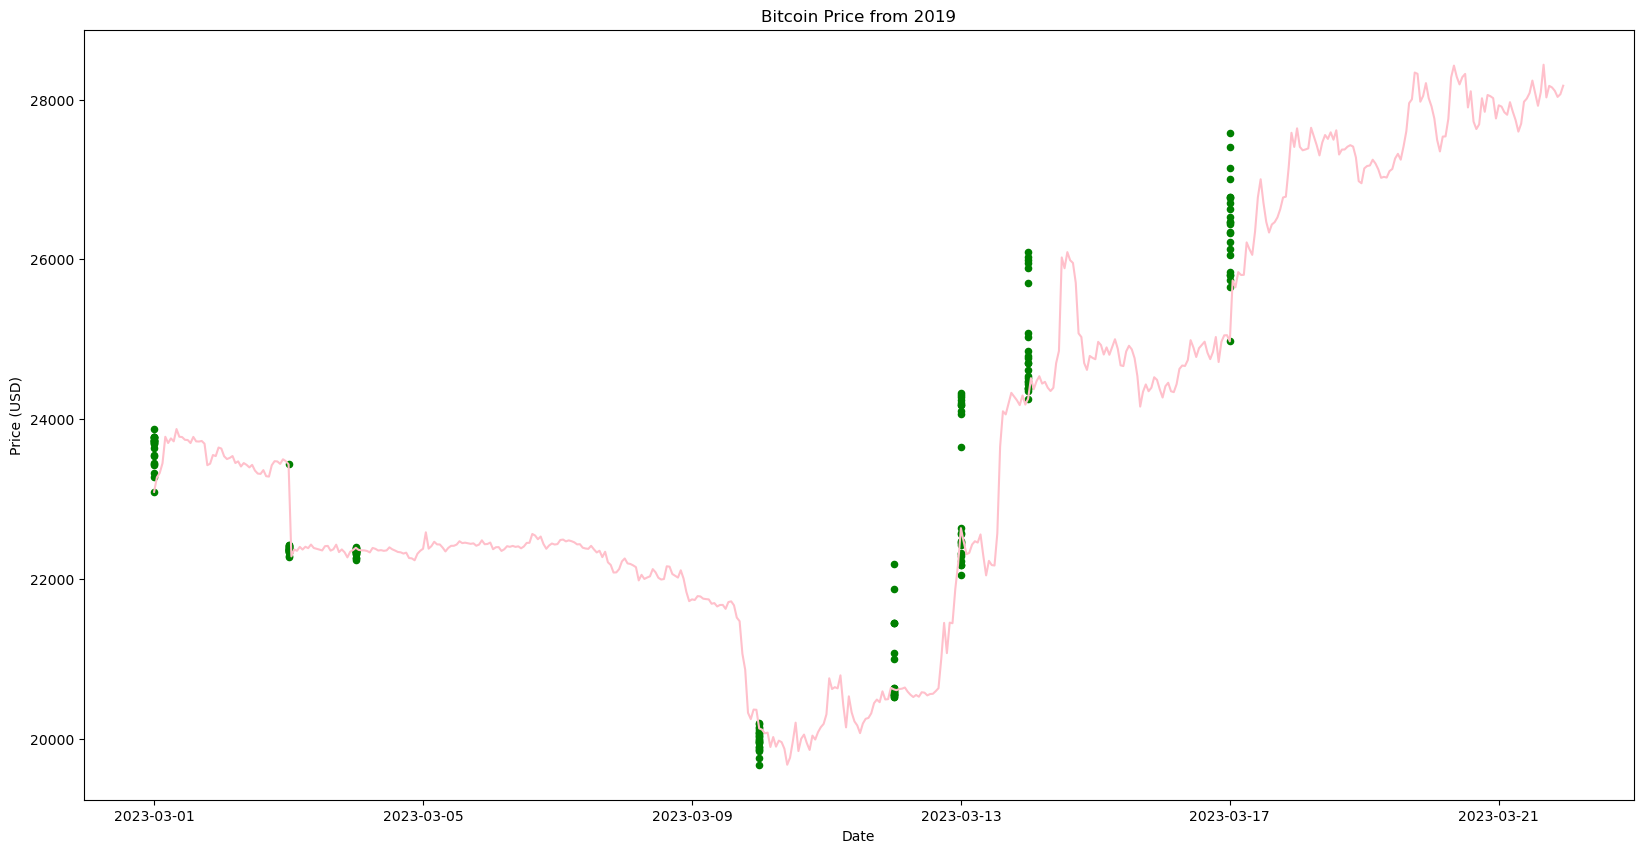

In [340]:
plt.figure(figsize=(20, 10))
plt.plot(btc.index, btc.Close, color='pink')
# Add the data points to the plot
plt.scatter(btc_temp.Date, btc_temp.Close, color='green', s=20)
# plt.scatter(btc_temp_2.Date, btc_temp_2.Close, color='red', s=20)


plt.title('Bitcoin Price from 2019')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

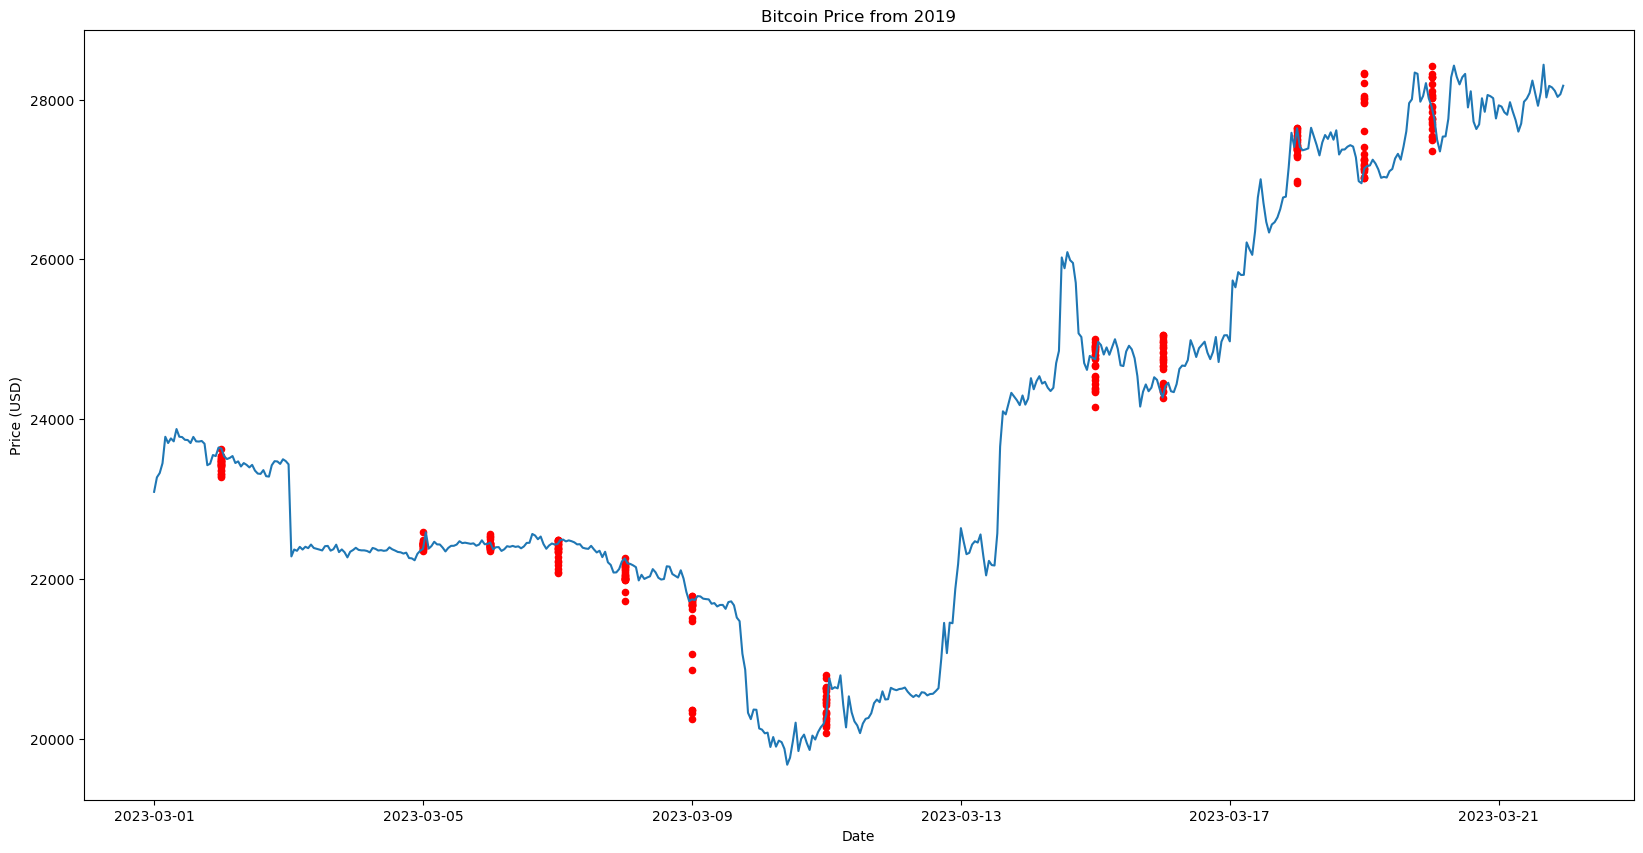

In [208]:
plt.figure(figsize=(20, 10))
plt.plot(btc.index, btc.Close)
# Add the data points to the plot
# plt.scatter(btc_temp.Date, btc_temp.Close, color='orange', s=20)
plt.scatter(btc_temp_2.Date, btc_temp_2.Close, color='red', s=20)


plt.title('Bitcoin Price from 2019')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [158]:
btc_temp

,Close,Date
ind,,
2023-03-01 00:00:00+00:00,23646.550781,2023-03-01
2023-03-03 00:00:00+00:00,22362.679688,2023-03-03
2023-03-04 00:00:00+00:00,22353.349609,2023-03-04
2023-03-10 00:00:00+00:00,20187.244141,2023-03-10
2023-03-12 00:00:00+00:00,22163.949219,2023-03-12
2023-03-13 00:00:00+00:00,24197.533203,2023-03-13
2023-03-14 00:00:00+00:00,24746.074219,2023-03-14
2023-03-17 00:00:00+00:00,27423.929688,2023-03-17


In [159]:
btc_temp['ind'] = btc_temp.index
btc_temp_2['ind'] = btc_temp_2.index

C:\Users\ahrus\AppData\Local\Temp\ipykernel_14948\2348946780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_temp['ind'] = btc_temp.index
C:\Users\ahrus\AppData\Local\Temp\ipykernel_14948\2348946780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_temp_2['ind'] = btc_temp_2.index


In [160]:
btc_temp = btc_temp.reset_index(drop=True)
btc_temp_2 = btc_temp.reset_index(drop=True)

# df_seasons = df_seasons.reset_index(drop=True)
# df_noseasons = df_noseasons.reset_index(drop=True)

In [161]:
btc_temp.head()

,Close,Date,ind
0,23646.550781,2023-03-01,2023-03-01 00:00:00+00:00
1,22362.679688,2023-03-03,2023-03-03 00:00:00+00:00
2,22353.349609,2023-03-04,2023-03-04 00:00:00+00:00
3,20187.244141,2023-03-10,2023-03-10 00:00:00+00:00
4,22163.949219,2023-03-12,2023-03-12 00:00:00+00:00


In [162]:
df_seasons.head()

,Date,profit
0,2023-03-01,213.70
2,2023-03-03,12.75
3,2023-03-04,182.20
9,2023-03-10,281.25
11,2023-03-12,3139.70


In [163]:
df_noseasons.head()

,Date,profit
1,2023-03-02,-246.1
4,2023-03-05,-42.8
5,2023-03-06,-7.4
6,2023-03-07,-164.4
7,2023-03-08,-329.5


In [164]:
# btc_temp = pd.concat(btc_temp, df_seasons)

In [165]:
btc_temp['profit'] = df_seasons.profit

In [166]:
btc_temp_2['profit'] = df_noseasons.profit

In [167]:
btc_temp.head()

,Close,Date,ind,profit
0,23646.550781,2023-03-01,2023-03-01 00:00:00+00:00,213.70
1,22362.679688,2023-03-03,2023-03-03 00:00:00+00:00,NaN
2,22353.349609,2023-03-04,2023-03-04 00:00:00+00:00,12.75
3,20187.244141,2023-03-10,2023-03-10 00:00:00+00:00,182.20
4,22163.949219,2023-03-12,2023-03-12 00:00:00+00:00,NaN


In [168]:
btc_temp_2.head()

,Close,Date,ind,profit
0,23646.550781,2023-03-01,2023-03-01 00:00:00+00:00,NaN
1,22362.679688,2023-03-03,2023-03-03 00:00:00+00:00,-246.1
2,22353.349609,2023-03-04,2023-03-04 00:00:00+00:00,NaN
3,20187.244141,2023-03-10,2023-03-10 00:00:00+00:00,NaN
4,22163.949219,2023-03-12,2023-03-12 00:00:00+00:00,-42.8


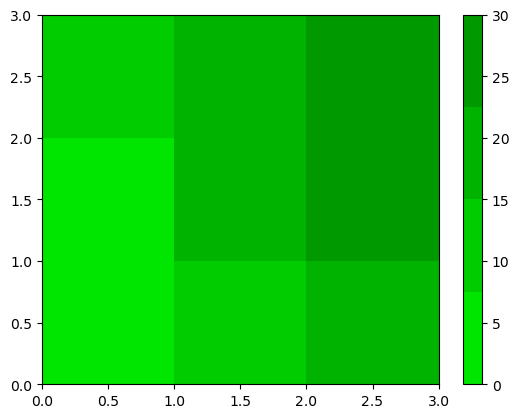

In [169]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Создаем свою цветовую карту
cmap = ListedColormap([(0, 0.9, 0), (0, 0.8, 0), (0, 0.7, 0),(0, 0.6, 0)])

# Создаем простой график, чтобы продемонстрировать, как работает цветовая карта
plt.pcolormesh([[0, 10, 20], [5, 15, 25], [10, 20, 30]], cmap=cmap)

# plt.plot(btc.index[btc.index > '2023-01-01'], btc['Close'][btc.index > '2023-01-01'])
# plt.scatter(btc_temp.Date[btc_temp.Date > '2023-01-01'], btc_temp.Close[btc_temp.Date > '2023-01-01'], c=btc_temp.profit[btc_temp.Date > '2023-01-01'], cmap=cmap)
          
# Отображаем график
plt.plot()
plt.colorbar()  # добавление шкалы цветов

plt.show()






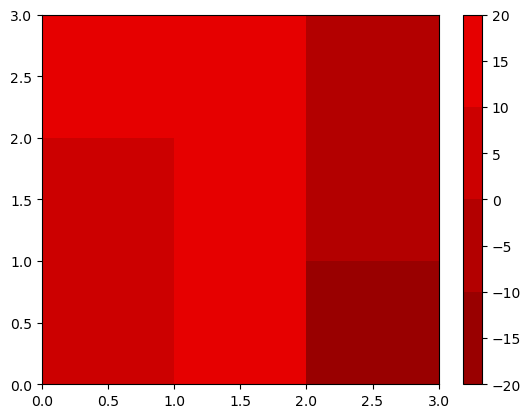

In [170]:
# Создаем свою цветовую карту
cmap1 = ListedColormap([(0.6, 0, 0), (0.7, 0, 0), (0.8, 0, 0),(0.9, 0, 0)])

# Создаем простой график, чтобы продемонстрировать, как работает цветовая карта
plt.pcolormesh([[0, 10, -20], [5, 15, -5], [10, 20, -1]], cmap=cmap1)

# plt.plot(btc.index[btc.index > '2023-01-01'], btc['Close'][btc.index > '2023-01-01'])
# plt.scatter(btc_temp.Date[btc_temp.Date > '2023-01-01'], btc_temp.Close[btc_temp.Date > '2023-01-01'], c=btc_temp.profit[btc_temp.Date > '2023-01-01'], cmap=cmap)
          
# Отображаем график
plt.plot()
plt.colorbar()  # добавление шкалы цветов

plt.show()

# 2023

In [171]:
# btc_temp.profit.tolist()

In [172]:
cmap = ListedColormap([(0, 0.8, 0), (0, 0.7, 0), (0, 0.6, 0), (0, 0.5, 0), (0, 0.4, 0), (0, 0.3, 0)])
cmap1 = ListedColormap([(0.5, 0, 0),(0.6, 0, 0), (0.7, 0, 0), (0.8, 0, 0),(0.9, 0, 0)])

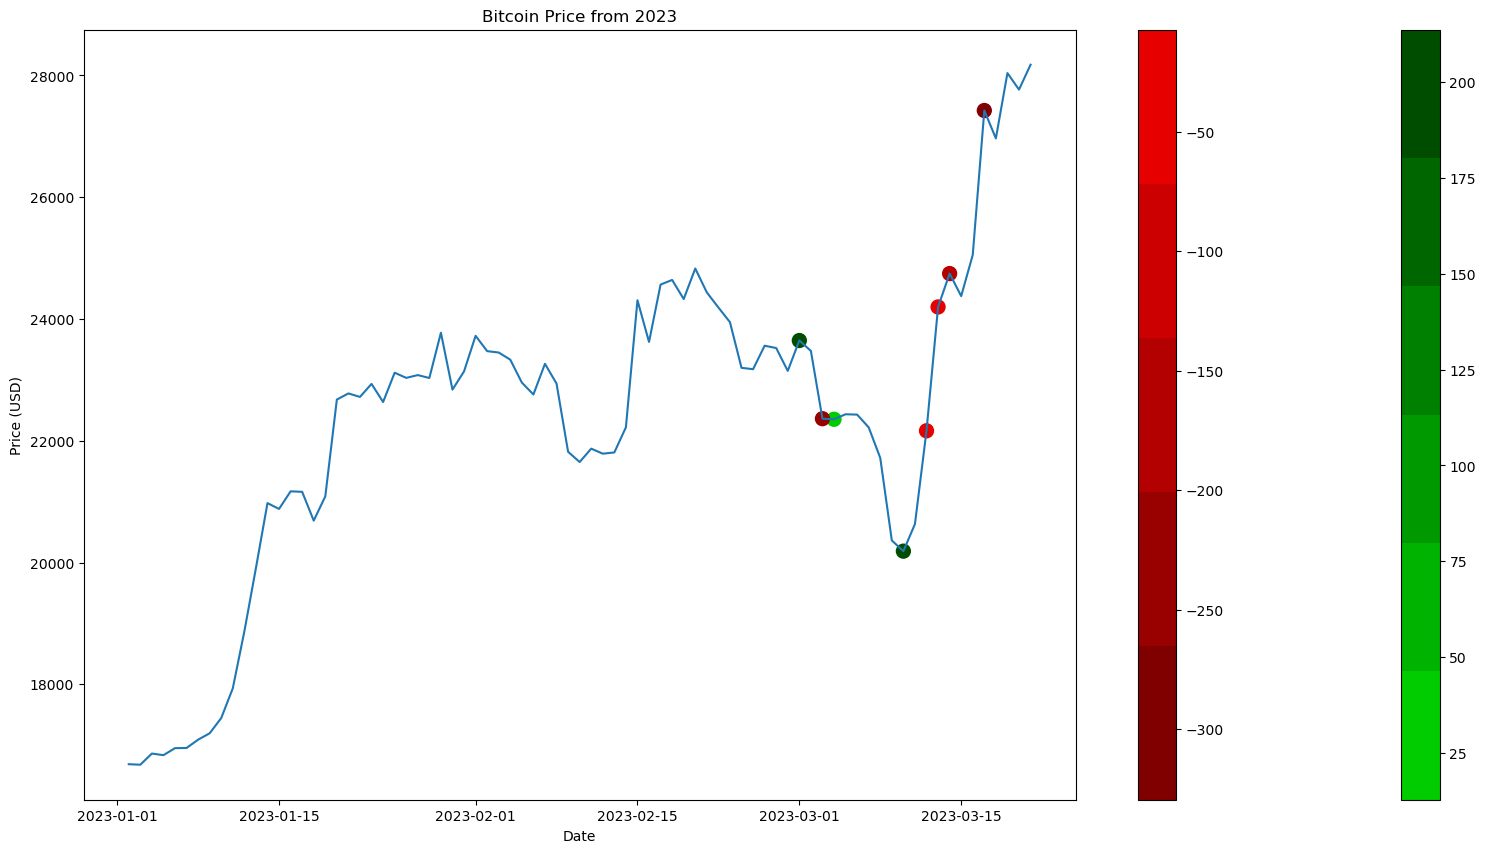

In [173]:
#2023
# fig, ax = plt.subplots()

plt.figure(figsize=(20, 10))
plt.plot(btc.index[btc.index > '2023-01-01'], btc['Close'][btc.index > '2023-01-01'])
# Add the data points to the plot
plt.scatter(btc_temp.Date[btc_temp.Date > '2023-01-01'], btc_temp.Close[btc_temp.Date > '2023-01-01'],c=btc_temp.profit[btc_temp.Date > '2023-01-01'], cmap=cmap, s=100)
plt.colorbar()  # добавление шкалы цветов

plt.scatter(btc_temp_2.Date[btc_temp_2.Date > '2023-01-01'], btc_temp_2.Close[btc_temp_2.Date > '2023-01-01'], c=btc_temp_2.profit[btc_temp_2.Date > '2023-01-01'], cmap=cmap1, s=100)
plt.colorbar()  # добавление шкалы цветов


plt.title('Bitcoin Price from 2023')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.plot()
plt.show()

In [183]:
len(new_trades[(new_trades['Date']> '2023-01-22') & (new_trades['Date'] < '2023-02-01') & (new_trades.profit < 0)])

0

In [184]:
len(new_trades[(new_trades['Date']> '2023-01-22') & (new_trades['Date'] < '2023-02-01') & (new_trades.profit > 0)])

0

In [185]:
btc_temp.profit[btc_temp.Date > '2023-01-01'].sum()

408.65

In [186]:
btc_temp_2.profit[btc_temp.Date > '2023-01-01'].sum()

-790.2

# from 06-2022 to 01-2023

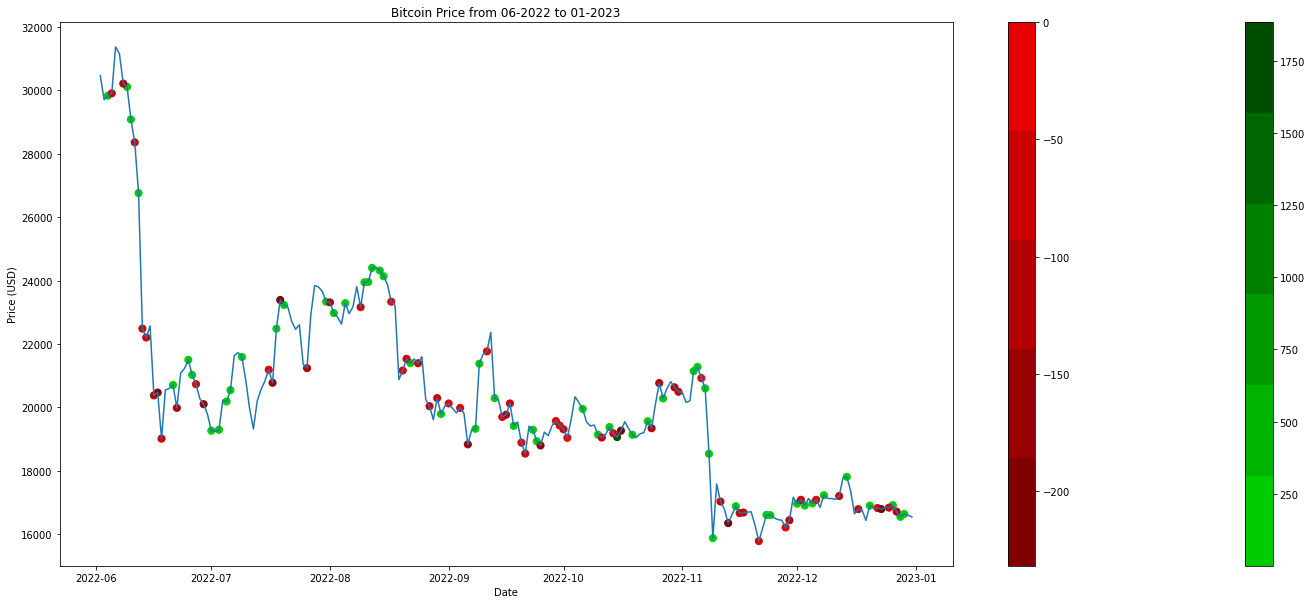

In [247]:
plt.figure(figsize=(25, 10))
plt.plot(btc.index[(btc.index > '2022-06-01') & (btc.index < '2023-01-01')], btc['Close'][(btc.index > '2022-06-01') & (btc.index < '2023-01-01')])
# Add the data points to the plot
plt.scatter(btc_temp.Date[(btc_temp.Date > '2022-06-01') & (btc_temp.Date < '2023-01-01')], btc_temp.Close[(btc_temp.Date > '2022-06-01') & (btc_temp.Date < '2023-01-01')], c=btc_temp.profit[(btc_temp.Date > '2022-06-01') & (btc_temp.Date < '2023-01-01')], cmap=cmap, s=50)
plt.colorbar()  # добавление шкалы цветов
plt.scatter(btc_temp_2.Date[(btc_temp_2.Date > '2022-06-01') & (btc_temp_2.Date < '2023-01-01')], btc_temp_2.Close[(btc_temp_2.Date > '2022-06-01') & (btc_temp_2.Date < '2023-01-01')], c=btc_temp_2.profit[(btc_temp_2.Date > '2022-06-01') & (btc_temp_2.Date < '2023-01-01')], cmap=cmap1, s=50)
plt.colorbar()  # добавление шкалы цветов


plt.title('Bitcoin Price from 06-2022 to 01-2023')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [310]:
len(new_trades[(new_trades['Date']> '2022-06-25') & (new_trades['Date'] < '2022-08-25') & (new_trades.profit < 0)])

236

In [311]:
len(new_trades[(new_trades['Date']> '2022-06-25') & (new_trades['Date'] < '2022-08-25') & (new_trades.profit > 0)])

248

# from 01-2022 to 06-2022

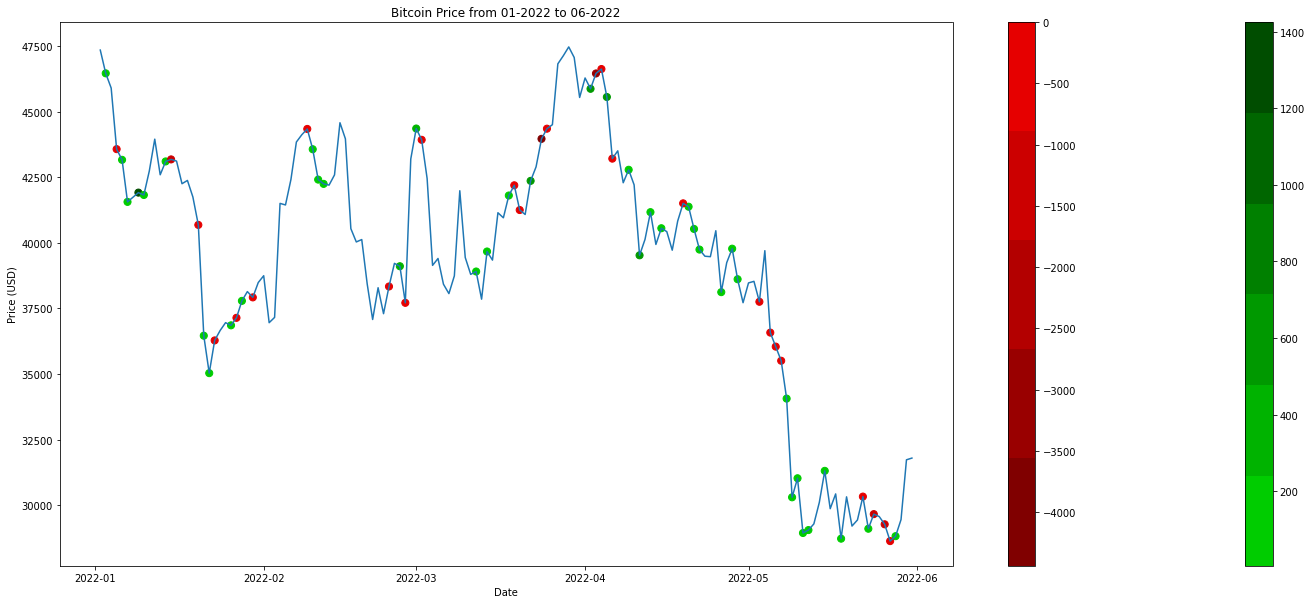

In [248]:
plt.figure(figsize=(25, 10))
plt.plot(btc.index[(btc.index > '2022-01-01') & (btc.index < '2022-06-01')], btc['Close'][(btc.index > '2022-01-01') & (btc.index < '2022-06-01')])
# Add the data points to the plot

plt.scatter(btc_temp.Date[(btc_temp.Date > '2022-01-01') & (btc_temp.Date < '2022-06-01')], btc_temp.Close[(btc_temp.Date > '2022-01-01') & (btc_temp.Date < '2022-06-01')], c=btc_temp.profit[(btc_temp.Date > '2022-01-01') & (btc_temp.Date < '2022-06-01')], cmap=cmap, s=50)
plt.colorbar()  # добавление шкалы цветов

plt.scatter(btc_temp_2.Date[(btc_temp_2.Date > '2022-01-01') & (btc_temp_2.Date < '2022-06-01')], btc_temp_2.Close[(btc_temp_2.Date > '2022-01-01') & (btc_temp_2.Date < '2022-06-01')], c=btc_temp_2.profit[(btc_temp_2.Date > '2022-01-01') & (btc_temp_2.Date < '2022-06-01')], cmap=cmap1, s=50)
plt.colorbar()  # добавление шкалы цветов


plt.title('Bitcoin Price from 01-2022 to 06-2022')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [308]:
len(new_trades[(new_trades['Date']> '2022-04-10') & (new_trades['Date'] < '2022-05-18') & (new_trades.profit < 0)])

864

In [309]:
len(new_trades[(new_trades['Date']> '2022-04-10') & (new_trades['Date'] < '2022-05-18') & (new_trades.profit > 0)])

947

# from 06-2021 to 01-2022

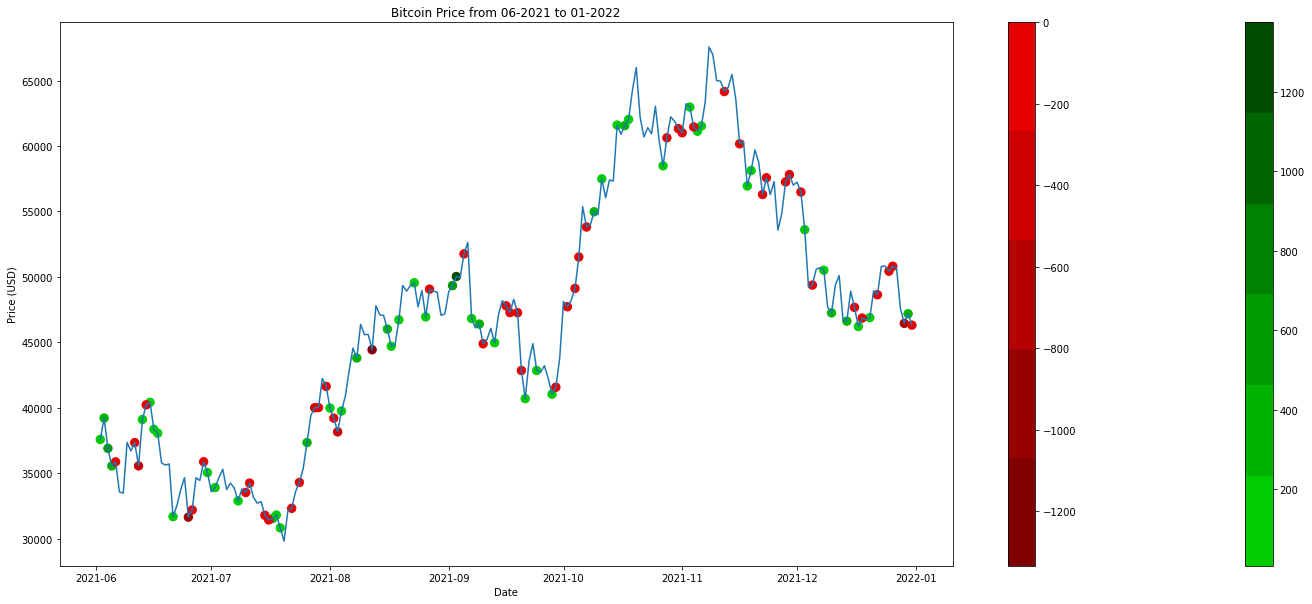

In [249]:
plt.figure(figsize=(25, 10))
plt.plot(btc.index[(btc.index > '2021-06-01') & (btc.index < '2022-01-01')], btc['Close'][(btc.index > '2021-06-01') & (btc.index < '2022-01-01')])
# Add the data points to the plot

plt.scatter(btc_temp.Date[(btc_temp.Date > '2021-06-01') & (btc_temp.Date < '2022-01-01')], btc_temp.Close[(btc_temp.Date > '2021-06-01') & (btc_temp.Date < '2022-01-01')], c=btc_temp.profit[(btc_temp.Date > '2021-06-01') & (btc_temp.Date < '2022-01-01')], cmap=cmap, s=70)
plt.colorbar()  # добавление шкалы цветов

plt.scatter(btc_temp_2.Date[(btc_temp_2.Date > '2021-06-01') & (btc_temp_2.Date < '2022-01-01')], btc_temp_2.Close[(btc_temp_2.Date > '2021-06-01') & (btc_temp_2.Date < '2022-01-01')], c=btc_temp_2.profit[(btc_temp_2.Date > '2021-06-01') & (btc_temp_2.Date < '2022-01-01')], cmap=cmap1, s=70)
plt.colorbar()  # добавление шкалы цветов

plt.title('Bitcoin Price from 06-2021 to 01-2022')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [306]:
len(new_trades[(new_trades['Date']> '2021-10-17') & (new_trades['Date'] < '2021-11-01') & (new_trades.profit < 0)])

199

In [307]:
len(new_trades[(new_trades['Date']> '2021-10-17') & (new_trades['Date'] < '2021-11-01') & (new_trades.profit > 0)])

169

# 01-2021 to 06-2021

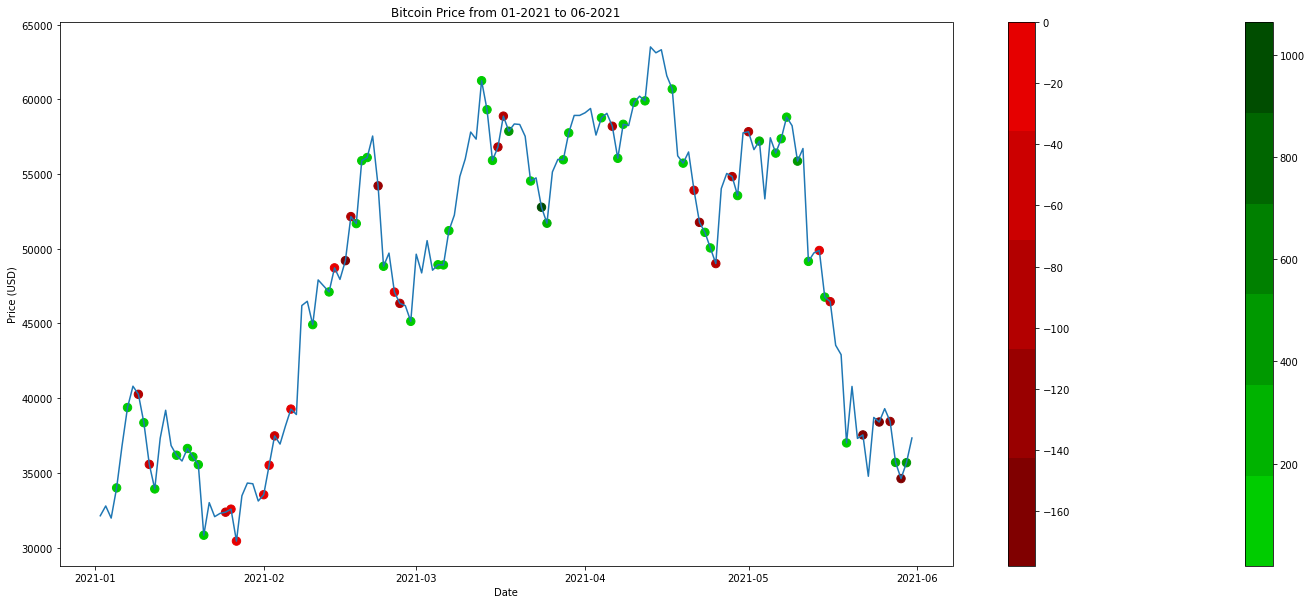

In [250]:
plt.figure(figsize=(25, 10))
plt.plot(btc.index[(btc.index > '2021-01-01') & (btc.index < '2021-06-01')], btc['Close'][(btc.index > '2021-01-01') & (btc.index < '2021-06-01')])
# Add the data points to the plot

plt.scatter(btc_temp.Date[(btc_temp.Date > '2021-01-01') & (btc_temp.Date < '2021-06-01')], btc_temp.Close[(btc_temp.Date > '2021-01-01') & (btc_temp.Date < '2021-06-01')], c=btc_temp.profit[(btc_temp.Date > '2021-01-01') & (btc_temp.Date < '2021-06-01')], cmap=cmap, s=70)
plt.colorbar()  # добавление шкалы цветов

plt.scatter(btc_temp_2.Date[(btc_temp_2.Date > '2021-01-01') & (btc_temp_2.Date < '2021-06-01')], btc_temp_2.Close[(btc_temp_2.Date > '2021-01-01') & (btc_temp_2.Date < '2021-06-01')], c=btc_temp_2.profit[(btc_temp_2.Date > '2021-01-01') & (btc_temp_2.Date < '2021-06-01')], cmap=cmap1, s=70)
plt.colorbar()  # добавление шкалы цветов


plt.title('Bitcoin Price from 01-2021 to 06-2021')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [293]:
len(new_trades[(new_trades['Date']> '2021-03-01') & (new_trades['Date'] < '2021-04-15') & (new_trades.profit < 0)])

603

In [294]:
len(new_trades[(new_trades['Date']> '2021-03-01') & (new_trades['Date'] < '2021-04-15') & (new_trades.profit > 0)])

629

# from 06-2020 to 01-2021

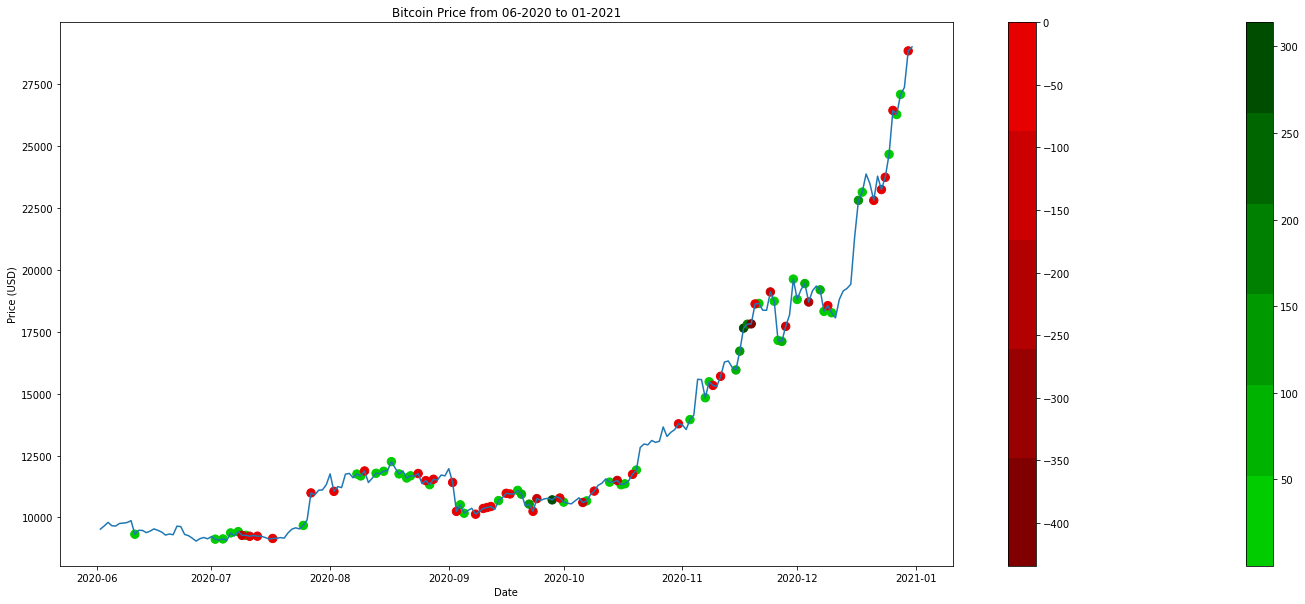

In [251]:
plt.figure(figsize=(25, 10))
plt.plot(btc.index[(btc.index > '2020-06-01') & (btc.index < '2021-01-01')], btc['Close'][(btc.index > '2020-06-01') & (btc.index < '2021-01-01')])
# Add the data points to the plot

plt.scatter(btc_temp.Date[(btc_temp.Date > '2020-06-01') & (btc_temp.Date < '2021-01-01')], btc_temp.Close[(btc_temp.Date > '2020-06-01') & (btc_temp.Date < '2021-01-01')], c=btc_temp.profit[(btc_temp.Date > '2020-06-01') & (btc_temp.Date < '2021-01-01')], cmap=cmap, s=70)
plt.colorbar()  # добавление шкалы цветов

plt.scatter(btc_temp_2.Date[(btc_temp_2.Date > '2020-06-01') & (btc_temp_2.Date < '2021-01-01')], btc_temp_2.Close[(btc_temp_2.Date > '2020-06-01') & (btc_temp_2.Date < '2021-01-01')], c=btc_temp_2.profit[(btc_temp_2.Date > '2020-06-01') & (btc_temp_2.Date < '2021-01-01')], cmap=cmap1, s=70)
plt.colorbar()  # добавление шкалы цветов

plt.title('Bitcoin Price from 06-2020 to 01-2021')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [284]:
len(new_trades[(new_trades['Date']> '2020-08-01') & (new_trades['Date'] < '2020-09-01') & (new_trades.profit < 0)])

128

In [285]:
len(new_trades[(new_trades['Date']> '2020-08-01') & (new_trades['Date'] < '2020-09-01') & (new_trades.profit > 0)])

138

In [286]:
len(new_trades[(new_trades['Date']> '2020-11-01') & (new_trades['Date'] < '2021-01-01') & (new_trades.profit < 0)])

294

In [287]:
len(new_trades[(new_trades['Date']> '2020-11-01') & (new_trades['Date'] < '2021-01-01') & (new_trades.profit > 0)])

412

# from 01-2020 to 06-2020

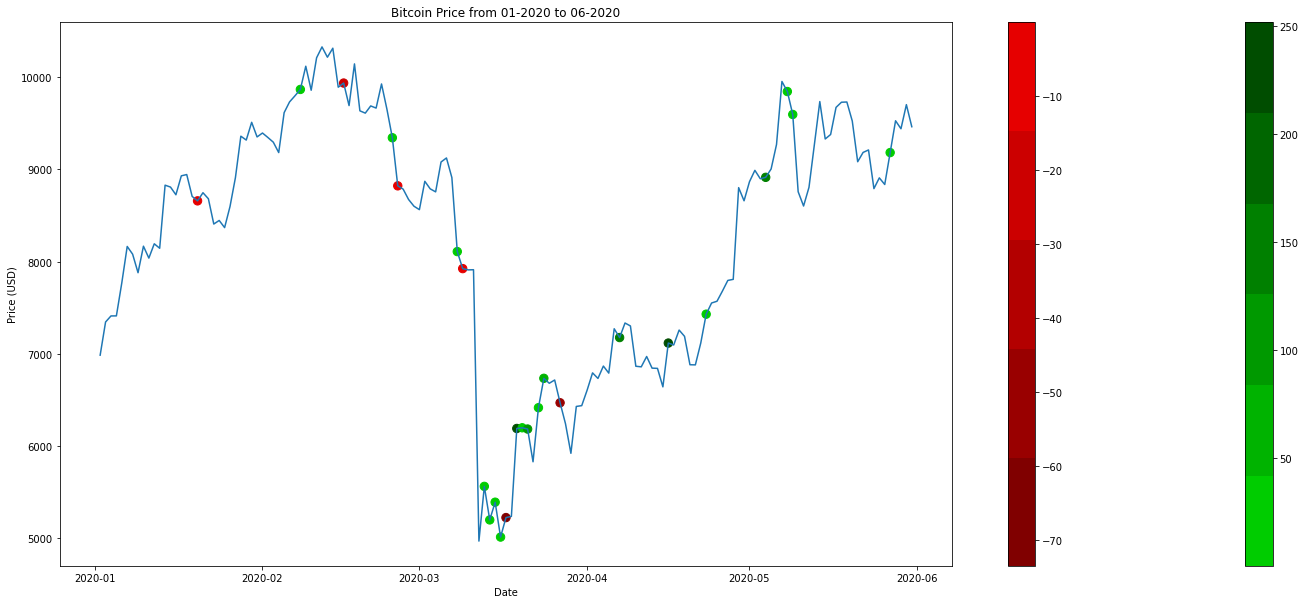

In [252]:
plt.figure(figsize=(25, 10))
plt.plot(btc.index[(btc.index > '2020-01-01') & (btc.index < '2020-06-01')], btc['Close'][(btc.index > '2020-01-01') & (btc.index < '2020-06-01')])
# Add the data points to the plot

plt.scatter(btc_temp.Date[(btc_temp.Date > '2020-01-01') & (btc_temp.Date < '2020-06-01')], btc_temp.Close[(btc_temp.Date > '2020-01-01') & (btc_temp.Date < '2020-06-01')], c=btc_temp.profit[(btc_temp.Date > '2020-01-01') & (btc_temp.Date < '2020-06-01')], cmap=cmap, s=70)
plt.colorbar()  # добавление шкалы цветов

plt.scatter(btc_temp_2.Date[(btc_temp_2.Date > '2020-01-01') & (btc_temp_2.Date < '2020-06-01')], btc_temp_2.Close[(btc_temp_2.Date > '2020-01-01') & (btc_temp_2.Date < '2020-06-01')], c=btc_temp_2.profit[(btc_temp_2.Date > '2020-01-01') & (btc_temp_2.Date < '2020-06-01')], cmap=cmap1, s=70)
plt.colorbar()  # добавление шкалы цветов


plt.title('Bitcoin Price from 01-2020 to 06-2020')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [261]:
len(btc_temp.Date[(btc_temp.Date > '2020-03-01') & (btc_temp.Date < '2020-06-01')])

20

In [262]:
len(btc_temp_2.Date[(btc_temp_2.Date > '2020-03-01') & (btc_temp_2.Date < '2020-06-01')])

20

In [282]:
# new_trades

In [280]:
len(new_trades[(new_trades['Date']> '2020-03-01') & (new_trades['Date'] < '2020-06-01') & (new_trades['profit'] < 0)])

169

In [281]:
len(new_trades[(new_trades['Date']> '2020-03-01') & (new_trades['Date'] < '2020-06-01') & (new_trades.profit > 0)])

206

In [283]:
# new_trades['profit']

In [177]:
new_trades = trades[['Дата входа', 'profit']]

In [178]:
# new_trades['date'] = pd.to_datetime(new_trades['date'], format='%d-%m-%Y').dt.date

In [179]:
new_trades['Date'] = pd.to_datetime(new_trades['Дата входа'], format='%d.%m.%Y')

C:\Users\ahrus\AppData\Local\Temp\ipykernel_14948\2939748058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_trades['Date'] = pd.to_datetime(new_trades['Дата входа'], format='%d.%m.%Y')


In [180]:
new_trades

,Дата входа,profit,Date
0,01.03.2023,-2.30,2023-03-01
1,01.03.2023,25.00,2023-03-01
2,01.03.2023,-11.85,2023-03-01
3,01.03.2023,23.00,2023-03-01
4,01.03.2023,16.45,2023-03-01
5,01.03.2023,16.80,2023-03-01
6,01.03.2023,15.70,2023-03-01
7,01.03.2023,11.70,2023-03-01
8,01.03.2023,25.00,2023-03-01
9,01.03.2023,25.00,2023-03-01


In [181]:
(76-72)/0.3

13.333333333333334

In [182]:
(12.3+10+59+17+69+35+55+6+13)/9

30.700000000000003